In [1]:
#!/usr/bin/env python
#-- coding: utf-8 --
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt 
import matplotlib.dates as mdates
import datetime
import pandas as pd
import numpy as np
import messages
from importlib import reload
import pandas as pd
import glob as gb
import numpy as np
import calendar
from dateutil.relativedelta import relativedelta
from datetime import *
import os


In [2]:
class Air:

    def __init__(self,Variable=None,Estaciones=None,Fechai=None, Fechaf=None,Freq=5):

        self.Fechai      = (datetime.datetime.now()-relativedelta(months=1)).strftime('%Y-%m-')+'01 01:00' if (Fechaf == None) else Fechai
        self.Fechaf      = (pd.to_datetime(self.Fechai)+ relativedelta(months=1)-datetime.timedelta(hours=1)).strftime('%Y-%m-%d %H:%M') if (Fechaf == None) else Fechaf
        ##### Modificarlo si se cambia de pc  #####################################
        self.Est         = pd.read_csv('Estaciones.txt',index_col=0).sort_values(by='Latitud',ascending=False)
        self.Dropbox_path='/Users/siata/SIATA Dropbox/SGC_Siata_ Aire/01_Gestion_Operativa/03_Registros/HojasVida_FichasTecnicas/ESTACIONES DE AIRE/'
        ###########################################################################

        self.folder={'BAR':'01_BARBOSA/','BEL':'02_BELLO/','CAL':'03_CALDAS/','COP':'04_COPACABANA/','GIR':'05_GIRARDOTA/','ITA':'06_ITAGUI/','SUR':'07_LA ESTRELLA/','EST':'07_LA ESTRELLA/','MED':'08_MEDELLIN/','CEN':'08_MEDELLIN/','SAB':'09_SABANETA/','ENV':'10_ENVIGADO/'}
        self.nombre_tipo={'MULTIPUNTO':'MP','CERO_SPAN PREC.':'CS_PR'}
        self.fecha_range =pd.date_range(self.Fechai,self.Fechaf,freq='M')
    def Read_Verification(self,*args,**kwargs):
        self.var		= kwargs.get('var','NOx')
        self.tipo		= kwargs.get('tipo','CS_PR') #CS: ZERO/SPAN, 'PRE'

        self.C={'MP':{},'CS_PR':{}}

        analizador= 'O3(A)' if self.var=='Ozono' else 'NOX(A)' if self.var=='NOx' else 'CO(A)' if self.var=='CO' else 'SO2(A)' if self.var=='SO2' else None
        self.estaciones=self.Est['Nombre'][self.Est[self.var]==1].values

        for est in self.estaciones:
            for date in self.fecha_range:
                #print (date)
                #print (est)
                #print (self.Dropbox_path+self.folder[est[:3]]+est+'/'+analizador+'/VERIFICACIONES/'+date.strftime('%Y/%m')+'*')
                self.foldermes=gb.glob(self.Dropbox_path+self.folder[est[:3]]+est+'/'+analizador+'/VERIFICACIONES/'+date.strftime('%Y/%m')+'*')
                if len(self.foldermes)>0:
                    XLS=gb.glob(self.foldermes[0]+'/F*.xlsx')
                    print (XLS)

                    for name in XLS:
                        print (name)
                        self.xl = pd.ExcelFile(name)
                        self.DF = self.xl.parse(0)
                        print('++++++++++ calcula cada variable por archivo ++++++')
        for tipofile in self.C.keys():
            print(tipofile)
            print ('****************tipofile*******************')

            
            
            

In [13]:
import requests

def send_msg(text):
    token = "5463212271:AAGhrc6Q3Q5m1NRCh9hP68XaNft2-WdQsoI"
    chat_id = "@Notificacionespane"
    url_req = "https://api.telegram.org/bot" + token + "/sendMessage" + "?chat_id=" + chat_id + "&text=" + text 
    results = requests.get(url_req)
    print(results.json())



In [3]:
zero_rango={'Ozono':3.1,'SO2':3.1,'CO':0.41,'NOx':3.1,'NO':3.1,'NO2':3.1}
Referencia={'Ozono':250,'SO2':200,'CO':10,'NOx':500,'NO':500,'NO2':300}
Span={'Ozono':7.1,'SO2':10.1,'CO':10.1,'NOx':10.1,'NO':10.0,'NO2':10.0}
Precision={'Ozono':7.1,'SO2':10.1,'CO':10.1,'NOx':15.1,'NO':15.1,'NO2':15.1}


In [4]:
Fechai = '2022-07-01'
Fechaf='2022-08-01'
self=Air(Fechai=Fechai,Fechaf=Fechaf)
inicio = datetime.strptime(Fechai, "%Y-%m-%d")
fin   = datetime.strptime(Fechaf, "%Y-%m-%d")
lista_fechas = [inicio + timedelta(days=d) for d in range((fin - inicio).days + 1)] 


In [5]:
VAR=(['NOx','CO', 'SO2', 'Ozono'])

self.Read_Verification(var=VAR[0])
print (VAR[0])
analizador= 'O3(A)' if self.var=='Ozono' else 'NOX(A)' if self.var=='NOx' else 'CO(A)' if self.var=='CO' else 'SO2(A)' if self.var=='SO2' else None



['/Users/siata/SIATA Dropbox/SGC_Siata_ Aire/01_Gestion_Operativa/03_Registros/HojasVida_FichasTecnicas/ESTACIONES DE AIRE/05_GIRARDOTA/GIR-EPM/NOX(A)/VERIFICACIONES/2022/07_Julio/F-GAA-RA-21_GIR-EPM_NOx_CSPR_2022-07-21.xlsx', '/Users/siata/SIATA Dropbox/SGC_Siata_ Aire/01_Gestion_Operativa/03_Registros/HojasVida_FichasTecnicas/ESTACIONES DE AIRE/05_GIRARDOTA/GIR-EPM/NOX(A)/VERIFICACIONES/2022/07_Julio/F-GAA-RA-22_GIR-EPM_NOx_MP_2022-07-07.xlsx']
/Users/siata/SIATA Dropbox/SGC_Siata_ Aire/01_Gestion_Operativa/03_Registros/HojasVida_FichasTecnicas/ESTACIONES DE AIRE/05_GIRARDOTA/GIR-EPM/NOX(A)/VERIFICACIONES/2022/07_Julio/F-GAA-RA-21_GIR-EPM_NOx_CSPR_2022-07-21.xlsx


/Users/siata/opt/anaconda3/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)


++++++++++ calcula cada variable por archivo ++++++
/Users/siata/SIATA Dropbox/SGC_Siata_ Aire/01_Gestion_Operativa/03_Registros/HojasVida_FichasTecnicas/ESTACIONES DE AIRE/05_GIRARDOTA/GIR-EPM/NOX(A)/VERIFICACIONES/2022/07_Julio/F-GAA-RA-22_GIR-EPM_NOx_MP_2022-07-07.xlsx
++++++++++ calcula cada variable por archivo ++++++
['/Users/siata/SIATA Dropbox/SGC_Siata_ Aire/01_Gestion_Operativa/03_Registros/HojasVida_FichasTecnicas/ESTACIONES DE AIRE/08_MEDELLIN/MED-ITMR/NOX(A)/VERIFICACIONES/2022/07_JULIO/F-GAA-RA-22_MED-ITMR_NOx_CSPR_2022-07-12.xlsx', '/Users/siata/SIATA Dropbox/SGC_Siata_ Aire/01_Gestion_Operativa/03_Registros/HojasVida_FichasTecnicas/ESTACIONES DE AIRE/08_MEDELLIN/MED-ITMR/NOX(A)/VERIFICACIONES/2022/07_JULIO/F-GAA-RA-22_MED-ITMR_NOx_CSPR_2022-07-26.xlsx']
/Users/siata/SIATA Dropbox/SGC_Siata_ Aire/01_Gestion_Operativa/03_Registros/HojasVida_FichasTecnicas/ESTACIONES DE AIRE/08_MEDELLIN/MED-ITMR/NOX(A)/VERIFICACIONES/2022/07_JULIO/F-GAA-RA-22_MED-ITMR_NOx_CSPR_2022-07-12.x

/Users/siata/opt/anaconda3/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)


++++++++++ calcula cada variable por archivo ++++++
/Users/siata/SIATA Dropbox/SGC_Siata_ Aire/01_Gestion_Operativa/03_Registros/HojasVida_FichasTecnicas/ESTACIONES DE AIRE/08_MEDELLIN/MED-ITMR/NOX(A)/VERIFICACIONES/2022/07_JULIO/F-GAA-RA-22_MED-ITMR_NOx_CSPR_2022-07-26.xlsx
++++++++++ calcula cada variable por archivo ++++++
['/Users/siata/SIATA Dropbox/SGC_Siata_ Aire/01_Gestion_Operativa/03_Registros/HojasVida_FichasTecnicas/ESTACIONES DE AIRE/08_MEDELLIN/MED-FISC/NOX(A)/VERIFICACIONES/2022/07_JULIO/F-GAA-RA-22_MED-FISC_NOx_SPCR_2022-07-25.xlsx', '/Users/siata/SIATA Dropbox/SGC_Siata_ Aire/01_Gestion_Operativa/03_Registros/HojasVida_FichasTecnicas/ESTACIONES DE AIRE/08_MEDELLIN/MED-FISC/NOX(A)/VERIFICACIONES/2022/07_JULIO/F-GAA-RA-22_MED-FISC_NOx_SPCR_2022-07-12.xlsx']
/Users/siata/SIATA Dropbox/SGC_Siata_ Aire/01_Gestion_Operativa/03_Registros/HojasVida_FichasTecnicas/ESTACIONES DE AIRE/08_MEDELLIN/MED-FISC/NOX(A)/VERIFICACIONES/2022/07_JULIO/F-GAA-RA-22_MED-FISC_NOx_SPCR_2022-07-2

/Users/siata/opt/anaconda3/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)


++++++++++ calcula cada variable por archivo ++++++
/Users/siata/SIATA Dropbox/SGC_Siata_ Aire/01_Gestion_Operativa/03_Registros/HojasVida_FichasTecnicas/ESTACIONES DE AIRE/08_MEDELLIN/MED-FISC/NOX(A)/VERIFICACIONES/2022/07_JULIO/F-GAA-RA-22_MED-FISC_NOx_SPCR_2022-07-12.xlsx
++++++++++ calcula cada variable por archivo ++++++
['/Users/siata/SIATA Dropbox/SGC_Siata_ Aire/01_Gestion_Operativa/03_Registros/HojasVida_FichasTecnicas/ESTACIONES DE AIRE/08_MEDELLIN/CEN-TRAF/NOX(A)/VERIFICACIONES/2022/07_Julio/F-GAA-RA-22_TAPI_CEN-TRAF_NOx_CSPR_2022-07-22.xlsx', '/Users/siata/SIATA Dropbox/SGC_Siata_ Aire/01_Gestion_Operativa/03_Registros/HojasVida_FichasTecnicas/ESTACIONES DE AIRE/08_MEDELLIN/CEN-TRAF/NOX(A)/VERIFICACIONES/2022/07_Julio/F-GAA-RA-22_TAPI_CEN-TRAF_NOx_MP_2022-07-05.xlsx']
/Users/siata/SIATA Dropbox/SGC_Siata_ Aire/01_Gestion_Operativa/03_Registros/HojasVida_FichasTecnicas/ESTACIONES DE AIRE/08_MEDELLIN/CEN-TRAF/NOX(A)/VERIFICACIONES/2022/07_Julio/F-GAA-RA-22_TAPI_CEN-TRAF_NOx_C

/Users/siata/opt/anaconda3/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)


++++++++++ calcula cada variable por archivo ++++++
/Users/siata/SIATA Dropbox/SGC_Siata_ Aire/01_Gestion_Operativa/03_Registros/HojasVida_FichasTecnicas/ESTACIONES DE AIRE/08_MEDELLIN/CEN-TRAF/NOX(A)/VERIFICACIONES/2022/07_Julio/F-GAA-RA-22_TAPI_CEN-TRAF_NOx_MP_2022-07-05.xlsx
++++++++++ calcula cada variable por archivo ++++++
['/Users/siata/SIATA Dropbox/SGC_Siata_ Aire/01_Gestion_Operativa/03_Registros/HojasVida_FichasTecnicas/ESTACIONES DE AIRE/08_MEDELLIN/MED-PJIC/NOX(A)/VERIFICACIONES/2022/07_JULIO/F-GAA-RA-22_MED-PJIC_NOx_CSPR_2022-07-28.xlsx', '/Users/siata/SIATA Dropbox/SGC_Siata_ Aire/01_Gestion_Operativa/03_Registros/HojasVida_FichasTecnicas/ESTACIONES DE AIRE/08_MEDELLIN/MED-PJIC/NOX(A)/VERIFICACIONES/2022/07_JULIO/F-GAA-RA-22_MED-PJIC_NOx_CSPR_2022-07-18.xlsx']
/Users/siata/SIATA Dropbox/SGC_Siata_ Aire/01_Gestion_Operativa/03_Registros/HojasVida_FichasTecnicas/ESTACIONES DE AIRE/08_MEDELLIN/MED-PJIC/NOX(A)/VERIFICACIONES/2022/07_JULIO/F-GAA-RA-22_MED-PJIC_NOx_CSPR_2022-0

/Users/siata/opt/anaconda3/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)


++++++++++ calcula cada variable por archivo ++++++
/Users/siata/SIATA Dropbox/SGC_Siata_ Aire/01_Gestion_Operativa/03_Registros/HojasVida_FichasTecnicas/ESTACIONES DE AIRE/08_MEDELLIN/MED-PJIC/NOX(A)/VERIFICACIONES/2022/07_JULIO/F-GAA-RA-22_MED-PJIC_NOx_CSPR_2022-07-18.xlsx
++++++++++ calcula cada variable por archivo ++++++
['/Users/siata/SIATA Dropbox/SGC_Siata_ Aire/01_Gestion_Operativa/03_Registros/HojasVida_FichasTecnicas/ESTACIONES DE AIRE/06_ITAGUI/ITA-CJUS/NOX(A)/VERIFICACIONES/2022/07_Julio/F-GAA-RA-22_ITA-CJUS_NOx_CSPR_2022-07-12.xlsx', '/Users/siata/SIATA Dropbox/SGC_Siata_ Aire/01_Gestion_Operativa/03_Registros/HojasVida_FichasTecnicas/ESTACIONES DE AIRE/06_ITAGUI/ITA-CJUS/NOX(A)/VERIFICACIONES/2022/07_Julio/F-GAA-RA-22_ITA-CJUS_NOx_CSPR_2022-07-26.xlsx']
/Users/siata/SIATA Dropbox/SGC_Siata_ Aire/01_Gestion_Operativa/03_Registros/HojasVida_FichasTecnicas/ESTACIONES DE AIRE/06_ITAGUI/ITA-CJUS/NOX(A)/VERIFICACIONES/2022/07_Julio/F-GAA-RA-22_ITA-CJUS_NOx_CSPR_2022-07-12.xlsx

/Users/siata/opt/anaconda3/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)


++++++++++ calcula cada variable por archivo ++++++
/Users/siata/SIATA Dropbox/SGC_Siata_ Aire/01_Gestion_Operativa/03_Registros/HojasVida_FichasTecnicas/ESTACIONES DE AIRE/06_ITAGUI/ITA-CJUS/NOX(A)/VERIFICACIONES/2022/07_Julio/F-GAA-RA-22_ITA-CJUS_NOx_CSPR_2022-07-26.xlsx
++++++++++ calcula cada variable por archivo ++++++
['/Users/siata/SIATA Dropbox/SGC_Siata_ Aire/01_Gestion_Operativa/03_Registros/HojasVida_FichasTecnicas/ESTACIONES DE AIRE/07_LA ESTRELLA/SUR-TRAF/NOX(A)/VERIFICACIONES/2022/07_Julio/F-GAA-RA-22_SURTRAF_NOx_CSPR_2022-07-21.xlsx', '/Users/siata/SIATA Dropbox/SGC_Siata_ Aire/01_Gestion_Operativa/03_Registros/HojasVida_FichasTecnicas/ESTACIONES DE AIRE/07_LA ESTRELLA/SUR-TRAF/NOX(A)/VERIFICACIONES/2022/07_Julio/F-GAA-RA-22_SURTRAF_NOx_MP_2022-07-07.xlsx']
/Users/siata/SIATA Dropbox/SGC_Siata_ Aire/01_Gestion_Operativa/03_Registros/HojasVida_FichasTecnicas/ESTACIONES DE AIRE/07_LA ESTRELLA/SUR-TRAF/NOX(A)/VERIFICACIONES/2022/07_Julio/F-GAA-RA-22_SURTRAF_NOx_CSPR_2022-07

/Users/siata/opt/anaconda3/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)


++++++++++ calcula cada variable por archivo ++++++
/Users/siata/SIATA Dropbox/SGC_Siata_ Aire/01_Gestion_Operativa/03_Registros/HojasVida_FichasTecnicas/ESTACIONES DE AIRE/07_LA ESTRELLA/SUR-TRAF/NOX(A)/VERIFICACIONES/2022/07_Julio/F-GAA-RA-22_SURTRAF_NOx_MP_2022-07-07.xlsx
++++++++++ calcula cada variable por archivo ++++++
MP
****************tipofile*******************
CS_PR
****************tipofile*******************
NOx


In [6]:
DfVerificaciones = pd.DataFrame()
for k, var in enumerate(VAR):

    self.Read_Verification(var=var)
    print (var)
    analizador= 'O3(A)' if self.var=='Ozono'  else 'NOX(A)' if self.var=='NOx' else 'CO(A)' if self.var=='CO' else 'SO2(A)' if self.var=='SO2' else None

    for tipofile in self.C.keys():
        print(tipofile)
        print ('****************tipofile*******************')
        
        
        for est in self.estaciones:
            
            for date in self.fecha_range:
                    #print (date)
                    #print (est)
                    #print (self.Dropbox_path+self.folder[est[:3]]+est+'/'+analizador+'/VERIFICACIONES/'+date.strftime('%Y/%m')+'*')
                    self.foldermes=gb.glob(self.Dropbox_path+self.folder[est[:3]]+est+'/'+analizador+'/VERIFICACIONES/'+date.strftime('%Y/%m')+'*')
                    

                    
                    if len(self.foldermes)>0:
                        XLS=gb.glob(self.foldermes[0]+'/F*.xlsx')
                        print (XLS)

                        for name in XLS:
                            
                            print (name)
                            self.xl = pd.ExcelFile(name)
                            self.DF = self.xl.parse(0)
                            
                            if var != 'ozono' and est != 'BEL-USBV':
                                dondeResultados=np.where(self.DF['Unnamed: 1'].str.find('7. ')==0)[0]
                                
                            else:
                                dondeResultados=np.where(self.DF['Unnamed: 1'].str.find('7.2 ')==0)[0]
                                
                            Resultados = self.xl.parse(0, skiprows=dondeResultados[0]+1,nrows=7,header=2,usecols=np.arange(10)).dropna(axis=1, how='all').dropna(axis=0, how='all')
                            dondeTipo=np.where(self.DF['Unnamed: 1'].str.find('4. ')==0)[0]
                            dondeFecha = np.where(self.DF['Unnamed: 1'].str.find('1. ')==0)[0]

                            Estacion = self.xl.parse(0, skiprows=dondeFecha[0]+1,nrows=2,header=0,usecols=np.arange(10)).dropna(axis=1, how='all').dropna(axis=0, how='all')['Unnamed: 2'][0]

                            try:
                                Tipo  =  self.xl.parse(0, skiprows=dondeTipo[0]+1,nrows=1,header=0,usecols=np.arange(10)).dropna(axis=1, how='all').dropna(axis=0, how='all')['Unnamed: 2'][0]
                                '''
                                try:
                                    Fecha =  self.xl.parse(0, skiprows=dondeFecha[0]+3,nrows=2,header=0,usecols=np.arange(10)).dropna(axis=1, how='all').dropna(axis=0, how='all')['Unnamed: 6'][0]
                                    Hora_inicio = self.xl.parse(0, skiprows=dondeFecha[0],nrows=4,header=0,usecols=np.arange(11)).dropna(axis=1, how='all').dropna(axis=0, how='all')['Unnamed: 2'][2]
                                    Hora_fin = self.xl.parse(0, skiprows=dondeFecha[0],nrows=4,header=0,usecols=np.arange(11)).dropna(axis=1, how='all').dropna(axis=0, how='all')['Unnamed: 5'][2]

                                except:

                                    Fecha = self.xl.parse(0, skiprows=dondeFecha[0]+3,nrows=4,header=0,usecols=np.arange(11)).dropna(axis=1, how='all').dropna(axis=0, how='all')['Unnamed: 9'][0]
                                    Hora_inicio = self.xl.parse(0, skiprows=dondeFecha[0],nrows=4,header=0,usecols=np.arange(11)).dropna(axis=1, how='all').dropna(axis=0, how='all')['Unnamed: 2'][2]
                                    Hora_fin = self.xl.parse(0, skiprows=dondeFecha[0],nrows=4,header=0,usecols=np.arange(11)).dropna(axis=1, how='all').dropna(axis=0, how='all')['Unnamed: 5'][2]

                                '''


                            except: 
                                print (u'Entró al except en la variable:')
                                print (var)
                                print (u'En la estación:')
                                print (est)
                                #dondeTipo=np.where(self.DF['Unnamed: 1'].str.find('4. ')==0)[0]
                                Tipo  =  self.xl.parse(0, skiprows=dondeTipo[0]+1,nrows=1,header=0,usecols=np.arange(10)).dropna(axis=1, how='all').dropna(axis=0, how='all')['Unnamed: 3'][0]
                                #dondeFecha = np.where(self.DF['Unnamed: 1'].str.find('1. ')==0)[0]
                                ''' 
                                try:
                                    Fecha =  self.xl.parse(0, skiprows=dondeFecha[0]+3,nrows=2,header=0,usecols=np.arange(10)).dropna(axis=1, how='all').dropna(axis=0, how='all')['Unnamed: 6'][0]
                                    Hora_inicio = self.xl.parse(0, skiprows=dondeFecha[0],nrows=4,header=0,usecols=np.arange(11)).dropna(axis=1, how='all').dropna(axis=0, how='all')['Unnamed: 2'][2]
                                    Hora_fin = self.xl.parse(0, skiprows=dondeFecha[0],nrows=4,header=0,usecols=np.arange(11)).dropna(axis=1, how='all').dropna(axis=0, how='all')['Unnamed: 5'][2]

                                except:

                                    Fecha = self.xl.parse(0, skiprows=dondeFecha[0]+3,nrows=4,header=0,usecols=np.arange(11)).dropna(axis=1, how='all').dropna(axis=0, how='all')['Unnamed: 9'][0]
                                    Hora_inicio = self.xl.parse(0, skiprows=dondeFecha[0],nrows=4,header=0,usecols=np.arange(11)).dropna(axis=1, how='all').dropna(axis=0, how='all')['Unnamed: 2'][2]
                                    Hora_fin = self.xl.parse(0, skiprows=dondeFecha[0],nrows=4,header=0,usecols=np.arange(11)).dropna(axis=1, how='all').dropna(axis=0, how='all')['Unnamed: 5'][2]

                                '''
                                
                            Df = pd.DataFrame()
                            print (Tipo)
                            print ('Tipo:   *******************')
                            TipoVerif = 'CS_PR' if (Tipo=='CERO_SPAN PREC.' and tipofile == 'CS_PR' ) else 'MP' if (Tipo=='MULTIPUNTO' and tipofile == 'MP' )  else None
                            if (Tipo=='CERO_SPAN PREC.' and tipofile == 'CS_PR' ) or (Tipo=='MULTIPUNTO' and tipofile == 'MP' ):

                                if var == 'NOx':
                                    
                                    Df ['Var'] = ['NOx', 'NO', 'NO2']
                                    #idx = pd.Index(['NOx', 'NO', 'NO2'])
                                    Df ['Zero_rango']  = [zero_rango.get('NOx'),zero_rango.get ('NO'), zero_rango.get('NO2')]
                                    Df ['Referencia']  = [Referencia.get('NOx'),Referencia.get ('NO'), Referencia.get('NO2')]
                                    Df ['Span']        = [Span.get('NOx'),Span.get ('NO'), Span.get('NO2')]
                                    Df ['Precision']   = [Precision.get('NOx'),Precision.get ('NO'), Precision.get('NO2')]
                                    Df ['Tipo']        = [tipofile,tipofile,tipofile]
                                    Df ['Estacion']    = [est,est,est]
                                    Df ['Zero Dejado'] = np.array(Resultados['Zero Dejado'][2:-1])
                                    try:                                     
                                        Df ['20% Precisión']    = np.array(Resultados['20% Precisión'][2:-1])
                                        Df ['80% SPAN Dejado']  = np.array(Resultados['80% SPAN Dejado'][2:-1])
                                        
                                    except: 
                                                             
                                        Df ['20% Multipunto']  = np.array(Resultados['20% Multipunto'][2:-1])
                                        Df ['40% Multipunto']  = np.array(Resultados['40% Multipunto'][2:-1])
                                        Df ['60% Multipunto']  = np.array(Resultados['60% Multipunto'][2:-1])
                                        Df ['80% Multipunto']  = np.array(Resultados['80% Multipunto Dejado'][2:-1])


                                else:

                                    Df ['Var'] = [var]
                                    Df ['Zero_rango'] = zero_rango[var]
                                    Df ['Referencia'] = Referencia[var]
                                    Df ['Span']       = Span[var]
                                    Df ['Precision']  = Precision[var]
                                    Df ['Tipo']       = [tipofile]
                                    Df ['Estacion']   = [est]
                                    try:
                                        Df ['Zero Dejado'] = np.array(Resultados['Zero Dejado'][2:-3])
                                    except:
                                        Df ['Zero Dejado'] = np.array(Resultados['ZERO'+'\n'+'Dejado'][2:-3])
                                     
                                    try:                                     
                                        Df ['20% Precisión']  = np.array(Resultados['20% Precisión'][2:-3])
                                        Df ['80% SPAN Dejado']  = np.array(Resultados['80% SPAN Dejado'][2:-3])
                                    except:
                                        Df ['20% Multipunto'] = np.array(Resultados['20% Multipunto'][2:-3])
                                        Df ['40% Multipunto']  = np.array(Resultados['40% Multipunto'][2:-3])
                                        Df ['60% Multipunto']  = np.array(Resultados['60% Multipunto'][2:-3])
                                        Df ['80% Multipunto']  = np.array(Resultados['80% Multipunto Dejado'][2:-3])
                                try: 
                                    Df ['Fecha'] = self.xl.parse(0, skiprows=dondeFecha[0]+3,nrows=2,header=0,usecols=np.arange(10)).dropna(axis=1, how='all').dropna(axis=0, how='all')['Unnamed: 6'][0]
                                    Df ['Hora_inicio'] = self.xl.parse(0, skiprows=dondeFecha[0],nrows=4,header=0,usecols=np.arange(11)).dropna(axis=1, how='all').dropna(axis=0, how='all')['Unnamed: 2'][2]
                                    Df ['Hora_fin'] = self.xl.parse(0, skiprows=dondeFecha[0],nrows=4,header=0,usecols=np.arange(11)).dropna(axis=1, how='all').dropna(axis=0, how='all')['Unnamed: 5'][2]

                                except:

                                    Df ['Fecha'] = self.xl.parse(0, skiprows=dondeFecha[0]+3,nrows=4,header=0,usecols=np.arange(11)).dropna(axis=1, how='all').dropna(axis=0, how='all')['Unnamed: 9'][0]
                                    Df ['Hora_inicio'] = self.xl.parse(0, skiprows=dondeFecha[0],nrows=4,header=0,usecols=np.arange(11)).dropna(axis=1, how='all').dropna(axis=0, how='all')['Unnamed: 2'][2]
                                    Df ['Hora_fin'] = self.xl.parse(0, skiprows=dondeFecha[0],nrows=4,header=0,usecols=np.arange(11)).dropna(axis=1, how='all').dropna(axis=0, how='all')['Unnamed: 5'][2]
            
                                #Df = Df.set_index(idx)
                            DfVerificaciones = DfVerificaciones.append(Df)

                            


        print (DfVerificaciones)
            
DfVerificaciones['Fecha']=pd.to_datetime(DfVerificaciones['Fecha'], format="%Y-%m-%d")
DfVerificaciones = DfVerificaciones.set_index(['Fecha'])
DfVerificaciones=DfVerificaciones.sort_index(axis=0, level=None, ascending=True, inplace=False, kind='quicksort')

['/Users/siata/SIATA Dropbox/SGC_Siata_ Aire/01_Gestion_Operativa/03_Registros/HojasVida_FichasTecnicas/ESTACIONES DE AIRE/05_GIRARDOTA/GIR-EPM/NOX(A)/VERIFICACIONES/2022/07_Julio/F-GAA-RA-21_GIR-EPM_NOx_CSPR_2022-07-21.xlsx', '/Users/siata/SIATA Dropbox/SGC_Siata_ Aire/01_Gestion_Operativa/03_Registros/HojasVida_FichasTecnicas/ESTACIONES DE AIRE/05_GIRARDOTA/GIR-EPM/NOX(A)/VERIFICACIONES/2022/07_Julio/F-GAA-RA-22_GIR-EPM_NOx_MP_2022-07-07.xlsx']
/Users/siata/SIATA Dropbox/SGC_Siata_ Aire/01_Gestion_Operativa/03_Registros/HojasVida_FichasTecnicas/ESTACIONES DE AIRE/05_GIRARDOTA/GIR-EPM/NOX(A)/VERIFICACIONES/2022/07_Julio/F-GAA-RA-21_GIR-EPM_NOx_CSPR_2022-07-21.xlsx


/Users/siata/opt/anaconda3/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)


++++++++++ calcula cada variable por archivo ++++++
/Users/siata/SIATA Dropbox/SGC_Siata_ Aire/01_Gestion_Operativa/03_Registros/HojasVida_FichasTecnicas/ESTACIONES DE AIRE/05_GIRARDOTA/GIR-EPM/NOX(A)/VERIFICACIONES/2022/07_Julio/F-GAA-RA-22_GIR-EPM_NOx_MP_2022-07-07.xlsx
++++++++++ calcula cada variable por archivo ++++++
['/Users/siata/SIATA Dropbox/SGC_Siata_ Aire/01_Gestion_Operativa/03_Registros/HojasVida_FichasTecnicas/ESTACIONES DE AIRE/08_MEDELLIN/MED-ITMR/NOX(A)/VERIFICACIONES/2022/07_JULIO/F-GAA-RA-22_MED-ITMR_NOx_CSPR_2022-07-12.xlsx', '/Users/siata/SIATA Dropbox/SGC_Siata_ Aire/01_Gestion_Operativa/03_Registros/HojasVida_FichasTecnicas/ESTACIONES DE AIRE/08_MEDELLIN/MED-ITMR/NOX(A)/VERIFICACIONES/2022/07_JULIO/F-GAA-RA-22_MED-ITMR_NOx_CSPR_2022-07-26.xlsx']
/Users/siata/SIATA Dropbox/SGC_Siata_ Aire/01_Gestion_Operativa/03_Registros/HojasVida_FichasTecnicas/ESTACIONES DE AIRE/08_MEDELLIN/MED-ITMR/NOX(A)/VERIFICACIONES/2022/07_JULIO/F-GAA-RA-22_MED-ITMR_NOx_CSPR_2022-07-12.x

/Users/siata/opt/anaconda3/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)


++++++++++ calcula cada variable por archivo ++++++
/Users/siata/SIATA Dropbox/SGC_Siata_ Aire/01_Gestion_Operativa/03_Registros/HojasVida_FichasTecnicas/ESTACIONES DE AIRE/08_MEDELLIN/MED-ITMR/NOX(A)/VERIFICACIONES/2022/07_JULIO/F-GAA-RA-22_MED-ITMR_NOx_CSPR_2022-07-26.xlsx
++++++++++ calcula cada variable por archivo ++++++
['/Users/siata/SIATA Dropbox/SGC_Siata_ Aire/01_Gestion_Operativa/03_Registros/HojasVida_FichasTecnicas/ESTACIONES DE AIRE/08_MEDELLIN/MED-FISC/NOX(A)/VERIFICACIONES/2022/07_JULIO/F-GAA-RA-22_MED-FISC_NOx_SPCR_2022-07-25.xlsx', '/Users/siata/SIATA Dropbox/SGC_Siata_ Aire/01_Gestion_Operativa/03_Registros/HojasVida_FichasTecnicas/ESTACIONES DE AIRE/08_MEDELLIN/MED-FISC/NOX(A)/VERIFICACIONES/2022/07_JULIO/F-GAA-RA-22_MED-FISC_NOx_SPCR_2022-07-12.xlsx']
/Users/siata/SIATA Dropbox/SGC_Siata_ Aire/01_Gestion_Operativa/03_Registros/HojasVida_FichasTecnicas/ESTACIONES DE AIRE/08_MEDELLIN/MED-FISC/NOX(A)/VERIFICACIONES/2022/07_JULIO/F-GAA-RA-22_MED-FISC_NOx_SPCR_2022-07-2

/Users/siata/opt/anaconda3/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)


++++++++++ calcula cada variable por archivo ++++++
/Users/siata/SIATA Dropbox/SGC_Siata_ Aire/01_Gestion_Operativa/03_Registros/HojasVida_FichasTecnicas/ESTACIONES DE AIRE/08_MEDELLIN/MED-FISC/NOX(A)/VERIFICACIONES/2022/07_JULIO/F-GAA-RA-22_MED-FISC_NOx_SPCR_2022-07-12.xlsx
++++++++++ calcula cada variable por archivo ++++++
['/Users/siata/SIATA Dropbox/SGC_Siata_ Aire/01_Gestion_Operativa/03_Registros/HojasVida_FichasTecnicas/ESTACIONES DE AIRE/08_MEDELLIN/CEN-TRAF/NOX(A)/VERIFICACIONES/2022/07_Julio/F-GAA-RA-22_TAPI_CEN-TRAF_NOx_CSPR_2022-07-22.xlsx', '/Users/siata/SIATA Dropbox/SGC_Siata_ Aire/01_Gestion_Operativa/03_Registros/HojasVida_FichasTecnicas/ESTACIONES DE AIRE/08_MEDELLIN/CEN-TRAF/NOX(A)/VERIFICACIONES/2022/07_Julio/F-GAA-RA-22_TAPI_CEN-TRAF_NOx_MP_2022-07-05.xlsx']
/Users/siata/SIATA Dropbox/SGC_Siata_ Aire/01_Gestion_Operativa/03_Registros/HojasVida_FichasTecnicas/ESTACIONES DE AIRE/08_MEDELLIN/CEN-TRAF/NOX(A)/VERIFICACIONES/2022/07_Julio/F-GAA-RA-22_TAPI_CEN-TRAF_NOx_C

/Users/siata/opt/anaconda3/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)


++++++++++ calcula cada variable por archivo ++++++
/Users/siata/SIATA Dropbox/SGC_Siata_ Aire/01_Gestion_Operativa/03_Registros/HojasVida_FichasTecnicas/ESTACIONES DE AIRE/08_MEDELLIN/CEN-TRAF/NOX(A)/VERIFICACIONES/2022/07_Julio/F-GAA-RA-22_TAPI_CEN-TRAF_NOx_MP_2022-07-05.xlsx
++++++++++ calcula cada variable por archivo ++++++
['/Users/siata/SIATA Dropbox/SGC_Siata_ Aire/01_Gestion_Operativa/03_Registros/HojasVida_FichasTecnicas/ESTACIONES DE AIRE/08_MEDELLIN/MED-PJIC/NOX(A)/VERIFICACIONES/2022/07_JULIO/F-GAA-RA-22_MED-PJIC_NOx_CSPR_2022-07-28.xlsx', '/Users/siata/SIATA Dropbox/SGC_Siata_ Aire/01_Gestion_Operativa/03_Registros/HojasVida_FichasTecnicas/ESTACIONES DE AIRE/08_MEDELLIN/MED-PJIC/NOX(A)/VERIFICACIONES/2022/07_JULIO/F-GAA-RA-22_MED-PJIC_NOx_CSPR_2022-07-18.xlsx']
/Users/siata/SIATA Dropbox/SGC_Siata_ Aire/01_Gestion_Operativa/03_Registros/HojasVida_FichasTecnicas/ESTACIONES DE AIRE/08_MEDELLIN/MED-PJIC/NOX(A)/VERIFICACIONES/2022/07_JULIO/F-GAA-RA-22_MED-PJIC_NOx_CSPR_2022-0

/Users/siata/opt/anaconda3/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)


++++++++++ calcula cada variable por archivo ++++++
/Users/siata/SIATA Dropbox/SGC_Siata_ Aire/01_Gestion_Operativa/03_Registros/HojasVida_FichasTecnicas/ESTACIONES DE AIRE/08_MEDELLIN/MED-PJIC/NOX(A)/VERIFICACIONES/2022/07_JULIO/F-GAA-RA-22_MED-PJIC_NOx_CSPR_2022-07-18.xlsx
++++++++++ calcula cada variable por archivo ++++++
['/Users/siata/SIATA Dropbox/SGC_Siata_ Aire/01_Gestion_Operativa/03_Registros/HojasVida_FichasTecnicas/ESTACIONES DE AIRE/06_ITAGUI/ITA-CJUS/NOX(A)/VERIFICACIONES/2022/07_Julio/F-GAA-RA-22_ITA-CJUS_NOx_CSPR_2022-07-12.xlsx', '/Users/siata/SIATA Dropbox/SGC_Siata_ Aire/01_Gestion_Operativa/03_Registros/HojasVida_FichasTecnicas/ESTACIONES DE AIRE/06_ITAGUI/ITA-CJUS/NOX(A)/VERIFICACIONES/2022/07_Julio/F-GAA-RA-22_ITA-CJUS_NOx_CSPR_2022-07-26.xlsx']
/Users/siata/SIATA Dropbox/SGC_Siata_ Aire/01_Gestion_Operativa/03_Registros/HojasVida_FichasTecnicas/ESTACIONES DE AIRE/06_ITAGUI/ITA-CJUS/NOX(A)/VERIFICACIONES/2022/07_Julio/F-GAA-RA-22_ITA-CJUS_NOx_CSPR_2022-07-12.xlsx

/Users/siata/opt/anaconda3/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)


++++++++++ calcula cada variable por archivo ++++++
/Users/siata/SIATA Dropbox/SGC_Siata_ Aire/01_Gestion_Operativa/03_Registros/HojasVida_FichasTecnicas/ESTACIONES DE AIRE/06_ITAGUI/ITA-CJUS/NOX(A)/VERIFICACIONES/2022/07_Julio/F-GAA-RA-22_ITA-CJUS_NOx_CSPR_2022-07-26.xlsx
++++++++++ calcula cada variable por archivo ++++++
['/Users/siata/SIATA Dropbox/SGC_Siata_ Aire/01_Gestion_Operativa/03_Registros/HojasVida_FichasTecnicas/ESTACIONES DE AIRE/07_LA ESTRELLA/SUR-TRAF/NOX(A)/VERIFICACIONES/2022/07_Julio/F-GAA-RA-22_SURTRAF_NOx_CSPR_2022-07-21.xlsx', '/Users/siata/SIATA Dropbox/SGC_Siata_ Aire/01_Gestion_Operativa/03_Registros/HojasVida_FichasTecnicas/ESTACIONES DE AIRE/07_LA ESTRELLA/SUR-TRAF/NOX(A)/VERIFICACIONES/2022/07_Julio/F-GAA-RA-22_SURTRAF_NOx_MP_2022-07-07.xlsx']
/Users/siata/SIATA Dropbox/SGC_Siata_ Aire/01_Gestion_Operativa/03_Registros/HojasVida_FichasTecnicas/ESTACIONES DE AIRE/07_LA ESTRELLA/SUR-TRAF/NOX(A)/VERIFICACIONES/2022/07_Julio/F-GAA-RA-22_SURTRAF_NOx_CSPR_2022-07

/Users/siata/opt/anaconda3/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)


++++++++++ calcula cada variable por archivo ++++++
/Users/siata/SIATA Dropbox/SGC_Siata_ Aire/01_Gestion_Operativa/03_Registros/HojasVida_FichasTecnicas/ESTACIONES DE AIRE/07_LA ESTRELLA/SUR-TRAF/NOX(A)/VERIFICACIONES/2022/07_Julio/F-GAA-RA-22_SURTRAF_NOx_MP_2022-07-07.xlsx
++++++++++ calcula cada variable por archivo ++++++
MP
****************tipofile*******************
CS_PR
****************tipofile*******************
NOx
MP
****************tipofile*******************
['/Users/siata/SIATA Dropbox/SGC_Siata_ Aire/01_Gestion_Operativa/03_Registros/HojasVida_FichasTecnicas/ESTACIONES DE AIRE/05_GIRARDOTA/GIR-EPM/NOX(A)/VERIFICACIONES/2022/07_Julio/F-GAA-RA-21_GIR-EPM_NOx_CSPR_2022-07-21.xlsx', '/Users/siata/SIATA Dropbox/SGC_Siata_ Aire/01_Gestion_Operativa/03_Registros/HojasVida_FichasTecnicas/ESTACIONES DE AIRE/05_GIRARDOTA/GIR-EPM/NOX(A)/VERIFICACIONES/2022/07_Julio/F-GAA-RA-22_GIR-EPM_NOx_MP_2022-07-07.xlsx']
/Users/siata/SIATA Dropbox/SGC_Siata_ Aire/01_Gestion_Operativa/03_Regist

/Users/siata/opt/anaconda3/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)


CERO_SPAN PREC.
Tipo:   *******************
/Users/siata/SIATA Dropbox/SGC_Siata_ Aire/01_Gestion_Operativa/03_Registros/HojasVida_FichasTecnicas/ESTACIONES DE AIRE/05_GIRARDOTA/GIR-EPM/NOX(A)/VERIFICACIONES/2022/07_Julio/F-GAA-RA-22_GIR-EPM_NOx_MP_2022-07-07.xlsx
MULTIPUNTO
Tipo:   *******************
['/Users/siata/SIATA Dropbox/SGC_Siata_ Aire/01_Gestion_Operativa/03_Registros/HojasVida_FichasTecnicas/ESTACIONES DE AIRE/08_MEDELLIN/MED-ITMR/NOX(A)/VERIFICACIONES/2022/07_JULIO/F-GAA-RA-22_MED-ITMR_NOx_CSPR_2022-07-12.xlsx', '/Users/siata/SIATA Dropbox/SGC_Siata_ Aire/01_Gestion_Operativa/03_Registros/HojasVida_FichasTecnicas/ESTACIONES DE AIRE/08_MEDELLIN/MED-ITMR/NOX(A)/VERIFICACIONES/2022/07_JULIO/F-GAA-RA-22_MED-ITMR_NOx_CSPR_2022-07-26.xlsx']
/Users/siata/SIATA Dropbox/SGC_Siata_ Aire/01_Gestion_Operativa/03_Registros/HojasVida_FichasTecnicas/ESTACIONES DE AIRE/08_MEDELLIN/MED-ITMR/NOX(A)/VERIFICACIONES/2022/07_JULIO/F-GAA-RA-22_MED-ITMR_NOx_CSPR_2022-07-12.xlsx


/Users/siata/opt/anaconda3/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)


CERO_SPAN PREC.
Tipo:   *******************
/Users/siata/SIATA Dropbox/SGC_Siata_ Aire/01_Gestion_Operativa/03_Registros/HojasVida_FichasTecnicas/ESTACIONES DE AIRE/08_MEDELLIN/MED-ITMR/NOX(A)/VERIFICACIONES/2022/07_JULIO/F-GAA-RA-22_MED-ITMR_NOx_CSPR_2022-07-26.xlsx
CERO_SPAN PREC.
Tipo:   *******************
['/Users/siata/SIATA Dropbox/SGC_Siata_ Aire/01_Gestion_Operativa/03_Registros/HojasVida_FichasTecnicas/ESTACIONES DE AIRE/08_MEDELLIN/MED-FISC/NOX(A)/VERIFICACIONES/2022/07_JULIO/F-GAA-RA-22_MED-FISC_NOx_SPCR_2022-07-25.xlsx', '/Users/siata/SIATA Dropbox/SGC_Siata_ Aire/01_Gestion_Operativa/03_Registros/HojasVida_FichasTecnicas/ESTACIONES DE AIRE/08_MEDELLIN/MED-FISC/NOX(A)/VERIFICACIONES/2022/07_JULIO/F-GAA-RA-22_MED-FISC_NOx_SPCR_2022-07-12.xlsx']
/Users/siata/SIATA Dropbox/SGC_Siata_ Aire/01_Gestion_Operativa/03_Registros/HojasVida_FichasTecnicas/ESTACIONES DE AIRE/08_MEDELLIN/MED-FISC/NOX(A)/VERIFICACIONES/2022/07_JULIO/F-GAA-RA-22_MED-FISC_NOx_SPCR_2022-07-25.xlsx


/Users/siata/opt/anaconda3/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)


CERO_SPAN PREC.
Tipo:   *******************
/Users/siata/SIATA Dropbox/SGC_Siata_ Aire/01_Gestion_Operativa/03_Registros/HojasVida_FichasTecnicas/ESTACIONES DE AIRE/08_MEDELLIN/MED-FISC/NOX(A)/VERIFICACIONES/2022/07_JULIO/F-GAA-RA-22_MED-FISC_NOx_SPCR_2022-07-12.xlsx
CERO_SPAN PREC.
Tipo:   *******************
['/Users/siata/SIATA Dropbox/SGC_Siata_ Aire/01_Gestion_Operativa/03_Registros/HojasVida_FichasTecnicas/ESTACIONES DE AIRE/08_MEDELLIN/CEN-TRAF/NOX(A)/VERIFICACIONES/2022/07_Julio/F-GAA-RA-22_TAPI_CEN-TRAF_NOx_CSPR_2022-07-22.xlsx', '/Users/siata/SIATA Dropbox/SGC_Siata_ Aire/01_Gestion_Operativa/03_Registros/HojasVida_FichasTecnicas/ESTACIONES DE AIRE/08_MEDELLIN/CEN-TRAF/NOX(A)/VERIFICACIONES/2022/07_Julio/F-GAA-RA-22_TAPI_CEN-TRAF_NOx_MP_2022-07-05.xlsx']
/Users/siata/SIATA Dropbox/SGC_Siata_ Aire/01_Gestion_Operativa/03_Registros/HojasVida_FichasTecnicas/ESTACIONES DE AIRE/08_MEDELLIN/CEN-TRAF/NOX(A)/VERIFICACIONES/2022/07_Julio/F-GAA-RA-22_TAPI_CEN-TRAF_NOx_CSPR_2022-07-22.x

/Users/siata/opt/anaconda3/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)


CERO_SPAN PREC.
Tipo:   *******************
/Users/siata/SIATA Dropbox/SGC_Siata_ Aire/01_Gestion_Operativa/03_Registros/HojasVida_FichasTecnicas/ESTACIONES DE AIRE/08_MEDELLIN/CEN-TRAF/NOX(A)/VERIFICACIONES/2022/07_Julio/F-GAA-RA-22_TAPI_CEN-TRAF_NOx_MP_2022-07-05.xlsx
MULTIPUNTO
Tipo:   *******************
['/Users/siata/SIATA Dropbox/SGC_Siata_ Aire/01_Gestion_Operativa/03_Registros/HojasVida_FichasTecnicas/ESTACIONES DE AIRE/08_MEDELLIN/MED-PJIC/NOX(A)/VERIFICACIONES/2022/07_JULIO/F-GAA-RA-22_MED-PJIC_NOx_CSPR_2022-07-28.xlsx', '/Users/siata/SIATA Dropbox/SGC_Siata_ Aire/01_Gestion_Operativa/03_Registros/HojasVida_FichasTecnicas/ESTACIONES DE AIRE/08_MEDELLIN/MED-PJIC/NOX(A)/VERIFICACIONES/2022/07_JULIO/F-GAA-RA-22_MED-PJIC_NOx_CSPR_2022-07-18.xlsx']
/Users/siata/SIATA Dropbox/SGC_Siata_ Aire/01_Gestion_Operativa/03_Registros/HojasVida_FichasTecnicas/ESTACIONES DE AIRE/08_MEDELLIN/MED-PJIC/NOX(A)/VERIFICACIONES/2022/07_JULIO/F-GAA-RA-22_MED-PJIC_NOx_CSPR_2022-07-28.xlsx


/Users/siata/opt/anaconda3/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)


CERO_SPAN PREC.
Tipo:   *******************
/Users/siata/SIATA Dropbox/SGC_Siata_ Aire/01_Gestion_Operativa/03_Registros/HojasVida_FichasTecnicas/ESTACIONES DE AIRE/08_MEDELLIN/MED-PJIC/NOX(A)/VERIFICACIONES/2022/07_JULIO/F-GAA-RA-22_MED-PJIC_NOx_CSPR_2022-07-18.xlsx
CERO_SPAN PREC.
Tipo:   *******************
['/Users/siata/SIATA Dropbox/SGC_Siata_ Aire/01_Gestion_Operativa/03_Registros/HojasVida_FichasTecnicas/ESTACIONES DE AIRE/06_ITAGUI/ITA-CJUS/NOX(A)/VERIFICACIONES/2022/07_Julio/F-GAA-RA-22_ITA-CJUS_NOx_CSPR_2022-07-12.xlsx', '/Users/siata/SIATA Dropbox/SGC_Siata_ Aire/01_Gestion_Operativa/03_Registros/HojasVida_FichasTecnicas/ESTACIONES DE AIRE/06_ITAGUI/ITA-CJUS/NOX(A)/VERIFICACIONES/2022/07_Julio/F-GAA-RA-22_ITA-CJUS_NOx_CSPR_2022-07-26.xlsx']
/Users/siata/SIATA Dropbox/SGC_Siata_ Aire/01_Gestion_Operativa/03_Registros/HojasVida_FichasTecnicas/ESTACIONES DE AIRE/06_ITAGUI/ITA-CJUS/NOX(A)/VERIFICACIONES/2022/07_Julio/F-GAA-RA-22_ITA-CJUS_NOx_CSPR_2022-07-12.xlsx


/Users/siata/opt/anaconda3/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)


CERO_SPAN PREC.
Tipo:   *******************
/Users/siata/SIATA Dropbox/SGC_Siata_ Aire/01_Gestion_Operativa/03_Registros/HojasVida_FichasTecnicas/ESTACIONES DE AIRE/06_ITAGUI/ITA-CJUS/NOX(A)/VERIFICACIONES/2022/07_Julio/F-GAA-RA-22_ITA-CJUS_NOx_CSPR_2022-07-26.xlsx
CERO_SPAN PREC.
Tipo:   *******************
['/Users/siata/SIATA Dropbox/SGC_Siata_ Aire/01_Gestion_Operativa/03_Registros/HojasVida_FichasTecnicas/ESTACIONES DE AIRE/07_LA ESTRELLA/SUR-TRAF/NOX(A)/VERIFICACIONES/2022/07_Julio/F-GAA-RA-22_SURTRAF_NOx_CSPR_2022-07-21.xlsx', '/Users/siata/SIATA Dropbox/SGC_Siata_ Aire/01_Gestion_Operativa/03_Registros/HojasVida_FichasTecnicas/ESTACIONES DE AIRE/07_LA ESTRELLA/SUR-TRAF/NOX(A)/VERIFICACIONES/2022/07_Julio/F-GAA-RA-22_SURTRAF_NOx_MP_2022-07-07.xlsx']
/Users/siata/SIATA Dropbox/SGC_Siata_ Aire/01_Gestion_Operativa/03_Registros/HojasVida_FichasTecnicas/ESTACIONES DE AIRE/07_LA ESTRELLA/SUR-TRAF/NOX(A)/VERIFICACIONES/2022/07_Julio/F-GAA-RA-22_SURTRAF_NOx_CSPR_2022-07-21.xlsx


/Users/siata/opt/anaconda3/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)


CERO_SPAN PREC.
Tipo:   *******************
/Users/siata/SIATA Dropbox/SGC_Siata_ Aire/01_Gestion_Operativa/03_Registros/HojasVida_FichasTecnicas/ESTACIONES DE AIRE/07_LA ESTRELLA/SUR-TRAF/NOX(A)/VERIFICACIONES/2022/07_Julio/F-GAA-RA-22_SURTRAF_NOx_MP_2022-07-07.xlsx
MULTIPUNTO
Tipo:   *******************
   Var  Zero_rango  Referencia  Span  Precision Tipo  Estacion  Zero Dejado  \
0  NOx         3.1         500  10.1       15.1   MP   GIR-EPM          0.4   
1   NO         3.1         500  10.0       15.1   MP   GIR-EPM          0.4   
2  NO2         3.1         300  10.0       15.1   MP   GIR-EPM          0.0   
0  NOx         3.1         500  10.1       15.1   MP  CEN-TRAF          2.2   
1   NO         3.1         500  10.0       15.1   MP  CEN-TRAF          0.1   
2  NO2         3.1         300  10.0       15.1   MP  CEN-TRAF          2.1   
0  NOx         3.1         500  10.1       15.1   MP  SUR-TRAF         -0.1   
1   NO         3.1         500  10.0       15.1   MP  SUR-TRA

/Users/siata/opt/anaconda3/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)


CERO_SPAN PREC.
Tipo:   *******************
/Users/siata/SIATA Dropbox/SGC_Siata_ Aire/01_Gestion_Operativa/03_Registros/HojasVida_FichasTecnicas/ESTACIONES DE AIRE/05_GIRARDOTA/GIR-EPM/NOX(A)/VERIFICACIONES/2022/07_Julio/F-GAA-RA-22_GIR-EPM_NOx_MP_2022-07-07.xlsx
MULTIPUNTO
Tipo:   *******************
['/Users/siata/SIATA Dropbox/SGC_Siata_ Aire/01_Gestion_Operativa/03_Registros/HojasVida_FichasTecnicas/ESTACIONES DE AIRE/08_MEDELLIN/MED-ITMR/NOX(A)/VERIFICACIONES/2022/07_JULIO/F-GAA-RA-22_MED-ITMR_NOx_CSPR_2022-07-12.xlsx', '/Users/siata/SIATA Dropbox/SGC_Siata_ Aire/01_Gestion_Operativa/03_Registros/HojasVida_FichasTecnicas/ESTACIONES DE AIRE/08_MEDELLIN/MED-ITMR/NOX(A)/VERIFICACIONES/2022/07_JULIO/F-GAA-RA-22_MED-ITMR_NOx_CSPR_2022-07-26.xlsx']
/Users/siata/SIATA Dropbox/SGC_Siata_ Aire/01_Gestion_Operativa/03_Registros/HojasVida_FichasTecnicas/ESTACIONES DE AIRE/08_MEDELLIN/MED-ITMR/NOX(A)/VERIFICACIONES/2022/07_JULIO/F-GAA-RA-22_MED-ITMR_NOx_CSPR_2022-07-12.xlsx


/Users/siata/opt/anaconda3/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)


CERO_SPAN PREC.
Tipo:   *******************
/Users/siata/SIATA Dropbox/SGC_Siata_ Aire/01_Gestion_Operativa/03_Registros/HojasVida_FichasTecnicas/ESTACIONES DE AIRE/08_MEDELLIN/MED-ITMR/NOX(A)/VERIFICACIONES/2022/07_JULIO/F-GAA-RA-22_MED-ITMR_NOx_CSPR_2022-07-26.xlsx
CERO_SPAN PREC.
Tipo:   *******************
['/Users/siata/SIATA Dropbox/SGC_Siata_ Aire/01_Gestion_Operativa/03_Registros/HojasVida_FichasTecnicas/ESTACIONES DE AIRE/08_MEDELLIN/MED-FISC/NOX(A)/VERIFICACIONES/2022/07_JULIO/F-GAA-RA-22_MED-FISC_NOx_SPCR_2022-07-25.xlsx', '/Users/siata/SIATA Dropbox/SGC_Siata_ Aire/01_Gestion_Operativa/03_Registros/HojasVida_FichasTecnicas/ESTACIONES DE AIRE/08_MEDELLIN/MED-FISC/NOX(A)/VERIFICACIONES/2022/07_JULIO/F-GAA-RA-22_MED-FISC_NOx_SPCR_2022-07-12.xlsx']
/Users/siata/SIATA Dropbox/SGC_Siata_ Aire/01_Gestion_Operativa/03_Registros/HojasVida_FichasTecnicas/ESTACIONES DE AIRE/08_MEDELLIN/MED-FISC/NOX(A)/VERIFICACIONES/2022/07_JULIO/F-GAA-RA-22_MED-FISC_NOx_SPCR_2022-07-25.xlsx


/Users/siata/opt/anaconda3/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)


CERO_SPAN PREC.
Tipo:   *******************
/Users/siata/SIATA Dropbox/SGC_Siata_ Aire/01_Gestion_Operativa/03_Registros/HojasVida_FichasTecnicas/ESTACIONES DE AIRE/08_MEDELLIN/MED-FISC/NOX(A)/VERIFICACIONES/2022/07_JULIO/F-GAA-RA-22_MED-FISC_NOx_SPCR_2022-07-12.xlsx
CERO_SPAN PREC.
Tipo:   *******************
['/Users/siata/SIATA Dropbox/SGC_Siata_ Aire/01_Gestion_Operativa/03_Registros/HojasVida_FichasTecnicas/ESTACIONES DE AIRE/08_MEDELLIN/CEN-TRAF/NOX(A)/VERIFICACIONES/2022/07_Julio/F-GAA-RA-22_TAPI_CEN-TRAF_NOx_CSPR_2022-07-22.xlsx', '/Users/siata/SIATA Dropbox/SGC_Siata_ Aire/01_Gestion_Operativa/03_Registros/HojasVida_FichasTecnicas/ESTACIONES DE AIRE/08_MEDELLIN/CEN-TRAF/NOX(A)/VERIFICACIONES/2022/07_Julio/F-GAA-RA-22_TAPI_CEN-TRAF_NOx_MP_2022-07-05.xlsx']
/Users/siata/SIATA Dropbox/SGC_Siata_ Aire/01_Gestion_Operativa/03_Registros/HojasVida_FichasTecnicas/ESTACIONES DE AIRE/08_MEDELLIN/CEN-TRAF/NOX(A)/VERIFICACIONES/2022/07_Julio/F-GAA-RA-22_TAPI_CEN-TRAF_NOx_CSPR_2022-07-22.x

/Users/siata/opt/anaconda3/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)


CERO_SPAN PREC.
Tipo:   *******************
/Users/siata/SIATA Dropbox/SGC_Siata_ Aire/01_Gestion_Operativa/03_Registros/HojasVida_FichasTecnicas/ESTACIONES DE AIRE/08_MEDELLIN/CEN-TRAF/NOX(A)/VERIFICACIONES/2022/07_Julio/F-GAA-RA-22_TAPI_CEN-TRAF_NOx_MP_2022-07-05.xlsx
MULTIPUNTO
Tipo:   *******************
['/Users/siata/SIATA Dropbox/SGC_Siata_ Aire/01_Gestion_Operativa/03_Registros/HojasVida_FichasTecnicas/ESTACIONES DE AIRE/08_MEDELLIN/MED-PJIC/NOX(A)/VERIFICACIONES/2022/07_JULIO/F-GAA-RA-22_MED-PJIC_NOx_CSPR_2022-07-28.xlsx', '/Users/siata/SIATA Dropbox/SGC_Siata_ Aire/01_Gestion_Operativa/03_Registros/HojasVida_FichasTecnicas/ESTACIONES DE AIRE/08_MEDELLIN/MED-PJIC/NOX(A)/VERIFICACIONES/2022/07_JULIO/F-GAA-RA-22_MED-PJIC_NOx_CSPR_2022-07-18.xlsx']
/Users/siata/SIATA Dropbox/SGC_Siata_ Aire/01_Gestion_Operativa/03_Registros/HojasVida_FichasTecnicas/ESTACIONES DE AIRE/08_MEDELLIN/MED-PJIC/NOX(A)/VERIFICACIONES/2022/07_JULIO/F-GAA-RA-22_MED-PJIC_NOx_CSPR_2022-07-28.xlsx


/Users/siata/opt/anaconda3/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)


CERO_SPAN PREC.
Tipo:   *******************
/Users/siata/SIATA Dropbox/SGC_Siata_ Aire/01_Gestion_Operativa/03_Registros/HojasVida_FichasTecnicas/ESTACIONES DE AIRE/08_MEDELLIN/MED-PJIC/NOX(A)/VERIFICACIONES/2022/07_JULIO/F-GAA-RA-22_MED-PJIC_NOx_CSPR_2022-07-18.xlsx
CERO_SPAN PREC.
Tipo:   *******************
['/Users/siata/SIATA Dropbox/SGC_Siata_ Aire/01_Gestion_Operativa/03_Registros/HojasVida_FichasTecnicas/ESTACIONES DE AIRE/06_ITAGUI/ITA-CJUS/NOX(A)/VERIFICACIONES/2022/07_Julio/F-GAA-RA-22_ITA-CJUS_NOx_CSPR_2022-07-12.xlsx', '/Users/siata/SIATA Dropbox/SGC_Siata_ Aire/01_Gestion_Operativa/03_Registros/HojasVida_FichasTecnicas/ESTACIONES DE AIRE/06_ITAGUI/ITA-CJUS/NOX(A)/VERIFICACIONES/2022/07_Julio/F-GAA-RA-22_ITA-CJUS_NOx_CSPR_2022-07-26.xlsx']
/Users/siata/SIATA Dropbox/SGC_Siata_ Aire/01_Gestion_Operativa/03_Registros/HojasVida_FichasTecnicas/ESTACIONES DE AIRE/06_ITAGUI/ITA-CJUS/NOX(A)/VERIFICACIONES/2022/07_Julio/F-GAA-RA-22_ITA-CJUS_NOx_CSPR_2022-07-12.xlsx


/Users/siata/opt/anaconda3/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)


CERO_SPAN PREC.
Tipo:   *******************
/Users/siata/SIATA Dropbox/SGC_Siata_ Aire/01_Gestion_Operativa/03_Registros/HojasVida_FichasTecnicas/ESTACIONES DE AIRE/06_ITAGUI/ITA-CJUS/NOX(A)/VERIFICACIONES/2022/07_Julio/F-GAA-RA-22_ITA-CJUS_NOx_CSPR_2022-07-26.xlsx
CERO_SPAN PREC.
Tipo:   *******************
['/Users/siata/SIATA Dropbox/SGC_Siata_ Aire/01_Gestion_Operativa/03_Registros/HojasVida_FichasTecnicas/ESTACIONES DE AIRE/07_LA ESTRELLA/SUR-TRAF/NOX(A)/VERIFICACIONES/2022/07_Julio/F-GAA-RA-22_SURTRAF_NOx_CSPR_2022-07-21.xlsx', '/Users/siata/SIATA Dropbox/SGC_Siata_ Aire/01_Gestion_Operativa/03_Registros/HojasVida_FichasTecnicas/ESTACIONES DE AIRE/07_LA ESTRELLA/SUR-TRAF/NOX(A)/VERIFICACIONES/2022/07_Julio/F-GAA-RA-22_SURTRAF_NOx_MP_2022-07-07.xlsx']
/Users/siata/SIATA Dropbox/SGC_Siata_ Aire/01_Gestion_Operativa/03_Registros/HojasVida_FichasTecnicas/ESTACIONES DE AIRE/07_LA ESTRELLA/SUR-TRAF/NOX(A)/VERIFICACIONES/2022/07_Julio/F-GAA-RA-22_SURTRAF_NOx_CSPR_2022-07-21.xlsx


/Users/siata/opt/anaconda3/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)


CERO_SPAN PREC.
Tipo:   *******************
/Users/siata/SIATA Dropbox/SGC_Siata_ Aire/01_Gestion_Operativa/03_Registros/HojasVida_FichasTecnicas/ESTACIONES DE AIRE/07_LA ESTRELLA/SUR-TRAF/NOX(A)/VERIFICACIONES/2022/07_Julio/F-GAA-RA-22_SURTRAF_NOx_MP_2022-07-07.xlsx
MULTIPUNTO
Tipo:   *******************
   Var  Zero_rango  Referencia  Span  Precision   Tipo  Estacion  Zero Dejado  \
0  NOx         3.1         500  10.1       15.1     MP   GIR-EPM          0.4   
1   NO         3.1         500  10.0       15.1     MP   GIR-EPM          0.4   
2  NO2         3.1         300  10.0       15.1     MP   GIR-EPM          0.0   
0  NOx         3.1         500  10.1       15.1     MP  CEN-TRAF          2.2   
1   NO         3.1         500  10.0       15.1     MP  CEN-TRAF          0.1   
2  NO2         3.1         300  10.0       15.1     MP  CEN-TRAF          2.1   
0  NOx         3.1         500  10.1       15.1     MP  SUR-TRAF         -0.1   
1   NO         3.1         500  10.0       15

/Users/siata/opt/anaconda3/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)


++++++++++ calcula cada variable por archivo ++++++
/Users/siata/SIATA Dropbox/SGC_Siata_ Aire/01_Gestion_Operativa/03_Registros/HojasVida_FichasTecnicas/ESTACIONES DE AIRE/05_GIRARDOTA/GIR-EPM/CO(A)/VERIFICACIONES/2022/07_Julio/F-GAA-RA-31_GIR-EPM_CO_MP_2022-07-07.xlsx
++++++++++ calcula cada variable por archivo ++++++
['/Users/siata/SIATA Dropbox/SGC_Siata_ Aire/01_Gestion_Operativa/03_Registros/HojasVida_FichasTecnicas/ESTACIONES DE AIRE/08_MEDELLIN/MED-PJIC/CO(A)/VERIFICACIONES/2022/07_JULIO/F-GAA-RA-31_MED-PJIC_CO_CSPR_2022-07-28.xlsx', '/Users/siata/SIATA Dropbox/SGC_Siata_ Aire/01_Gestion_Operativa/03_Registros/HojasVida_FichasTecnicas/ESTACIONES DE AIRE/08_MEDELLIN/MED-PJIC/CO(A)/VERIFICACIONES/2022/07_JULIO/F-GAA-RA-31_MED-PJIC_CO_CSPR_2022-07-18.xlsx']
/Users/siata/SIATA Dropbox/SGC_Siata_ Aire/01_Gestion_Operativa/03_Registros/HojasVida_FichasTecnicas/ESTACIONES DE AIRE/08_MEDELLIN/MED-PJIC/CO(A)/VERIFICACIONES/2022/07_JULIO/F-GAA-RA-31_MED-PJIC_CO_CSPR_2022-07-28.xlsx


/Users/siata/opt/anaconda3/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)


++++++++++ calcula cada variable por archivo ++++++
/Users/siata/SIATA Dropbox/SGC_Siata_ Aire/01_Gestion_Operativa/03_Registros/HojasVida_FichasTecnicas/ESTACIONES DE AIRE/08_MEDELLIN/MED-PJIC/CO(A)/VERIFICACIONES/2022/07_JULIO/F-GAA-RA-31_MED-PJIC_CO_CSPR_2022-07-18.xlsx
++++++++++ calcula cada variable por archivo ++++++
MP
****************tipofile*******************
CS_PR
****************tipofile*******************
CO
MP
****************tipofile*******************
['/Users/siata/SIATA Dropbox/SGC_Siata_ Aire/01_Gestion_Operativa/03_Registros/HojasVida_FichasTecnicas/ESTACIONES DE AIRE/05_GIRARDOTA/GIR-EPM/CO(A)/VERIFICACIONES/2022/07_Julio/F-GAA-RA-31_GIR-EPM_CO_MP_2022-07-14.xlsx', '/Users/siata/SIATA Dropbox/SGC_Siata_ Aire/01_Gestion_Operativa/03_Registros/HojasVida_FichasTecnicas/ESTACIONES DE AIRE/05_GIRARDOTA/GIR-EPM/CO(A)/VERIFICACIONES/2022/07_Julio/F-GAA-RA-31_GIR-EPM_CO_MP_2022-07-07.xlsx']
/Users/siata/SIATA Dropbox/SGC_Siata_ Aire/01_Gestion_Operativa/03_Registros/Hojas

/Users/siata/opt/anaconda3/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)


MULTIPUNTO
Tipo:   *******************
/Users/siata/SIATA Dropbox/SGC_Siata_ Aire/01_Gestion_Operativa/03_Registros/HojasVida_FichasTecnicas/ESTACIONES DE AIRE/05_GIRARDOTA/GIR-EPM/CO(A)/VERIFICACIONES/2022/07_Julio/F-GAA-RA-31_GIR-EPM_CO_MP_2022-07-07.xlsx
MULTIPUNTO
Tipo:   *******************
['/Users/siata/SIATA Dropbox/SGC_Siata_ Aire/01_Gestion_Operativa/03_Registros/HojasVida_FichasTecnicas/ESTACIONES DE AIRE/08_MEDELLIN/MED-PJIC/CO(A)/VERIFICACIONES/2022/07_JULIO/F-GAA-RA-31_MED-PJIC_CO_CSPR_2022-07-28.xlsx', '/Users/siata/SIATA Dropbox/SGC_Siata_ Aire/01_Gestion_Operativa/03_Registros/HojasVida_FichasTecnicas/ESTACIONES DE AIRE/08_MEDELLIN/MED-PJIC/CO(A)/VERIFICACIONES/2022/07_JULIO/F-GAA-RA-31_MED-PJIC_CO_CSPR_2022-07-18.xlsx']
/Users/siata/SIATA Dropbox/SGC_Siata_ Aire/01_Gestion_Operativa/03_Registros/HojasVida_FichasTecnicas/ESTACIONES DE AIRE/08_MEDELLIN/MED-PJIC/CO(A)/VERIFICACIONES/2022/07_JULIO/F-GAA-RA-31_MED-PJIC_CO_CSPR_2022-07-28.xlsx


/Users/siata/opt/anaconda3/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)


CERO_SPAN PREC.
Tipo:   *******************
/Users/siata/SIATA Dropbox/SGC_Siata_ Aire/01_Gestion_Operativa/03_Registros/HojasVida_FichasTecnicas/ESTACIONES DE AIRE/08_MEDELLIN/MED-PJIC/CO(A)/VERIFICACIONES/2022/07_JULIO/F-GAA-RA-31_MED-PJIC_CO_CSPR_2022-07-18.xlsx
CERO_SPAN PREC.
Tipo:   *******************
   Var  Zero_rango  Referencia  Span  Precision   Tipo  Estacion Zero Dejado  \
0  NOx        3.10         500  10.1       15.1     MP   GIR-EPM         0.4   
1   NO        3.10         500  10.0       15.1     MP   GIR-EPM         0.4   
2  NO2        3.10         300  10.0       15.1     MP   GIR-EPM         0.0   
0  NOx        3.10         500  10.1       15.1     MP  CEN-TRAF         2.2   
1   NO        3.10         500  10.0       15.1     MP  CEN-TRAF         0.1   
2  NO2        3.10         300  10.0       15.1     MP  CEN-TRAF         2.1   
0  NOx        3.10         500  10.1       15.1     MP  SUR-TRAF        -0.1   
1   NO        3.10         500  10.0       15.1   

/Users/siata/opt/anaconda3/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)


MULTIPUNTO
Tipo:   *******************
/Users/siata/SIATA Dropbox/SGC_Siata_ Aire/01_Gestion_Operativa/03_Registros/HojasVida_FichasTecnicas/ESTACIONES DE AIRE/05_GIRARDOTA/GIR-EPM/CO(A)/VERIFICACIONES/2022/07_Julio/F-GAA-RA-31_GIR-EPM_CO_MP_2022-07-07.xlsx
MULTIPUNTO
Tipo:   *******************
['/Users/siata/SIATA Dropbox/SGC_Siata_ Aire/01_Gestion_Operativa/03_Registros/HojasVida_FichasTecnicas/ESTACIONES DE AIRE/08_MEDELLIN/MED-PJIC/CO(A)/VERIFICACIONES/2022/07_JULIO/F-GAA-RA-31_MED-PJIC_CO_CSPR_2022-07-28.xlsx', '/Users/siata/SIATA Dropbox/SGC_Siata_ Aire/01_Gestion_Operativa/03_Registros/HojasVida_FichasTecnicas/ESTACIONES DE AIRE/08_MEDELLIN/MED-PJIC/CO(A)/VERIFICACIONES/2022/07_JULIO/F-GAA-RA-31_MED-PJIC_CO_CSPR_2022-07-18.xlsx']
/Users/siata/SIATA Dropbox/SGC_Siata_ Aire/01_Gestion_Operativa/03_Registros/HojasVida_FichasTecnicas/ESTACIONES DE AIRE/08_MEDELLIN/MED-PJIC/CO(A)/VERIFICACIONES/2022/07_JULIO/F-GAA-RA-31_MED-PJIC_CO_CSPR_2022-07-28.xlsx


/Users/siata/opt/anaconda3/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)


CERO_SPAN PREC.
Tipo:   *******************
/Users/siata/SIATA Dropbox/SGC_Siata_ Aire/01_Gestion_Operativa/03_Registros/HojasVida_FichasTecnicas/ESTACIONES DE AIRE/08_MEDELLIN/MED-PJIC/CO(A)/VERIFICACIONES/2022/07_JULIO/F-GAA-RA-31_MED-PJIC_CO_CSPR_2022-07-18.xlsx
CERO_SPAN PREC.
Tipo:   *******************
   Var  Zero_rango  Referencia  Span  Precision   Tipo  Estacion Zero Dejado  \
0  NOx        3.10         500  10.1       15.1     MP   GIR-EPM         0.4   
1   NO        3.10         500  10.0       15.1     MP   GIR-EPM         0.4   
2  NO2        3.10         300  10.0       15.1     MP   GIR-EPM         0.0   
0  NOx        3.10         500  10.1       15.1     MP  CEN-TRAF         2.2   
1   NO        3.10         500  10.0       15.1     MP  CEN-TRAF         0.1   
2  NO2        3.10         300  10.0       15.1     MP  CEN-TRAF         2.1   
0  NOx        3.10         500  10.1       15.1     MP  SUR-TRAF        -0.1   
1   NO        3.10         500  10.0       15.1   

/Users/siata/opt/anaconda3/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)
/Users/siata/opt/anaconda3/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


++++++++++ calcula cada variable por archivo ++++++
/Users/siata/SIATA Dropbox/SGC_Siata_ Aire/01_Gestion_Operativa/03_Registros/HojasVida_FichasTecnicas/ESTACIONES DE AIRE/05_GIRARDOTA/GIR-EPM/SO2(A)/VERIFICACIONES/2022/07_Julio/F-GAA-RA-21_GIR-EPM_SO2_CSPR_2022-07-07.xlsx
++++++++++ calcula cada variable por archivo ++++++
MP
****************tipofile*******************
CS_PR
****************tipofile*******************
SO2
MP
****************tipofile*******************
['/Users/siata/SIATA Dropbox/SGC_Siata_ Aire/01_Gestion_Operativa/03_Registros/HojasVida_FichasTecnicas/ESTACIONES DE AIRE/05_GIRARDOTA/GIR-EPM/SO2(A)/VERIFICACIONES/2022/07_Julio/F-GAA-RA-21_GIR-EPM_SO2_CSPR_2022-07-21.xlsx', '/Users/siata/SIATA Dropbox/SGC_Siata_ Aire/01_Gestion_Operativa/03_Registros/HojasVida_FichasTecnicas/ESTACIONES DE AIRE/05_GIRARDOTA/GIR-EPM/SO2(A)/VERIFICACIONES/2022/07_Julio/F-GAA-RA-21_GIR-EPM_SO2_CSPR_2022-07-07.xlsx']
/Users/siata/SIATA Dropbox/SGC_Siata_ Aire/01_Gestion_Operativa/03_Regis

/Users/siata/opt/anaconda3/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)
/Users/siata/opt/anaconda3/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


CERO_SPAN PREC.
Tipo:   *******************
/Users/siata/SIATA Dropbox/SGC_Siata_ Aire/01_Gestion_Operativa/03_Registros/HojasVida_FichasTecnicas/ESTACIONES DE AIRE/05_GIRARDOTA/GIR-EPM/SO2(A)/VERIFICACIONES/2022/07_Julio/F-GAA-RA-21_GIR-EPM_SO2_CSPR_2022-07-07.xlsx
CERO_SPAN PREC.
Tipo:   *******************
   Var  Zero_rango  Referencia  Span  Precision   Tipo  Estacion Zero Dejado  \
0  NOx        3.10         500  10.1       15.1     MP   GIR-EPM         0.4   
1   NO        3.10         500  10.0       15.1     MP   GIR-EPM         0.4   
2  NO2        3.10         300  10.0       15.1     MP   GIR-EPM         0.0   
0  NOx        3.10         500  10.1       15.1     MP  CEN-TRAF         2.2   
1   NO        3.10         500  10.0       15.1     MP  CEN-TRAF         0.1   
2  NO2        3.10         300  10.0       15.1     MP  CEN-TRAF         2.1   
0  NOx        3.10         500  10.1       15.1     MP  SUR-TRAF        -0.1   
1   NO        3.10         500  10.0       15.1  

/Users/siata/opt/anaconda3/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)
/Users/siata/opt/anaconda3/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


CERO_SPAN PREC.
Tipo:   *******************
/Users/siata/SIATA Dropbox/SGC_Siata_ Aire/01_Gestion_Operativa/03_Registros/HojasVida_FichasTecnicas/ESTACIONES DE AIRE/05_GIRARDOTA/GIR-EPM/SO2(A)/VERIFICACIONES/2022/07_Julio/F-GAA-RA-21_GIR-EPM_SO2_CSPR_2022-07-07.xlsx
CERO_SPAN PREC.
Tipo:   *******************
   Var  Zero_rango  Referencia  Span  Precision   Tipo  Estacion Zero Dejado  \
0  NOx        3.10         500  10.1       15.1     MP   GIR-EPM         0.4   
1   NO        3.10         500  10.0       15.1     MP   GIR-EPM         0.4   
2  NO2        3.10         300  10.0       15.1     MP   GIR-EPM         0.0   
0  NOx        3.10         500  10.1       15.1     MP  CEN-TRAF         2.2   
1   NO        3.10         500  10.0       15.1     MP  CEN-TRAF         0.1   
2  NO2        3.10         300  10.0       15.1     MP  CEN-TRAF         2.1   
0  NOx        3.10         500  10.1       15.1     MP  SUR-TRAF        -0.1   
1   NO        3.10         500  10.0       15.1  

/Users/siata/opt/anaconda3/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)


++++++++++ calcula cada variable por archivo ++++++
/Users/siata/SIATA Dropbox/SGC_Siata_ Aire/01_Gestion_Operativa/03_Registros/HojasVida_FichasTecnicas/ESTACIONES DE AIRE/01_BARBOSA/BAR-PDLA/O3(A)/VERIFICACIONES/2022/07_Julio/F-GAA-RA-32_BAR-PDLA_O3_CSPR_2022-07-15.xlsx
++++++++++ calcula cada variable por archivo ++++++
['/Users/siata/SIATA Dropbox/SGC_Siata_ Aire/01_Gestion_Operativa/03_Registros/HojasVida_FichasTecnicas/ESTACIONES DE AIRE/05_GIRARDOTA/GIR-EPM/O3(A)/VERIFICACIONES/2022/07_Julio/F-GAA-RA-32_GIR-EPM_O3_MP_2022-07-07.xlsx', '/Users/siata/SIATA Dropbox/SGC_Siata_ Aire/01_Gestion_Operativa/03_Registros/HojasVida_FichasTecnicas/ESTACIONES DE AIRE/05_GIRARDOTA/GIR-EPM/O3(A)/VERIFICACIONES/2022/07_Julio/F-GAA-RA-32_GIR-EPM_O3_CSPR_2022-07-14.xlsx']
/Users/siata/SIATA Dropbox/SGC_Siata_ Aire/01_Gestion_Operativa/03_Registros/HojasVida_FichasTecnicas/ESTACIONES DE AIRE/05_GIRARDOTA/GIR-EPM/O3(A)/VERIFICACIONES/2022/07_Julio/F-GAA-RA-32_GIR-EPM_O3_MP_2022-07-07.xlsx


/Users/siata/opt/anaconda3/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)


++++++++++ calcula cada variable por archivo ++++++
/Users/siata/SIATA Dropbox/SGC_Siata_ Aire/01_Gestion_Operativa/03_Registros/HojasVida_FichasTecnicas/ESTACIONES DE AIRE/05_GIRARDOTA/GIR-EPM/O3(A)/VERIFICACIONES/2022/07_Julio/F-GAA-RA-32_GIR-EPM_O3_CSPR_2022-07-14.xlsx
++++++++++ calcula cada variable por archivo ++++++
['/Users/siata/SIATA Dropbox/SGC_Siata_ Aire/01_Gestion_Operativa/03_Registros/HojasVida_FichasTecnicas/ESTACIONES DE AIRE/02_BELLO/BEL-USBV/O3(A)/VERIFICACIONES/2022/07_Julio/F-GAA-RA-33_BEL-USBV_O3_CSPR_2022-07-15.xlsx', '/Users/siata/SIATA Dropbox/SGC_Siata_ Aire/01_Gestion_Operativa/03_Registros/HojasVida_FichasTecnicas/ESTACIONES DE AIRE/02_BELLO/BEL-USBV/O3(A)/VERIFICACIONES/2022/07_Julio/F-GAA-RA-33_BEL-USBV_O3_MP_2022-07-01.xlsx']
/Users/siata/SIATA Dropbox/SGC_Siata_ Aire/01_Gestion_Operativa/03_Registros/HojasVida_FichasTecnicas/ESTACIONES DE AIRE/02_BELLO/BEL-USBV/O3(A)/VERIFICACIONES/2022/07_Julio/F-GAA-RA-33_BEL-USBV_O3_CSPR_2022-07-15.xlsx


/Users/siata/opt/anaconda3/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)
/Users/siata/opt/anaconda3/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


++++++++++ calcula cada variable por archivo ++++++
/Users/siata/SIATA Dropbox/SGC_Siata_ Aire/01_Gestion_Operativa/03_Registros/HojasVida_FichasTecnicas/ESTACIONES DE AIRE/02_BELLO/BEL-USBV/O3(A)/VERIFICACIONES/2022/07_Julio/F-GAA-RA-33_BEL-USBV_O3_MP_2022-07-01.xlsx
++++++++++ calcula cada variable por archivo ++++++
['/Users/siata/SIATA Dropbox/SGC_Siata_ Aire/01_Gestion_Operativa/03_Registros/HojasVida_FichasTecnicas/ESTACIONES DE AIRE/08_MEDELLIN/MED-FISC/O3(A)/VERIFICACIONES/2022/07_JULIO/F-GAA-RA-32_MED-FISC_O3_CSPR_2022-07-12.xlsx', '/Users/siata/SIATA Dropbox/SGC_Siata_ Aire/01_Gestion_Operativa/03_Registros/HojasVida_FichasTecnicas/ESTACIONES DE AIRE/08_MEDELLIN/MED-FISC/O3(A)/VERIFICACIONES/2022/07_JULIO/F-GAA-RA-32_MED-FISC_O3_CSPR_2022-07-25.xlsx']
/Users/siata/SIATA Dropbox/SGC_Siata_ Aire/01_Gestion_Operativa/03_Registros/HojasVida_FichasTecnicas/ESTACIONES DE AIRE/08_MEDELLIN/MED-FISC/O3(A)/VERIFICACIONES/2022/07_JULIO/F-GAA-RA-32_MED-FISC_O3_CSPR_2022-07-12.xlsx


/Users/siata/opt/anaconda3/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)


++++++++++ calcula cada variable por archivo ++++++
/Users/siata/SIATA Dropbox/SGC_Siata_ Aire/01_Gestion_Operativa/03_Registros/HojasVida_FichasTecnicas/ESTACIONES DE AIRE/08_MEDELLIN/MED-FISC/O3(A)/VERIFICACIONES/2022/07_JULIO/F-GAA-RA-32_MED-FISC_O3_CSPR_2022-07-25.xlsx
++++++++++ calcula cada variable por archivo ++++++
['/Users/siata/SIATA Dropbox/SGC_Siata_ Aire/01_Gestion_Operativa/03_Registros/HojasVida_FichasTecnicas/ESTACIONES DE AIRE/08_MEDELLIN/MED-UDEM/O3(A)/VERIFICACIONES/2022/07_JULIO/F-GAA-RA-32_MED-UDEM_O3_CSPR_2022-07-27.xlsx', '/Users/siata/SIATA Dropbox/SGC_Siata_ Aire/01_Gestion_Operativa/03_Registros/HojasVida_FichasTecnicas/ESTACIONES DE AIRE/08_MEDELLIN/MED-UDEM/O3(A)/VERIFICACIONES/2022/07_JULIO/F-GAA-RA-32_MED-UDEM_O3_CSPR_2022-07-13.xlsx']
/Users/siata/SIATA Dropbox/SGC_Siata_ Aire/01_Gestion_Operativa/03_Registros/HojasVida_FichasTecnicas/ESTACIONES DE AIRE/08_MEDELLIN/MED-UDEM/O3(A)/VERIFICACIONES/2022/07_JULIO/F-GAA-RA-32_MED-UDEM_O3_CSPR_2022-07-27.xlsx


/Users/siata/opt/anaconda3/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)


++++++++++ calcula cada variable por archivo ++++++
/Users/siata/SIATA Dropbox/SGC_Siata_ Aire/01_Gestion_Operativa/03_Registros/HojasVida_FichasTecnicas/ESTACIONES DE AIRE/08_MEDELLIN/MED-UDEM/O3(A)/VERIFICACIONES/2022/07_JULIO/F-GAA-RA-32_MED-UDEM_O3_CSPR_2022-07-13.xlsx
++++++++++ calcula cada variable por archivo ++++++
['/Users/siata/SIATA Dropbox/SGC_Siata_ Aire/01_Gestion_Operativa/03_Registros/HojasVida_FichasTecnicas/ESTACIONES DE AIRE/08_MEDELLIN/MED-MIRA/O3(A)/VERIFICACIONES/2022/07_Julio/F-GAA-RA-32_MED-MIRA_O3_CSPR_2022-07-27.xlsx', '/Users/siata/SIATA Dropbox/SGC_Siata_ Aire/01_Gestion_Operativa/03_Registros/HojasVida_FichasTecnicas/ESTACIONES DE AIRE/08_MEDELLIN/MED-MIRA/O3(A)/VERIFICACIONES/2022/07_Julio/F-GAA-RA-32_MED-MIRA_O3_CSPR_2022-07-13.xlsx']
/Users/siata/SIATA Dropbox/SGC_Siata_ Aire/01_Gestion_Operativa/03_Registros/HojasVida_FichasTecnicas/ESTACIONES DE AIRE/08_MEDELLIN/MED-MIRA/O3(A)/VERIFICACIONES/2022/07_Julio/F-GAA-RA-32_MED-MIRA_O3_CSPR_2022-07-27.xlsx


/Users/siata/opt/anaconda3/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)


++++++++++ calcula cada variable por archivo ++++++
/Users/siata/SIATA Dropbox/SGC_Siata_ Aire/01_Gestion_Operativa/03_Registros/HojasVida_FichasTecnicas/ESTACIONES DE AIRE/08_MEDELLIN/MED-MIRA/O3(A)/VERIFICACIONES/2022/07_Julio/F-GAA-RA-32_MED-MIRA_O3_CSPR_2022-07-13.xlsx
++++++++++ calcula cada variable por archivo ++++++
['/Users/siata/SIATA Dropbox/SGC_Siata_ Aire/01_Gestion_Operativa/03_Registros/HojasVida_FichasTecnicas/ESTACIONES DE AIRE/08_MEDELLIN/MED-LAYE/O3(A)/VERIFICACIONES/2022/07_JULIO/F-GAA-RA-32_MED-LAYE_O3_CSPR_2022-07-28.xlsx', '/Users/siata/SIATA Dropbox/SGC_Siata_ Aire/01_Gestion_Operativa/03_Registros/HojasVida_FichasTecnicas/ESTACIONES DE AIRE/08_MEDELLIN/MED-LAYE/O3(A)/VERIFICACIONES/2022/07_JULIO/F-GAA-RA-32_MED-LAYE_O3_CSPR_2022-07-14.xlsx']
/Users/siata/SIATA Dropbox/SGC_Siata_ Aire/01_Gestion_Operativa/03_Registros/HojasVida_FichasTecnicas/ESTACIONES DE AIRE/08_MEDELLIN/MED-LAYE/O3(A)/VERIFICACIONES/2022/07_JULIO/F-GAA-RA-32_MED-LAYE_O3_CSPR_2022-07-28.xlsx


/Users/siata/opt/anaconda3/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)


++++++++++ calcula cada variable por archivo ++++++
/Users/siata/SIATA Dropbox/SGC_Siata_ Aire/01_Gestion_Operativa/03_Registros/HojasVida_FichasTecnicas/ESTACIONES DE AIRE/08_MEDELLIN/MED-LAYE/O3(A)/VERIFICACIONES/2022/07_JULIO/F-GAA-RA-32_MED-LAYE_O3_CSPR_2022-07-14.xlsx
++++++++++ calcula cada variable por archivo ++++++
['/Users/siata/SIATA Dropbox/SGC_Siata_ Aire/01_Gestion_Operativa/03_Registros/HojasVida_FichasTecnicas/ESTACIONES DE AIRE/06_ITAGUI/ITA-CONC/O3(A)/VERIFICACIONES/2022/07_Julio/F-GAA-RA-32_ITA-CONC_O3_CSPR_2022-07-12.xlsx', '/Users/siata/SIATA Dropbox/SGC_Siata_ Aire/01_Gestion_Operativa/03_Registros/HojasVida_FichasTecnicas/ESTACIONES DE AIRE/06_ITAGUI/ITA-CONC/O3(A)/VERIFICACIONES/2022/07_Julio/F-GAA-RA-32_ITA-CONC_O3_CSPR_2022-07-26.xlsx']
/Users/siata/SIATA Dropbox/SGC_Siata_ Aire/01_Gestion_Operativa/03_Registros/HojasVida_FichasTecnicas/ESTACIONES DE AIRE/06_ITAGUI/ITA-CONC/O3(A)/VERIFICACIONES/2022/07_Julio/F-GAA-RA-32_ITA-CONC_O3_CSPR_2022-07-12.xlsx


/Users/siata/opt/anaconda3/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)


++++++++++ calcula cada variable por archivo ++++++
/Users/siata/SIATA Dropbox/SGC_Siata_ Aire/01_Gestion_Operativa/03_Registros/HojasVida_FichasTecnicas/ESTACIONES DE AIRE/06_ITAGUI/ITA-CONC/O3(A)/VERIFICACIONES/2022/07_Julio/F-GAA-RA-32_ITA-CONC_O3_CSPR_2022-07-26.xlsx
++++++++++ calcula cada variable por archivo ++++++
MP
****************tipofile*******************
CS_PR
****************tipofile*******************
Ozono
MP
****************tipofile*******************
['/Users/siata/SIATA Dropbox/SGC_Siata_ Aire/01_Gestion_Operativa/03_Registros/HojasVida_FichasTecnicas/ESTACIONES DE AIRE/01_BARBOSA/BAR-PDLA/O3(A)/VERIFICACIONES/2022/07_Julio/F-GAA-RA-32_BAR-PDLA_O3_MP_2022-07-01.xlsx', '/Users/siata/SIATA Dropbox/SGC_Siata_ Aire/01_Gestion_Operativa/03_Registros/HojasVida_FichasTecnicas/ESTACIONES DE AIRE/01_BARBOSA/BAR-PDLA/O3(A)/VERIFICACIONES/2022/07_Julio/F-GAA-RA-32_BAR-PDLA_O3_CSPR_2022-07-15.xlsx']
/Users/siata/SIATA Dropbox/SGC_Siata_ Aire/01_Gestion_Operativa/03_Registros/Ho

/Users/siata/opt/anaconda3/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)


Entró al except en la variable:
Ozono
En la estación:
BAR-PDLA
MULTIPUNTO
Tipo:   *******************
/Users/siata/SIATA Dropbox/SGC_Siata_ Aire/01_Gestion_Operativa/03_Registros/HojasVida_FichasTecnicas/ESTACIONES DE AIRE/01_BARBOSA/BAR-PDLA/O3(A)/VERIFICACIONES/2022/07_Julio/F-GAA-RA-32_BAR-PDLA_O3_CSPR_2022-07-15.xlsx
Entró al except en la variable:
Ozono
En la estación:
BAR-PDLA
CERO_SPAN PREC.
Tipo:   *******************
['/Users/siata/SIATA Dropbox/SGC_Siata_ Aire/01_Gestion_Operativa/03_Registros/HojasVida_FichasTecnicas/ESTACIONES DE AIRE/05_GIRARDOTA/GIR-EPM/O3(A)/VERIFICACIONES/2022/07_Julio/F-GAA-RA-32_GIR-EPM_O3_MP_2022-07-07.xlsx', '/Users/siata/SIATA Dropbox/SGC_Siata_ Aire/01_Gestion_Operativa/03_Registros/HojasVida_FichasTecnicas/ESTACIONES DE AIRE/05_GIRARDOTA/GIR-EPM/O3(A)/VERIFICACIONES/2022/07_Julio/F-GAA-RA-32_GIR-EPM_O3_CSPR_2022-07-14.xlsx']
/Users/siata/SIATA Dropbox/SGC_Siata_ Aire/01_Gestion_Operativa/03_Registros/HojasVida_FichasTecnicas/ESTACIONES DE AIRE/05

/Users/siata/opt/anaconda3/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)


Entró al except en la variable:
Ozono
En la estación:
GIR-EPM
MULTIPUNTO
Tipo:   *******************
/Users/siata/SIATA Dropbox/SGC_Siata_ Aire/01_Gestion_Operativa/03_Registros/HojasVida_FichasTecnicas/ESTACIONES DE AIRE/05_GIRARDOTA/GIR-EPM/O3(A)/VERIFICACIONES/2022/07_Julio/F-GAA-RA-32_GIR-EPM_O3_CSPR_2022-07-14.xlsx
Entró al except en la variable:
Ozono
En la estación:
GIR-EPM
CERO_SPAN PREC.
Tipo:   *******************
['/Users/siata/SIATA Dropbox/SGC_Siata_ Aire/01_Gestion_Operativa/03_Registros/HojasVida_FichasTecnicas/ESTACIONES DE AIRE/02_BELLO/BEL-USBV/O3(A)/VERIFICACIONES/2022/07_Julio/F-GAA-RA-33_BEL-USBV_O3_CSPR_2022-07-15.xlsx', '/Users/siata/SIATA Dropbox/SGC_Siata_ Aire/01_Gestion_Operativa/03_Registros/HojasVida_FichasTecnicas/ESTACIONES DE AIRE/02_BELLO/BEL-USBV/O3(A)/VERIFICACIONES/2022/07_Julio/F-GAA-RA-33_BEL-USBV_O3_MP_2022-07-01.xlsx']
/Users/siata/SIATA Dropbox/SGC_Siata_ Aire/01_Gestion_Operativa/03_Registros/HojasVida_FichasTecnicas/ESTACIONES DE AIRE/02_BELLO

/Users/siata/opt/anaconda3/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)
/Users/siata/opt/anaconda3/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


Entró al except en la variable:
Ozono
En la estación:
BEL-USBV
CERO_SPAN PREC.
Tipo:   *******************
/Users/siata/SIATA Dropbox/SGC_Siata_ Aire/01_Gestion_Operativa/03_Registros/HojasVida_FichasTecnicas/ESTACIONES DE AIRE/02_BELLO/BEL-USBV/O3(A)/VERIFICACIONES/2022/07_Julio/F-GAA-RA-33_BEL-USBV_O3_MP_2022-07-01.xlsx
Entró al except en la variable:
Ozono
En la estación:
BEL-USBV
MULTIPUNTO
Tipo:   *******************
['/Users/siata/SIATA Dropbox/SGC_Siata_ Aire/01_Gestion_Operativa/03_Registros/HojasVida_FichasTecnicas/ESTACIONES DE AIRE/08_MEDELLIN/MED-FISC/O3(A)/VERIFICACIONES/2022/07_JULIO/F-GAA-RA-32_MED-FISC_O3_CSPR_2022-07-12.xlsx', '/Users/siata/SIATA Dropbox/SGC_Siata_ Aire/01_Gestion_Operativa/03_Registros/HojasVida_FichasTecnicas/ESTACIONES DE AIRE/08_MEDELLIN/MED-FISC/O3(A)/VERIFICACIONES/2022/07_JULIO/F-GAA-RA-32_MED-FISC_O3_CSPR_2022-07-25.xlsx']
/Users/siata/SIATA Dropbox/SGC_Siata_ Aire/01_Gestion_Operativa/03_Registros/HojasVida_FichasTecnicas/ESTACIONES DE AIRE/08

/Users/siata/opt/anaconda3/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)


Entró al except en la variable:
Ozono
En la estación:
MED-FISC
CERO_SPAN PREC.
Tipo:   *******************
/Users/siata/SIATA Dropbox/SGC_Siata_ Aire/01_Gestion_Operativa/03_Registros/HojasVida_FichasTecnicas/ESTACIONES DE AIRE/08_MEDELLIN/MED-FISC/O3(A)/VERIFICACIONES/2022/07_JULIO/F-GAA-RA-32_MED-FISC_O3_CSPR_2022-07-25.xlsx
Entró al except en la variable:
Ozono
En la estación:
MED-FISC
CERO_SPAN PREC.
Tipo:   *******************
['/Users/siata/SIATA Dropbox/SGC_Siata_ Aire/01_Gestion_Operativa/03_Registros/HojasVida_FichasTecnicas/ESTACIONES DE AIRE/08_MEDELLIN/MED-UDEM/O3(A)/VERIFICACIONES/2022/07_JULIO/F-GAA-RA-32_MED-UDEM_O3_CSPR_2022-07-27.xlsx', '/Users/siata/SIATA Dropbox/SGC_Siata_ Aire/01_Gestion_Operativa/03_Registros/HojasVida_FichasTecnicas/ESTACIONES DE AIRE/08_MEDELLIN/MED-UDEM/O3(A)/VERIFICACIONES/2022/07_JULIO/F-GAA-RA-32_MED-UDEM_O3_CSPR_2022-07-13.xlsx']
/Users/siata/SIATA Dropbox/SGC_Siata_ Aire/01_Gestion_Operativa/03_Registros/HojasVida_FichasTecnicas/ESTACIONES 

/Users/siata/opt/anaconda3/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)


Entró al except en la variable:
Ozono
En la estación:
MED-UDEM
CERO_SPAN PREC.
Tipo:   *******************
/Users/siata/SIATA Dropbox/SGC_Siata_ Aire/01_Gestion_Operativa/03_Registros/HojasVida_FichasTecnicas/ESTACIONES DE AIRE/08_MEDELLIN/MED-UDEM/O3(A)/VERIFICACIONES/2022/07_JULIO/F-GAA-RA-32_MED-UDEM_O3_CSPR_2022-07-13.xlsx
Entró al except en la variable:
Ozono
En la estación:
MED-UDEM
CERO_SPAN PREC.
Tipo:   *******************
['/Users/siata/SIATA Dropbox/SGC_Siata_ Aire/01_Gestion_Operativa/03_Registros/HojasVida_FichasTecnicas/ESTACIONES DE AIRE/08_MEDELLIN/MED-MIRA/O3(A)/VERIFICACIONES/2022/07_Julio/F-GAA-RA-32_MED-MIRA_O3_CSPR_2022-07-27.xlsx', '/Users/siata/SIATA Dropbox/SGC_Siata_ Aire/01_Gestion_Operativa/03_Registros/HojasVida_FichasTecnicas/ESTACIONES DE AIRE/08_MEDELLIN/MED-MIRA/O3(A)/VERIFICACIONES/2022/07_Julio/F-GAA-RA-32_MED-MIRA_O3_CSPR_2022-07-13.xlsx']
/Users/siata/SIATA Dropbox/SGC_Siata_ Aire/01_Gestion_Operativa/03_Registros/HojasVida_FichasTecnicas/ESTACIONES 

/Users/siata/opt/anaconda3/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)


Entró al except en la variable:
Ozono
En la estación:
MED-MIRA
CERO_SPAN PREC.
Tipo:   *******************
/Users/siata/SIATA Dropbox/SGC_Siata_ Aire/01_Gestion_Operativa/03_Registros/HojasVida_FichasTecnicas/ESTACIONES DE AIRE/08_MEDELLIN/MED-MIRA/O3(A)/VERIFICACIONES/2022/07_Julio/F-GAA-RA-32_MED-MIRA_O3_CSPR_2022-07-13.xlsx
Entró al except en la variable:
Ozono
En la estación:
MED-MIRA
CERO_SPAN PREC.
Tipo:   *******************
['/Users/siata/SIATA Dropbox/SGC_Siata_ Aire/01_Gestion_Operativa/03_Registros/HojasVida_FichasTecnicas/ESTACIONES DE AIRE/08_MEDELLIN/MED-LAYE/O3(A)/VERIFICACIONES/2022/07_JULIO/F-GAA-RA-32_MED-LAYE_O3_CSPR_2022-07-28.xlsx', '/Users/siata/SIATA Dropbox/SGC_Siata_ Aire/01_Gestion_Operativa/03_Registros/HojasVida_FichasTecnicas/ESTACIONES DE AIRE/08_MEDELLIN/MED-LAYE/O3(A)/VERIFICACIONES/2022/07_JULIO/F-GAA-RA-32_MED-LAYE_O3_CSPR_2022-07-14.xlsx']
/Users/siata/SIATA Dropbox/SGC_Siata_ Aire/01_Gestion_Operativa/03_Registros/HojasVida_FichasTecnicas/ESTACIONES 

/Users/siata/opt/anaconda3/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)


Entró al except en la variable:
Ozono
En la estación:
MED-LAYE
CERO_SPAN PREC.
Tipo:   *******************
/Users/siata/SIATA Dropbox/SGC_Siata_ Aire/01_Gestion_Operativa/03_Registros/HojasVida_FichasTecnicas/ESTACIONES DE AIRE/08_MEDELLIN/MED-LAYE/O3(A)/VERIFICACIONES/2022/07_JULIO/F-GAA-RA-32_MED-LAYE_O3_CSPR_2022-07-14.xlsx
Entró al except en la variable:
Ozono
En la estación:
MED-LAYE
CERO_SPAN PREC.
Tipo:   *******************
['/Users/siata/SIATA Dropbox/SGC_Siata_ Aire/01_Gestion_Operativa/03_Registros/HojasVida_FichasTecnicas/ESTACIONES DE AIRE/06_ITAGUI/ITA-CONC/O3(A)/VERIFICACIONES/2022/07_Julio/F-GAA-RA-32_ITA-CONC_O3_CSPR_2022-07-12.xlsx', '/Users/siata/SIATA Dropbox/SGC_Siata_ Aire/01_Gestion_Operativa/03_Registros/HojasVida_FichasTecnicas/ESTACIONES DE AIRE/06_ITAGUI/ITA-CONC/O3(A)/VERIFICACIONES/2022/07_Julio/F-GAA-RA-32_ITA-CONC_O3_CSPR_2022-07-26.xlsx']
/Users/siata/SIATA Dropbox/SGC_Siata_ Aire/01_Gestion_Operativa/03_Registros/HojasVida_FichasTecnicas/ESTACIONES DE A

/Users/siata/opt/anaconda3/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)


Entró al except en la variable:
Ozono
En la estación:
ITA-CONC
CERO_SPAN PREC.
Tipo:   *******************
/Users/siata/SIATA Dropbox/SGC_Siata_ Aire/01_Gestion_Operativa/03_Registros/HojasVida_FichasTecnicas/ESTACIONES DE AIRE/06_ITAGUI/ITA-CONC/O3(A)/VERIFICACIONES/2022/07_Julio/F-GAA-RA-32_ITA-CONC_O3_CSPR_2022-07-26.xlsx
Entró al except en la variable:
Ozono
En la estación:
ITA-CONC
CERO_SPAN PREC.
Tipo:   *******************
     Var  Zero_rango  Referencia  Span  Precision   Tipo  Estacion  \
0    NOx        3.10         500  10.1       15.1     MP   GIR-EPM   
1     NO        3.10         500  10.0       15.1     MP   GIR-EPM   
2    NO2        3.10         300  10.0       15.1     MP   GIR-EPM   
0    NOx        3.10         500  10.1       15.1     MP  CEN-TRAF   
1     NO        3.10         500  10.0       15.1     MP  CEN-TRAF   
2    NO2        3.10         300  10.0       15.1     MP  CEN-TRAF   
0    NOx        3.10         500  10.1       15.1     MP  SUR-TRAF   
1     

/Users/siata/opt/anaconda3/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)


Entró al except en la variable:
Ozono
En la estación:
BAR-PDLA
MULTIPUNTO
Tipo:   *******************
/Users/siata/SIATA Dropbox/SGC_Siata_ Aire/01_Gestion_Operativa/03_Registros/HojasVida_FichasTecnicas/ESTACIONES DE AIRE/01_BARBOSA/BAR-PDLA/O3(A)/VERIFICACIONES/2022/07_Julio/F-GAA-RA-32_BAR-PDLA_O3_CSPR_2022-07-15.xlsx
Entró al except en la variable:
Ozono
En la estación:
BAR-PDLA
CERO_SPAN PREC.
Tipo:   *******************
['/Users/siata/SIATA Dropbox/SGC_Siata_ Aire/01_Gestion_Operativa/03_Registros/HojasVida_FichasTecnicas/ESTACIONES DE AIRE/05_GIRARDOTA/GIR-EPM/O3(A)/VERIFICACIONES/2022/07_Julio/F-GAA-RA-32_GIR-EPM_O3_MP_2022-07-07.xlsx', '/Users/siata/SIATA Dropbox/SGC_Siata_ Aire/01_Gestion_Operativa/03_Registros/HojasVida_FichasTecnicas/ESTACIONES DE AIRE/05_GIRARDOTA/GIR-EPM/O3(A)/VERIFICACIONES/2022/07_Julio/F-GAA-RA-32_GIR-EPM_O3_CSPR_2022-07-14.xlsx']
/Users/siata/SIATA Dropbox/SGC_Siata_ Aire/01_Gestion_Operativa/03_Registros/HojasVida_FichasTecnicas/ESTACIONES DE AIRE/05

/Users/siata/opt/anaconda3/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)


Entró al except en la variable:
Ozono
En la estación:
GIR-EPM
MULTIPUNTO
Tipo:   *******************
/Users/siata/SIATA Dropbox/SGC_Siata_ Aire/01_Gestion_Operativa/03_Registros/HojasVida_FichasTecnicas/ESTACIONES DE AIRE/05_GIRARDOTA/GIR-EPM/O3(A)/VERIFICACIONES/2022/07_Julio/F-GAA-RA-32_GIR-EPM_O3_CSPR_2022-07-14.xlsx
Entró al except en la variable:
Ozono
En la estación:
GIR-EPM
CERO_SPAN PREC.
Tipo:   *******************
['/Users/siata/SIATA Dropbox/SGC_Siata_ Aire/01_Gestion_Operativa/03_Registros/HojasVida_FichasTecnicas/ESTACIONES DE AIRE/02_BELLO/BEL-USBV/O3(A)/VERIFICACIONES/2022/07_Julio/F-GAA-RA-33_BEL-USBV_O3_CSPR_2022-07-15.xlsx', '/Users/siata/SIATA Dropbox/SGC_Siata_ Aire/01_Gestion_Operativa/03_Registros/HojasVida_FichasTecnicas/ESTACIONES DE AIRE/02_BELLO/BEL-USBV/O3(A)/VERIFICACIONES/2022/07_Julio/F-GAA-RA-33_BEL-USBV_O3_MP_2022-07-01.xlsx']
/Users/siata/SIATA Dropbox/SGC_Siata_ Aire/01_Gestion_Operativa/03_Registros/HojasVida_FichasTecnicas/ESTACIONES DE AIRE/02_BELLO

/Users/siata/opt/anaconda3/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)
/Users/siata/opt/anaconda3/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


Entró al except en la variable:
Ozono
En la estación:
BEL-USBV
CERO_SPAN PREC.
Tipo:   *******************
/Users/siata/SIATA Dropbox/SGC_Siata_ Aire/01_Gestion_Operativa/03_Registros/HojasVida_FichasTecnicas/ESTACIONES DE AIRE/02_BELLO/BEL-USBV/O3(A)/VERIFICACIONES/2022/07_Julio/F-GAA-RA-33_BEL-USBV_O3_MP_2022-07-01.xlsx
Entró al except en la variable:
Ozono
En la estación:
BEL-USBV
MULTIPUNTO
Tipo:   *******************
['/Users/siata/SIATA Dropbox/SGC_Siata_ Aire/01_Gestion_Operativa/03_Registros/HojasVida_FichasTecnicas/ESTACIONES DE AIRE/08_MEDELLIN/MED-FISC/O3(A)/VERIFICACIONES/2022/07_JULIO/F-GAA-RA-32_MED-FISC_O3_CSPR_2022-07-12.xlsx', '/Users/siata/SIATA Dropbox/SGC_Siata_ Aire/01_Gestion_Operativa/03_Registros/HojasVida_FichasTecnicas/ESTACIONES DE AIRE/08_MEDELLIN/MED-FISC/O3(A)/VERIFICACIONES/2022/07_JULIO/F-GAA-RA-32_MED-FISC_O3_CSPR_2022-07-25.xlsx']
/Users/siata/SIATA Dropbox/SGC_Siata_ Aire/01_Gestion_Operativa/03_Registros/HojasVida_FichasTecnicas/ESTACIONES DE AIRE/08

/Users/siata/opt/anaconda3/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)


Entró al except en la variable:
Ozono
En la estación:
MED-FISC
CERO_SPAN PREC.
Tipo:   *******************
/Users/siata/SIATA Dropbox/SGC_Siata_ Aire/01_Gestion_Operativa/03_Registros/HojasVida_FichasTecnicas/ESTACIONES DE AIRE/08_MEDELLIN/MED-FISC/O3(A)/VERIFICACIONES/2022/07_JULIO/F-GAA-RA-32_MED-FISC_O3_CSPR_2022-07-25.xlsx
Entró al except en la variable:
Ozono
En la estación:
MED-FISC
CERO_SPAN PREC.
Tipo:   *******************
['/Users/siata/SIATA Dropbox/SGC_Siata_ Aire/01_Gestion_Operativa/03_Registros/HojasVida_FichasTecnicas/ESTACIONES DE AIRE/08_MEDELLIN/MED-UDEM/O3(A)/VERIFICACIONES/2022/07_JULIO/F-GAA-RA-32_MED-UDEM_O3_CSPR_2022-07-27.xlsx', '/Users/siata/SIATA Dropbox/SGC_Siata_ Aire/01_Gestion_Operativa/03_Registros/HojasVida_FichasTecnicas/ESTACIONES DE AIRE/08_MEDELLIN/MED-UDEM/O3(A)/VERIFICACIONES/2022/07_JULIO/F-GAA-RA-32_MED-UDEM_O3_CSPR_2022-07-13.xlsx']
/Users/siata/SIATA Dropbox/SGC_Siata_ Aire/01_Gestion_Operativa/03_Registros/HojasVida_FichasTecnicas/ESTACIONES 

/Users/siata/opt/anaconda3/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)


Entró al except en la variable:
Ozono
En la estación:
MED-UDEM
CERO_SPAN PREC.
Tipo:   *******************
/Users/siata/SIATA Dropbox/SGC_Siata_ Aire/01_Gestion_Operativa/03_Registros/HojasVida_FichasTecnicas/ESTACIONES DE AIRE/08_MEDELLIN/MED-UDEM/O3(A)/VERIFICACIONES/2022/07_JULIO/F-GAA-RA-32_MED-UDEM_O3_CSPR_2022-07-13.xlsx
Entró al except en la variable:
Ozono
En la estación:
MED-UDEM
CERO_SPAN PREC.
Tipo:   *******************
['/Users/siata/SIATA Dropbox/SGC_Siata_ Aire/01_Gestion_Operativa/03_Registros/HojasVida_FichasTecnicas/ESTACIONES DE AIRE/08_MEDELLIN/MED-MIRA/O3(A)/VERIFICACIONES/2022/07_Julio/F-GAA-RA-32_MED-MIRA_O3_CSPR_2022-07-27.xlsx', '/Users/siata/SIATA Dropbox/SGC_Siata_ Aire/01_Gestion_Operativa/03_Registros/HojasVida_FichasTecnicas/ESTACIONES DE AIRE/08_MEDELLIN/MED-MIRA/O3(A)/VERIFICACIONES/2022/07_Julio/F-GAA-RA-32_MED-MIRA_O3_CSPR_2022-07-13.xlsx']
/Users/siata/SIATA Dropbox/SGC_Siata_ Aire/01_Gestion_Operativa/03_Registros/HojasVida_FichasTecnicas/ESTACIONES 

/Users/siata/opt/anaconda3/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)


Entró al except en la variable:
Ozono
En la estación:
MED-MIRA
CERO_SPAN PREC.
Tipo:   *******************
/Users/siata/SIATA Dropbox/SGC_Siata_ Aire/01_Gestion_Operativa/03_Registros/HojasVida_FichasTecnicas/ESTACIONES DE AIRE/08_MEDELLIN/MED-MIRA/O3(A)/VERIFICACIONES/2022/07_Julio/F-GAA-RA-32_MED-MIRA_O3_CSPR_2022-07-13.xlsx
Entró al except en la variable:
Ozono
En la estación:
MED-MIRA
CERO_SPAN PREC.
Tipo:   *******************
['/Users/siata/SIATA Dropbox/SGC_Siata_ Aire/01_Gestion_Operativa/03_Registros/HojasVida_FichasTecnicas/ESTACIONES DE AIRE/08_MEDELLIN/MED-LAYE/O3(A)/VERIFICACIONES/2022/07_JULIO/F-GAA-RA-32_MED-LAYE_O3_CSPR_2022-07-28.xlsx', '/Users/siata/SIATA Dropbox/SGC_Siata_ Aire/01_Gestion_Operativa/03_Registros/HojasVida_FichasTecnicas/ESTACIONES DE AIRE/08_MEDELLIN/MED-LAYE/O3(A)/VERIFICACIONES/2022/07_JULIO/F-GAA-RA-32_MED-LAYE_O3_CSPR_2022-07-14.xlsx']
/Users/siata/SIATA Dropbox/SGC_Siata_ Aire/01_Gestion_Operativa/03_Registros/HojasVida_FichasTecnicas/ESTACIONES 

/Users/siata/opt/anaconda3/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)


Entró al except en la variable:
Ozono
En la estación:
MED-LAYE
CERO_SPAN PREC.
Tipo:   *******************
/Users/siata/SIATA Dropbox/SGC_Siata_ Aire/01_Gestion_Operativa/03_Registros/HojasVida_FichasTecnicas/ESTACIONES DE AIRE/08_MEDELLIN/MED-LAYE/O3(A)/VERIFICACIONES/2022/07_JULIO/F-GAA-RA-32_MED-LAYE_O3_CSPR_2022-07-14.xlsx
Entró al except en la variable:
Ozono
En la estación:
MED-LAYE
CERO_SPAN PREC.
Tipo:   *******************
['/Users/siata/SIATA Dropbox/SGC_Siata_ Aire/01_Gestion_Operativa/03_Registros/HojasVida_FichasTecnicas/ESTACIONES DE AIRE/06_ITAGUI/ITA-CONC/O3(A)/VERIFICACIONES/2022/07_Julio/F-GAA-RA-32_ITA-CONC_O3_CSPR_2022-07-12.xlsx', '/Users/siata/SIATA Dropbox/SGC_Siata_ Aire/01_Gestion_Operativa/03_Registros/HojasVida_FichasTecnicas/ESTACIONES DE AIRE/06_ITAGUI/ITA-CONC/O3(A)/VERIFICACIONES/2022/07_Julio/F-GAA-RA-32_ITA-CONC_O3_CSPR_2022-07-26.xlsx']
/Users/siata/SIATA Dropbox/SGC_Siata_ Aire/01_Gestion_Operativa/03_Registros/HojasVida_FichasTecnicas/ESTACIONES DE A

/Users/siata/opt/anaconda3/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)


Entró al except en la variable:
Ozono
En la estación:
ITA-CONC
CERO_SPAN PREC.
Tipo:   *******************
/Users/siata/SIATA Dropbox/SGC_Siata_ Aire/01_Gestion_Operativa/03_Registros/HojasVida_FichasTecnicas/ESTACIONES DE AIRE/06_ITAGUI/ITA-CONC/O3(A)/VERIFICACIONES/2022/07_Julio/F-GAA-RA-32_ITA-CONC_O3_CSPR_2022-07-26.xlsx
Entró al except en la variable:
Ozono
En la estación:
ITA-CONC
CERO_SPAN PREC.
Tipo:   *******************
      Var  Zero_rango  Referencia  Span  Precision   Tipo  Estacion  \
0     NOx         3.1         500  10.1       15.1     MP   GIR-EPM   
1      NO         3.1         500  10.0       15.1     MP   GIR-EPM   
2     NO2         3.1         300  10.0       15.1     MP   GIR-EPM   
0     NOx         3.1         500  10.1       15.1     MP  CEN-TRAF   
1      NO         3.1         500  10.0       15.1     MP  CEN-TRAF   
..    ...         ...         ...   ...        ...    ...       ...   
0   Ozono         3.1         250   7.1        7.1  CS_PR  MED-MIRA  

MP
****************tipofile*******************


sh: sshpass: command not found


CS_PR
****************tipofile*******************


sh: sshpass: command not found


MP
****************tipofile*******************


sh: sshpass: command not found


CS_PR
****************tipofile*******************


sh: sshpass: command not found


MP
****************tipofile*******************
DataFrame is empty!
CS_PR
****************tipofile*******************


sh: sshpass: command not found


MP
****************tipofile*******************


sh: sshpass: command not found


CS_PR
****************tipofile*******************


sh: sshpass: command not found


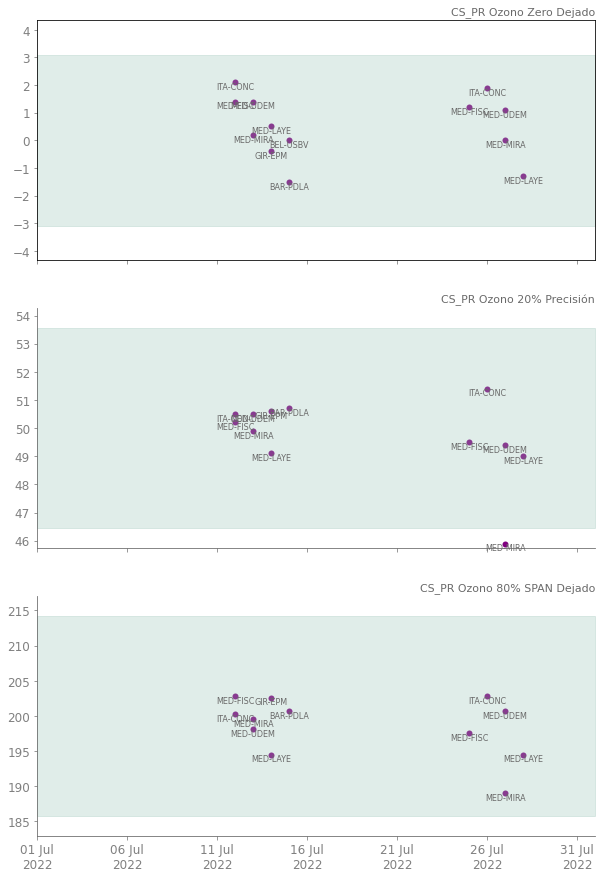

In [7]:
for k, var in enumerate(VAR):
    DfTipo     = pd.DataFrame()
    
    for tipofile in self.C.keys():
        print(tipofile)
        print ('****************tipofile*******************')
        DfTipo     = DfVerificaciones[DfVerificaciones["Tipo"]==tipofile]
        DfTipo     = DfTipo[DfTipo["Var"]==var]
        plt.close('all')
        if DfTipo.empty:
            print('DataFrame is empty!')
        else:
            
            if tipofile == 'MP':
                fig, ax = plt.subplots(3,facecolor='w',edgecolor='w', sharex=True, figsize=(10, 15))
                
                #fig = plt.figure(4,figsize=(30, 15),facecolor='w',edgecolor='w')
                #fig, ((ax[1], ax[2]), (ax[3], ax[4])) = plt.subplots(2, 2)
                #fig, axs = plt.subplots(3)

                #plt.subplots(nrows=2, ncols=2, constrained_layout=False)

                #plt.subplots_adjust(wspace=.2,hspace=.35,bottom=0.2,left=0.1,right=0.9,top=0.8)
                plt.rcParams["ytick.labelsize"]=12
                plt.rcParams["xtick.labelsize"]=12
                plt.rcParams["xtick.color"]='gray'
                plt.rcParams["ytick.color"]='gray'
                ax[0].spines['top'].set_visible(False)
                ax[0].spines['right'].set_visible(False)
                ax[0].spines['left'].set_color('dimgrey')
                ax[0].spines['bottom'].set_color('dimgrey')
                ax[0].scatter(DfTipo.index,DfTipo['Zero Dejado'],color='purple',label=DfTipo['Estacion'],linewidth=0.01, marker='o')
                dtFmt     = mdates.DateFormatter('%d %b\n%Y') # define the formatting
                ax[0].xaxis.set_major_formatter(dtFmt) 
                ax[0].tick_params(axis='x', labelrotation= 0)
                ax[0].xaxis.set_major_locator(mdates.DayLocator(interval=5))
                ax[0].set_xlim(left=None, right=None, emit=True, auto=False, xmin=inicio, xmax=fin)
                ax[0].fill_between(lista_fechas,DfTipo['Zero_rango'][0]*-1,DfTipo['Zero_rango'][0],color=[155/255.,196/255.,184/255.,],alpha=0.3)

                for i, label in enumerate(DfTipo['Estacion']):

                    ax[0].annotate(label, (DfTipo.index[int(i)], DfTipo['Zero Dejado'][int(i)]), color='dimgray', ha='center', va='top', size=8)#ha= 'center', 'right', 'left' va= 'top', 'bottom', 'center', 'baseline', 'center_baseline' 

                ax[0].set_title(DfTipo['Tipo'][0]+' '+DfTipo['Var'][0]+' '+'Zero Dejado',fontsize=11, color='dimgray',loc='right')

                ax[1].spines['top'].set_visible(False)
                ax[1].spines['right'].set_visible(False)
                ax[1].spines['left'].set_color('dimgrey')
                ax[1].spines['bottom'].set_color('dimgrey')
                ax[1].scatter(DfTipo.index,(DfTipo['20% Multipunto']-DfTipo['Referencia'])*0.2,color='purple',label=DfTipo['Estacion'],linewidth=0.01, marker='o')
                dtFmt     = mdates.DateFormatter('%d %b\n%Y') # define the formatting
                ax[1].xaxis.set_major_formatter(dtFmt) 
                ax[1].tick_params(axis='x', labelrotation= 0)
                ax[1].xaxis.set_major_locator(mdates.DayLocator(interval=5))
                ax[1].set_xlim(left=None, right=None, emit=True, auto=False, xmin=inicio, xmax=fin)
                #ax[1, 0].fill_between(lista_fechas,DfTipo['Referencia'][0]*-1*0.2,DfTipo['Referencia'][0]*0.2,color=[155/255.,196/255.,184/255.,],alpha=0.3)
                ax[1].set_ylim( ymin=0.2*DfTipo['Referencia'][0]+(DfTipo['Precision'][0]*-0.12*0.02*DfTipo['Referencia'][0]), ymax=0.2*DfTipo['Referencia'][0]+(DfTipo['Precision'][0]*0.12*0.02*DfTipo['Referencia'][0]))
                ax[1].fill_between(lista_fechas,(0.2*DfTipo['Referencia'][0]+DfTipo['Precision'][0]*-0.1*0.02*DfTipo['Referencia'][0]),0.2*DfTipo['Referencia'][0]+(DfTipo['Precision'][0]*0.1*0.02*DfTipo['Referencia'][0]),color=[155/255.,196/255.,184/255.,],alpha=0.3)


                for i, label in enumerate(DfTipo['Estacion']):

                    ax[1].annotate(label, (DfTipo.index[int(i)], DfTipo['20% Multipunto'][int(i)]), color='dimgray', ha='center', va='top', size=8)#ha= 'center', 'right', 'left' va= 'top', 'bottom', 'center', 'baseline', 'center_baseline' 

                ax[1].set_title(DfTipo['Tipo'][0]+' '+DfTipo['Var'][0]+' '+'20% Multipunto',fontsize=11, color='dimgray',loc='right')

                 
               
                '''
                ax[0, 1].scatter(DfTipo.index,DfTipo['40% Multipunto'],color='purple',label=DfTipo['Estacion'],linewidth=0.01, marker='o')
                dtFmt     = mdates.DateFormatter('%d %b\n%Y') # define the formatting
                ax[0, 1].xaxis.set_major_formatter(dtFmt) 
                ax[0, 1].tick_params(axis='x', labelrotation= 0)
                ax[0, 1].xaxis.set_major_locator(mdates.DayLocator(interval=5))
                ax[0, 1].set_xlim(left=None, right=None, emit=True, auto=False, xmin=(np.max(DfTipo['40% Multipunto'])*1.1), xmax=fin)
                ax[0, 1].set_ylim( ymin=DfTipo['Referencia'][0]*0.4*-1.2, ymax=DfTipo['Referencia'][0]*0.4*1.2)
                ax[0, 1].fill_between(lista_fechas,DfTipo['Referencia'][0]*-1*0.4,DfTipo['Referencia'][0]*0.4,color=[155/255.,196/255.,184/255.,],alpha=0.3)

                for i, label in enumerate(DfTipo['Estacion']):

                    ax[0, 1].annotate(label, (DfTipo.index[int(i)], DfTipo['40% Multipunto'][int(i)]), color='dimgray', ha='center', va='top', size=8)#ha= 'center', 'right', 'left' va= 'top', 'bottom', 'center', 'baseline', 'center_baseline' 

                ax[0, 1].set_title(DfTipo['Tipo'][0]+' '+DfTipo['Var'][0]+' '+'40% Multipunto',fontsize=11, color='dimgray',loc='right')
                '''
                
                ax[2].spines['top'].set_visible(False)
                ax[2].spines['right'].set_visible(False)
                ax[2].spines['left'].set_color('dimgrey')
                ax[2].spines['bottom'].set_color('dimgrey')
                ax[2].scatter(DfTipo.index,(DfTipo['80% Multipunto']-DfTipo['Referencia'])*0.8,color='purple',label=DfTipo['Estacion'],linewidth=0.01, marker='o')
                dtFmt     = mdates.DateFormatter('%d %b\n%Y') # define the formatting
                ax[2].xaxis.set_major_formatter(dtFmt) 
                ax[2].tick_params(axis='x', labelrotation= 0)
                ax[2].xaxis.set_major_locator(mdates.DayLocator(interval=5))
                ax[2].set_xlim(left=None, right=None, emit=True, auto=False, xmin=inicio, xmax=fin)
                #ax[1, 1].fill_between(lista_fechas,DfTipo['Referencia'][0]*-1*0.8,DfTipo['Referencia'][0]*0.8,color=[155/255.,196/255.,184/255.,],alpha=0.3)
                ax[2].set_ylim( ymin=0.8*DfTipo['Referencia'][0]+(DfTipo['Precision'][0]*-0.12*0.08*DfTipo['Referencia'][0]), ymax=0.8*DfTipo['Referencia'][0]+(DfTipo['Precision'][0]*0.12*0.08*DfTipo['Referencia'][0]))
                ax[2].fill_between(lista_fechas,0.8*DfTipo['Referencia'][0]+(DfTipo['Precision'][0]*-0.1*0.08*DfTipo['Referencia'][0]),0.8*DfTipo['Referencia'][0]+(DfTipo['Precision'][0]*0.1*0.08*DfTipo['Referencia'][0]),color=[155/255.,196/255.,184/255.,],alpha=0.3)


                for i, label in enumerate(DfTipo['Estacion']):

                    ax[2].annotate(label, (DfTipo.index[int(i)], DfTipo['80% Multipunto'][int(i)]), color='dimgray', ha='center', va='top', size=8)#ha= 'center', 'right', 'left' va= 'top', 'bottom', 'center', 'baseline', 'center_baseline' 

                ax[2].set_title(DfTipo['Tipo'][0]+' '+DfTipo['Var'][0]+' '+'80% Multipunto',fontsize=11, color='dimgray',loc='right')
                
            else:
                
                fig, ax = plt.subplots(3,facecolor='w',edgecolor='w', sharex=True, figsize=(10, 15))

                #fig = plt.figure(4,figsize=(30, 15),facecolor='w',edgecolor='w')
                #fig, ((ax[1], ax[2]), (ax[3], ax[4])) = plt.subplots(2, 2)
                #fig, axs = plt.subplots(3)

                #plt.subplots(nrows=2, ncols=2, constrained_layout=False)

                '''plt.subplots_adjust(wspace=.2,hspace=.35,bottom=0.2,left=0.1,right=0.9,top=0.8)
                plt.rcParams["ytick.labelsize"]=10
                plt.rcParams["xtick.labelsize"]=10
                plt.rcParams["xtick.color"]='gray'
                plt.rcParams["ytick.color"]='gray'
                ax[0].spines['top'].set_visible(False)
                ax[0].spines['right'].set_visible(False)
                ax[0].spines['left'].set_color('dimgrey')
                ax[0].spines['bottom'].set_color('dimgrey')'''
                ax[0].scatter(DfTipo.index,DfTipo['Zero Dejado'],color='purple',label=DfTipo['Estacion'],linewidth=0.01, marker='o')
                dtFmt     = mdates.DateFormatter('%d %b\n%Y') # define the formatting
                ax[0].xaxis.set_major_formatter(dtFmt) 
                ax[0].tick_params(axis='x', labelrotation= 0)
                ax[0].xaxis.set_major_locator(mdates.DayLocator(interval=5))
                ax[0].set_xlim(left=None, right=None, emit=True, auto=False, xmin=inicio, xmax=fin)
                ax[0].set_ylim(ymin=DfTipo['Zero_rango'][0]*-1.4, ymax=DfTipo['Zero_rango'][0]*1.4)

                ax[0].fill_between(lista_fechas,DfTipo['Zero_rango'][0]*-1,DfTipo['Zero_rango'][0],color=[155/255.,196/255.,184/255.,],alpha=0.3)

                for i, label in enumerate(DfTipo['Estacion']):

                    ax[0].annotate(label, (DfTipo.index[int(i)], DfTipo['Zero Dejado'][int(i)]), color='dimgray', ha='center', va='top', size=8)#ha= 'center', 'right', 'left' va= 'top', 'bottom', 'center', 'baseline', 'center_baseline' 

                ax[0].set_title(DfTipo['Tipo'][0]+' '+DfTipo['Var'][0]+' '+'Zero Dejado',fontsize=11, color='dimgray',loc='right')

                ax[1].spines['top'].set_visible(False)
                ax[1].spines['right'].set_visible(False)
                ax[1].spines['left'].set_color('dimgrey')
                ax[1].spines['bottom'].set_color('dimgrey')
                ax[1].scatter(DfTipo.index,DfTipo['20% Precisión'],color='purple',label=DfTipo['Estacion'],linewidth=0.01, marker='o')
                dtFmt     = mdates.DateFormatter('%d %b\n%Y') # define the formatting
                ax[1].xaxis.set_major_formatter(dtFmt) 
                ax[1].tick_params(axis='x', labelrotation= 0)
                ax[1].xaxis.set_major_locator(mdates.DayLocator(interval=5))
                ax[1].set_xlim(left=None, right=None, emit=True, auto=False, xmin=inicio, xmax=fin)
                ax[1].set_ylim( ymin=0.2*DfTipo[DfTipo["Estacion"]!="BEL-USBV"]['Referencia'][0]+(DfTipo[DfTipo["Estacion"]!="BEL-USBV"]['Precision'][0]*-0.12*0.02*DfTipo['Referencia'][0]), ymax=0.2*DfTipo[DfTipo["Estacion"]!="BEL-USBV"]['Referencia'][0]+(DfTipo[DfTipo["Estacion"]!="BEL-USBV"]['Precision'][0]*0.12*0.02*DfTipo['Referencia'][0]))
                ax[1].fill_between(lista_fechas,0.2*DfTipo[DfTipo["Estacion"]!="BEL-USBV"]['Referencia'][0]+(DfTipo[DfTipo["Estacion"]!="BEL-USBV"]['Precision'][0]*-0.1*0.02*DfTipo['Referencia'][0]),0.2*DfTipo[DfTipo["Estacion"]!="BEL-USBV"]['Referencia'][0]+(DfTipo[DfTipo["Estacion"]!="BEL-USBV"]['Precision'][0]*0.1*0.02*DfTipo['Referencia'][0]),color=[155/255.,196/255.,184/255.,],alpha=0.3)

                for i, label in enumerate(DfTipo['Estacion']):

                    ax[1].annotate(label, (DfTipo.index[i], DfTipo['20% Precisión'][i]), color='dimgray', ha='center', va='top', size=8)#ha= 'center', 'right', 'left' va= 'top', 'bottom', 'center', 'baseline', 'center_baseline' 

                ax[1].set_title(DfTipo['Tipo'][0]+' '+DfTipo['Var'][0]+' '+'20% Precisión',fontsize=11, color='dimgray',loc='right')



                ax[2].spines['top'].set_visible(False)
                ax[2].spines['right'].set_visible(False)
                ax[2].spines['left'].set_color('dimgrey')
                ax[2].spines['bottom'].set_color('dimgrey')
                ax[2].scatter(DfTipo.index,(DfTipo['80% SPAN Dejado']),color='purple',label=DfTipo['Estacion'],linewidth=0.01, marker='o')
                dtFmt     = mdates.DateFormatter('%d %b\n%Y') # define the formatting
                ax[2].xaxis.set_major_formatter(dtFmt) 
                ax[2].tick_params(axis='x', labelrotation= 0)
                ax[2].xaxis.set_major_locator(mdates.DayLocator(interval=5))
                ax[2].set_xlim(left=None, right=None, emit=True, auto=False, xmin=inicio, xmax=fin)
                ax[2].set_ylim( ymin=0.8*DfTipo[DfTipo["Estacion"]!="BEL-USBV"]['Referencia'][0]+(DfTipo[DfTipo["Estacion"]!="BEL-USBV"]['Span'][0]*-0.12*0.08*DfTipo['Referencia'][0]), ymax=0.8*DfTipo[DfTipo["Estacion"]!="BEL-USBV"]['Referencia'][0]+(DfTipo[DfTipo["Estacion"]!="BEL-USBV"]['Span'][0]*0.12*0.08*DfTipo['Referencia'][0]))
                ax[2].fill_between(lista_fechas,0.8*DfTipo[DfTipo["Estacion"]!="BEL-USBV"]['Referencia'][0]+(DfTipo[DfTipo["Estacion"]!="BEL-USBV"]['Span'][0]*-0.1*0.08*DfTipo['Referencia'][0]),0.8*DfTipo[DfTipo["Estacion"]!="BEL-USBV"]['Referencia'][0]+(DfTipo[DfTipo["Estacion"]!="BEL-USBV"]['Span'][0]*0.1*0.08*DfTipo['Referencia'][0]),color=[155/255.,196/255.,184/255.,],alpha=0.3)

                for i, label in enumerate(DfTipo['Estacion']):

                    ax[2].annotate(label, (DfTipo.index[int(i)], DfTipo['80% SPAN Dejado'][int(i)]), color='dimgray', ha='center', va='top', size=8)#ha= 'center', 'right', 'left' va= 'top', 'bottom', 'center', 'baseline', 'center_baseline' 

                ax[2].set_title(DfTipo['Tipo'][0]+' '+DfTipo['Var'][0]+' '+'80% SPAN Dejado',fontsize=11, color='dimgray',loc='right')
           
            Figsave = DfTipo['Tipo'][0]+' '+DfTipo['Var'][0]+' '+Fechai+'_'+Fechaf+'.png'
            plt.savefig(Figsave)
            os.system("sshpass 'alina1234' scp *.txt alinam@siata.gov.co:/var/www/CalidadAire/GraficasDeControl/")
            
            '''           
            for i in np.arange(0,len(DfTipo)):
                print(str(DfTipo.index[i].month))
                if (0.2*DfTipo['Referencia'][0]+(DfTipo['Precision'][0]*-0.1*0.02*DfTipo['Referencia'][0])) > DfTipo['20% Precisión'][i] or ((0.2*DfTipo['Referencia'][i]+DfTipo['Precision'][i]*0.1*0.02*DfTipo['Referencia'][0])) < DfTipo['20% Precisión'][i] or ((0.8*DfTipo['Referencia'][i]+DfTipo['Span'][i]*-0.1*0.08*DfTipo['Referencia'][0])) > DfTipo['80% SPAN Dejado'][i] or (0.8*DfTipo['Referencia'][i]+(DfTipo['Span'][0]*0.1*0.08*DfTipo['Referencia'][0])) < DfTipo['80% SPAN Dejado'][i] or DfTipo['Zero_rango'][i]*-1 > DfTipo['Zero Dejado'][i] or DfTipo['Zero_rango'][i] < DfTipo['Zero Dejado'][i]:
                    send_msg("¡Alerta!, la verificación "+DfTipo['Tipo'][i]+' '+DfTipo['Var'][i]+'Realizada ern la estación '+ DfTipo['Estacion'][i]+ ', el día '+ str(DfTipo.index[i])+ ', se encuentra fuera del rango permitido')
                    
                elif (0.2*DfTipo['Referencia'][i]+(DfTipo['Precision'][i]*-0.1*0.02*DfTipo['Referencia'][0]))*0.8 > DfTipo['20% Precisión'][i] or (0.2*DfTipo['Referencia'][i]+(DfTipo['Precision'][i]*0.1*0.02*DfTipo['Referencia'][0]))*0.8 < DfTipo['20% Precisión'][i] or (0.8*DfTipo['Referencia'][i]+(DfTipo['Span'][i]*-0.1*0.08*DfTipo['Referencia'][0]))*0.8 > DfTipo['80% SPAN Dejado'][i] or (0.8*DfTipo['Referencia'][i]+(DfTipo['Span'][0]*0.1*0.08*DfTipo['Referencia'][0]))*0.8 < DfTipo['80% SPAN Dejado'][i] or DfTipo['Zero_rango'][i]*-1*0.8 > DfTipo['Zero Dejado'][i] or DfTipo['Zero_rango'][i]*0.8 < DfTipo['Zero Dejado'][i]:
                    send_msg("Cuidado, la verificación "+DfTipo['Tipo'][i]+' '+DfTipo['Var'][i]+'Realizada ern la estación '+ DfTipo['Estacion'][i]+ ', el día '+str(DfTipo.index[i])+ ', se encuentra cerca del rango permitido')
                else: 
                    send_msg("No se encuentran novedades en las verificaciones del mes " + str(DfTipo.index[i].month)+ " para " +DfTipo['Tipo'][i]+' '+DfTipo['Var'][i]+' '+DfTipo['Estacion'][i])
            ''' 
    del DfTipo  
    

In [19]:
0.2*DfTipo['Referencia'][0]+(DfTipo['Precision'][0]*-0.1*0.02*DfTipo['Referencia'][0])

NameError: name 'DfTipo' is not defined

In [ ]:
DfTipo

In [17]:
for k, var in enumerate(VAR):
    DfTipo     = pd.DataFrame()
    
    for tipofile in self.C.keys():
        print(tipofile)
        print ('****************tipofile*******************')
        DfTipo     = DfVerificaciones[DfVerificaciones["Tipo"]==tipofile]
        DfTipo     = DfTipo[DfTipo["Var"]==var]
        plt.close('all')
        if DfTipo.empty:
            print('DataFrame is empty!')
        else:
            
            if tipofile == 'MP':
                fig, ax = plt.subplots(3,facecolor='w',edgecolor='w', sharex=True, figsize=(10, 15))
                
                #fig = plt.figure(4,figsize=(30, 15),facecolor='w',edgecolor='w')
                #fig, ((ax[1], ax[2]), (ax[3], ax[4])) = plt.subplots(2, 2)
                #fig, axs = plt.subplots(3)

                #plt.subplots(nrows=2, ncols=2, constrained_layout=False)

                plt.subplots_adjust(wspace=.2,hspace=.35,bottom=0.2,left=0.1,right=0.9,top=0.8)
                '''plt.rcParams["ytick.labelsize"]=12
                plt.rcParams["xtick.labelsize"]=12
                plt.rcParams["xtick.color"]='gray'
                plt.rcParams["ytick.color"]='gray''''
                ax[0].spines['top'].set_visible(False)
                ax[0].spines['right'].set_visible(False)
                ax[0].spines['left'].set_color('dimgrey')
                ax[0].spines['bottom'].set_color('dimgrey')
                ax[0].scatter(DfTipo.index,DfTipo['Zero Dejado'],color='purple',label=DfTipo['Estacion'],linewidth=0.01, marker='o')
                dtFmt     = mdates.DateFormatter('%d %b\n%Y') # define the formatting
                ax[0].xaxis.set_major_formatter(dtFmt) 
                ax[0].tick_params(axis='x', labelrotation= 0)
                ax[0].xaxis.set_major_locator(mdates.DayLocator(interval=5))
                ax[0].set_xlim(left=None, right=None, emit=True, auto=False, xmin=inicio, xmax=fin)
                ax[0].fill_between(lista_fechas,DfTipo['Zero_rango'][0]*-1,DfTipo['Zero_rango'][0],color=[155/255.,196/255.,184/255.,],alpha=0.3)

                for i, label in enumerate(DfTipo['Estacion']):

                    ax[0].annotate(label, (DfTipo.index[int(i)], DfTipo['Zero Dejado'][int(i)]), color='dimgray', ha='center', va='top', size=8)#ha= 'center', 'right', 'left' va= 'top', 'bottom', 'center', 'baseline', 'center_baseline' 

                ax[0].set_title(DfTipo['Tipo'][0]+' '+DfTipo['Var'][0]+' '+'Zero Dejado',fontsize=11, color='dimgray',loc='right')

                ax[1].spines['top'].set_visible(False)
                ax[1].spines['right'].set_visible(False)
                ax[1].spines['left'].set_color('dimgrey')
                ax[1].spines['bottom'].set_color('dimgrey')
                ax[1].scatter(DfTipo.index,(DfTipo['20% Multipunto']-DfTipo['Referencia'])*0.2,color='purple',label=DfTipo['Estacion'],linewidth=0.01, marker='o')
                dtFmt     = mdates.DateFormatter('%d %b\n%Y') # define the formatting
                ax[1].xaxis.set_major_formatter(dtFmt) 
                ax[1].tick_params(axis='x', labelrotation= 0)
                ax[1].xaxis.set_major_locator(mdates.DayLocator(interval=5))
                ax[1].set_xlim(left=None, right=None, emit=True, auto=False, xmin=inicio, xmax=fin)
                #ax[1, 0].fill_between(lista_fechas,DfTipo['Referencia'][0]*-1*0.2,DfTipo['Referencia'][0]*0.2,color=[155/255.,196/255.,184/255.,],alpha=0.3)
                ax[1].set_ylim( ymin=0.2*DfTipo['Referencia'][0]+(DfTipo['Precision'][0]*-0.12), ymax=0.2*DfTipo['Referencia'][0]+(DfTipo['Precision'][0]*0.12))
                ax[1].fill_between(lista_fechas,(0.2*DfTipo['Referencia'][0]+DfTipo['Precision'][0]*-0.1),0.2*DfTipo['Referencia'][0]+(DfTipo['Precision'][0]*0.1),color=[155/255.,196/255.,184/255.,],alpha=0.3)


                for i, label in enumerate(DfTipo['Estacion']):

                    ax[1].annotate(label, (DfTipo.index[int(i)], DfTipo['20% Multipunto'][int(i)]), color='dimgray', ha='center', va='top', size=8)#ha= 'center', 'right', 'left' va= 'top', 'bottom', 'center', 'baseline', 'center_baseline' 

                ax[1].set_title(DfTipo['Tipo'][0]+' '+DfTipo['Var'][0]+' '+'20% Multipunto',fontsize=11, color='dimgray',loc='right')

                 
               
                '''
                ax[0, 1].scatter(DfTipo.index,DfTipo['40% Multipunto'],color='purple',label=DfTipo['Estacion'],linewidth=0.01, marker='o')
                dtFmt     = mdates.DateFormatter('%d %b\n%Y') # define the formatting
                ax[0, 1].xaxis.set_major_formatter(dtFmt) 
                ax[0, 1].tick_params(axis='x', labelrotation= 0)
                ax[0, 1].xaxis.set_major_locator(mdates.DayLocator(interval=5))
                ax[0, 1].set_xlim(left=None, right=None, emit=True, auto=False, xmin=(np.max(DfTipo['40% Multipunto'])*1.1), xmax=fin)
                ax[0, 1].set_ylim( ymin=DfTipo['Referencia'][0]*0.4*-1.2, ymax=DfTipo['Referencia'][0]*0.4*1.2)
                ax[0, 1].fill_between(lista_fechas,DfTipo['Referencia'][0]*-1*0.4,DfTipo['Referencia'][0]*0.4,color=[155/255.,196/255.,184/255.,],alpha=0.3)

                for i, label in enumerate(DfTipo['Estacion']):

                    ax[0, 1].annotate(label, (DfTipo.index[int(i)], DfTipo['40% Multipunto'][int(i)]), color='dimgray', ha='center', va='top', size=8)#ha= 'center', 'right', 'left' va= 'top', 'bottom', 'center', 'baseline', 'center_baseline' 

                ax[0, 1].set_title(DfTipo['Tipo'][0]+' '+DfTipo['Var'][0]+' '+'40% Multipunto',fontsize=11, color='dimgray',loc='right')
                '''
                
                ax[2].spines['top'].set_visible(False)
                ax[2].spines['right'].set_visible(False)
                ax[2].spines['left'].set_color('dimgrey')
                ax[2].spines['bottom'].set_color('dimgrey')
                ax[2].scatter(DfTipo.index,(DfTipo['80% Multipunto']-DfTipo['Referencia'])*0.8,color='purple',label=DfTipo['Estacion'],linewidth=0.01, marker='o')
                dtFmt     = mdates.DateFormatter('%d %b\n%Y') # define the formatting
                ax[2].xaxis.set_major_formatter(dtFmt) 
                ax[2].tick_params(axis='x', labelrotation= 0)
                ax[2].xaxis.set_major_locator(mdates.DayLocator(interval=5))
                ax[2].set_xlim(left=None, right=None, emit=True, auto=False, xmin=inicio, xmax=fin)
                #ax[1, 1].fill_between(lista_fechas,DfTipo['Referencia'][0]*-1*0.8,DfTipo['Referencia'][0]*0.8,color=[155/255.,196/255.,184/255.,],alpha=0.3)
                ax[2].set_ylim( ymin=0.8*DfTipo['Referencia'][0]+(DfTipo['Precision'][0]*-0.12), ymax=0.8*DfTipo['Referencia'][0]+(DfTipo['Precision'][0]*0.12))
                ax[2].fill_between(lista_fechas,0.8*DfTipo['Referencia'][0]+(DfTipo['Precision'][0]*-0.1),0.8*DfTipo['Referencia'][0]+(DfTipo['Precision'][0]*0.1),color=[155/255.,196/255.,184/255.,],alpha=0.3)


                for i, label in enumerate(DfTipo['Estacion']):

                    ax[2].annotate(label, (DfTipo.index[int(i)], DfTipo['80% Multipunto'][int(i)]), color='dimgray', ha='center', va='top', size=8)#ha= 'center', 'right', 'left' va= 'top', 'bottom', 'center', 'baseline', 'center_baseline' 

                ax[2].set_title(DfTipo['Tipo'][0]+' '+DfTipo['Var'][0]+' '+'80% Multipunto',fontsize=11, color='dimgray',loc='right')
                
            else:
                
                fig, ax = plt.subplots(3,facecolor='w',edgecolor='w', sharex=True, figsize=(10, 15))

                #fig = plt.figure(4,figsize=(30, 15),facecolor='w',edgecolor='w')
                #fig, ((ax[1], ax[2]), (ax[3], ax[4])) = plt.subplots(2, 2)
                #fig, axs = plt.subplots(3)

                #plt.subplots(nrows=2, ncols=2, constrained_layout=False)

                plt.subplots_adjust(wspace=.2,hspace=.35,bottom=0.2,left=0.1,right=0.9,top=0.8)
                plt.rcParams["ytick.labelsize"]=10
                plt.rcParams["xtick.labelsize"]=10
                plt.rcParams["xtick.color"]='gray'
                plt.rcParams["ytick.color"]='gray'
                ax[0].spines['top'].set_visible(False)
                ax[0].spines['right'].set_visible(False)
                ax[0].spines['left'].set_color('dimgrey')
                ax[0].spines['bottom'].set_color('dimgrey')
                ax[0].scatter(DfTipo.index,DfTipo['Zero Dejado'],color='purple',label=DfTipo['Estacion'],linewidth=0.01, marker='o')
                dtFmt     = mdates.DateFormatter('%d %b\n%Y') # define the formatting
                ax[0].xaxis.set_major_formatter(dtFmt) 
                ax[0].tick_params(axis='x', labelrotation= 0)
                ax[0].xaxis.set_major_locator(mdates.DayLocator(interval=5))
                ax[0].set_xlim(left=None, right=None, emit=True, auto=False, xmin=inicio, xmax=fin)
                ax[0].set_ylim(ymin=DfTipo['Zero_rango'][0]*-1.4, ymax=DfTipo['Zero_rango'][0]*1.4)

                ax[0].fill_between(lista_fechas,DfTipo['Zero_rango'][0]*-1,DfTipo['Zero_rango'][0],color=[155/255.,196/255.,184/255.,],alpha=0.3)

                for i, label in enumerate(DfTipo['Estacion']):

                    ax[0].annotate(label, (DfTipo.index[int(i)], DfTipo['Zero Dejado'][int(i)]), color='dimgray', ha='center', va='top', size=8)#ha= 'center', 'right', 'left' va= 'top', 'bottom', 'center', 'baseline', 'center_baseline' 

                ax[0].set_title(DfTipo['Tipo'][0]+' '+DfTipo['Var'][0]+' '+'Zero Dejado',fontsize=11, color='dimgray',loc='right')

                ax[1].spines['top'].set_visible(False)
                ax[1].spines['right'].set_visible(False)
                ax[1].spines['left'].set_color('dimgrey')
                ax[1].spines['bottom'].set_color('dimgrey')
                ax[1].scatter(DfTipo.index,DfTipo['20% Precisión'],color='purple',label=DfTipo['Estacion'],linewidth=0.01, marker='o')
                dtFmt     = mdates.DateFormatter('%d %b\n%Y') # define the formatting
                ax[1].xaxis.set_major_formatter(dtFmt) 
                ax[1].tick_params(axis='x', labelrotation= 0)
                ax[1].xaxis.set_major_locator(mdates.DayLocator(interval=5))
                ax[1].set_xlim(left=None, right=None, emit=True, auto=False, xmin=inicio, xmax=fin)
                ax[1].set_ylim( ymin=0.2*DfTipo[DfTipo["Estacion"]!="BEL-USBV"]['Referencia'][0]+(DfTipo[DfTipo["Estacion"]!="BEL-USBV"]['Precision'][0]*-0.12), ymax=0.2*DfTipo[DfTipo["Estacion"]!="BEL-USBV"]['Referencia'][0]+(DfTipo[DfTipo["Estacion"]!="BEL-USBV"]['Precision'][0]*0.12))
                ax[1].fill_between(lista_fechas,0.2*DfTipo[DfTipo["Estacion"]!="BEL-USBV"]['Referencia'][0]+(DfTipo[DfTipo["Estacion"]!="BEL-USBV"]['Precision'][0]*-0.1),0.2*DfTipo[DfTipo["Estacion"]!="BEL-USBV"]['Referencia'][0]+(DfTipo[DfTipo["Estacion"]!="BEL-USBV"]['Precision'][0]*0.1),color=[155/255.,196/255.,184/255.,],alpha=0.3)

                for i, label in enumerate(DfTipo['Estacion']):

                    ax[1].annotate(label, (DfTipo.index[i], DfTipo['20% Precisión'][i]), color='dimgray', ha='center', va='top', size=8)#ha= 'center', 'right', 'left' va= 'top', 'bottom', 'center', 'baseline', 'center_baseline' 

                ax[1].set_title(DfTipo['Tipo'][0]+' '+DfTipo['Var'][0]+' '+'20% Precisión',fontsize=11, color='dimgray',loc='right')



                ax[2].spines['top'].set_visible(False)
                ax[2].spines['right'].set_visible(False)
                ax[2].spines['left'].set_color('dimgrey')
                ax[2].spines['bottom'].set_color('dimgrey')
                ax[2].scatter(DfTipo.index,(DfTipo['80% SPAN Dejado']),color='purple',label=DfTipo['Estacion'],linewidth=0.01, marker='o')
                dtFmt     = mdates.DateFormatter('%d %b\n%Y') # define the formatting
                ax[2].xaxis.set_major_formatter(dtFmt) 
                ax[2].tick_params(axis='x', labelrotation= 0)
                ax[2].xaxis.set_major_locator(mdates.DayLocator(interval=5))
                ax[2].set_xlim(left=None, right=None, emit=True, auto=False, xmin=inicio, xmax=fin)
                ax[2].set_ylim( ymin=0.8*DfTipo[DfTipo["Estacion"]!="BEL-USBV"]['Referencia'][0]+(DfTipo[DfTipo["Estacion"]!="BEL-USBV"]['Span'][0]*-0.12), ymax=0.8*DfTipo[DfTipo["Estacion"]!="BEL-USBV"]['Referencia'][0]+(DfTipo[DfTipo["Estacion"]!="BEL-USBV"]['Span'][0]*0.12))
                ax[2].fill_between(lista_fechas,0.8*DfTipo[DfTipo["Estacion"]!="BEL-USBV"]['Referencia'][0]+(DfTipo[DfTipo["Estacion"]!="BEL-USBV"]['Span'][0]*-0.1),0.8*DfTipo[DfTipo["Estacion"]!="BEL-USBV"]['Referencia'][0]+(DfTipo[DfTipo["Estacion"]!="BEL-USBV"]['Span'][0]*0.1),color=[155/255.,196/255.,184/255.,],alpha=0.3)

                for i, label in enumerate(DfTipo['Estacion']):

                    ax[2].annotate(label, (DfTipo.index[int(i)], DfTipo['80% SPAN Dejado'][int(i)]), color='dimgray', ha='center', va='top', size=8)#ha= 'center', 'right', 'left' va= 'top', 'bottom', 'center', 'baseline', 'center_baseline' 

                ax[2].set_title(DfTipo['Tipo'][0]+' '+DfTipo['Var'][0]+' '+'80% SPAN Dejado',fontsize=11, color='dimgray',loc='right')
           
            Figsave = DfTipo['Tipo'][0]+' '+DfTipo['Var'][0]+' '+Fechai+'_'+Fechaf+'.png'
            plt.savefig(Figsave)
            #os.system("sshpass 'alina1234' scp *.txt alinam@siata.gov.co:/var/www/CalidadAire/GraficasDeControl/")
            
                        
            for i in np.arange(0,len(DfTipo)):
                print(str(DfTipo.index[i].month))
                if (0.2*DfTipo['Referencia'][0]+(DfTipo['Precision'][0]*-0.1)) > DfTipo['20% Precisión'][i] or ((0.2*DfTipo['Referencia'][i]+DfTipo['Precision'][i]*0.1)) < DfTipo['20% Precisión'][i] or ((0.8*DfTipo['Referencia'][i]+DfTipo['Span'][i]*-0.1)) > DfTipo['80% SPAN Dejado'][i] or (0.8*DfTipo['Referencia'][i]+(DfTipo['Span'][0]*0.1)) < DfTipo['80% SPAN Dejado'][i] or DfTipo['Zero_rango'][i]*-1 > DfTipo['Zero Dejado'][i] or DfTipo['Zero_rango'][i] < DfTipo['Zero Dejado'][i]:
                    send_msg("¡Alerta!, la verificación "+DfTipo['Tipo'][i]+' '+DfTipo['Var'][i]+'Realizada ern la estación '+ DfTipo['Estacion'][i]+ ', el día '+ str(DfTipo.index[i])+ ', se encuentra fuera del rango permitido')
                    
                elif (0.2*DfTipo['Referencia'][i]+(DfTipo['Precision'][i]*-0.1))*0.8 > DfTipo['20% Precisión'][i] or (0.2*DfTipo['Referencia'][i]+(DfTipo['Precision'][i]*0.1))*0.8 < DfTipo['20% Precisión'][i] or (0.8*DfTipo['Referencia'][i]+(DfTipo['Span'][i]*-0.1))*0.8 > DfTipo['80% SPAN Dejado'][i] or (0.8*DfTipo['Referencia'][i]+(DfTipo['Span'][0]*0.1))*0.8 < DfTipo['80% SPAN Dejado'][i] or DfTipo['Zero_rango'][i]*-1*0.8 > DfTipo['Zero Dejado'][i] or DfTipo['Zero_rango'][i]*0.8 < DfTipo['Zero Dejado'][i]:
                    send_msg("Cuidado, la verificación "+DfTipo['Tipo'][i]+' '+DfTipo['Var'][i]+'Realizada ern la estación '+ DfTipo['Estacion'][i]+ ', el día '+str(DfTipo.index[i])+ ', se encuentra cerca del rango permitido')
                else: 
                    send_msg("No se encuentran novedades en las verificaciones del mes " + str(DfTipo.index[i].month)+ " para " +DfTipo['Tipo'][i]+' '+DfTipo['Var'][i]+' '+DfTipo['Estacion'][i])
    
    del DfTipo  
    

SyntaxError: EOL while scanning string literal (2182068233.py, line 27)

In [ ]:
DfVerificaciones[DfVerificaciones["Estacion"]!="BEL-USBV"]['Referencia'][0]

In [ ]:
DfTipo[DfTipo["Estacion"]!="BEL-USBV"]['Referencia'][0]

In [ ]:
i=0
((DfTipo['Precision'][i]*-0.1*0.2*DfTipo['Referencia'][i])-DfTipo['Referencia'][i])*0.8 > DfTipo['20% Precisión'][i] or ((DfTipo['Precision'][i]*0.1*0.2*DfTipo['Referencia'][i])+DfTipo['Referencia'][i])*0.8 < DfTipo['20% Precisión'][i] or ((DfTipo['Span'][i]*-0.1*0.8*DfTipo['Referencia'][i])-DfTipo['Referencia'][i])*0.8 > DfTipo['80% SPAN Dejado'][i] or ((DfTipo['Span'][0]*0.1*0.8*DfTipo['Referencia'][i])+DfTipo['Referencia'][i])*0.8 < DfTipo['80% SPAN Dejado'][i] or DfTipo['Zero_rango'][i]*-1*0.8 > DfTipo['Zero Dejado'][i] or DfTipo['Zero_rango'][i]*0.8 < DfTipo['Zero Dejado'][i]


In [ ]:
DfTipo

In [ ]:

for k, var in enumerate(VAR):
    DfTipo     = pd.DataFrame()
    
    for tipofile in self.C.keys():
        print(tipofile)
        print ('****************tipofile*******************')
        DfTipo     = DfVerificaciones[DfVerificaciones["Tipo"]==tipofile]
        DfTipo     = DfTipo[DfTipo["Var"]==var]
        plt.close('all')
        fig = plt.figure(1,figsize=(12, 5),facecolor='w',edgecolor='w')
        #plt.subplots_adjust(wspace=.2,hspace=.35,bottom=0.2,left=0.1,right=0.9,top=0.8)
        plt.rcParams["ytick.labelsize"]=12
        plt.rcParams["xtick.labelsize"]=12
        plt.rcParams["xtick.color"]='gray'
        plt.rcParams["ytick.color"]='gray'
        plt.scatter(DfTipo.index,DfTipo['Zero Dejado'],color='purple',label=DfTipo['Estacion'],linewidth=0.01, marker='o')
        dtFmt     = mdates.DateFormatter('%d %b\n%Y') # define the formatting
        #index_ext = [-0.5]+list(range(1,len(DfTipo['Zero Dejado'])))+[len(DfTipo['Zero Dejado'])-0.5]


        #index = pd.DatetimeIndex(start=datetime.strptime(Fechai,format="%Y-%m-%d"), end=datetime.strptime(Fechaf,format="%Y-%m-%d"), freq="1d")
        plt.gca().xaxis.set_major_formatter(dtFmt) 
        # show every 12th tick on x axes
        plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=5))
        plt.xticks(rotation = 0) 
        #plt.legend(loc='best')
        for i, label in enumerate(DfTipo['Estacion']):

            plt.annotate(label, (DfTipo.index[int(i)], DfTipo['Zero Dejado'][int(i)]), color='dimgray', ha='center', va='bottom', size=8)#ha= 'center', 'right', 'left' va= 'top', 'bottom', 'center', 'baseline', 'center_baseline' 
            #plt.annotate(label, (DfTipo.index[int((i+2)/3)], DfTipo['Zero Dejado'][int((i+2)/3)]), color='dimgray', ha='center', va='top', size=8)#ha= 'center', 'right', 'left' va= 'top', 'bottom', 'center', 'baseline', 'center_baseline' 
        try:
            plt.fill_between(lista_fechas,DfTipo['Zero_rango'][0]*-1,DfTipo['Zero_rango'][0],color=[155/255.,196/255.,184/255.,],alpha=0.3)
        except:
            pass
        #plt.fill_between(index_ext,np.ones(len(index_ext))*DfTipo['Zero Dejado'][0]*-1,np.ones(len(index_ext))*DfTipo['Zero Dejado'][0],color=[155/255.,196/255.,184/255.,],alpha=0.3)
        #plt.set_xticks(list(range(len(DfTipo['Zero Dejado']))))                
        #plt.set_xticklabels(DfTipo.index.tolist())
        plt.xlim(left=None, right=None, emit=True, auto=False, xmin=inicio, xmax=fin)
        try:
            plt.title(DfTipo['Tipo'][k]+' '+DfTipo['Var'][k]+' '+DfTipo['Zero Dejado'][k],fontsize=14, color='dimgray',loc='right')
            plt.savefig(DfTipo['Tipo'][k]+' '+DfTipo['Var'][k]+' '+DfTipo['Zero Dejado'][k]+Fechai+'_'+Fechaf+'.png')

        except:
            pass
        
    del DfTipo  
    
    


In [ ]:
DfTipo

In [ ]:
DfTipo['Zero_rango'][i]*-1 > DfTipo['Zero Dejado'][i] or DfTipo['Zero_rango'][i] < DfTipo['Zero Dejado'][i]


In [ ]:
fig, ax = plt.subplots(3,facecolor='w',edgecolor='w', sharex=True, figsize=(20, 10))
                
ax[2].spines['top'].set_visible(False)
ax[2].spines['right'].set_visible(False)
ax[2].spines['left'].set_color('dimgrey')
ax[2].spines['bottom'].set_color('dimgrey')
ax[2].scatter(DfTipo.index,(DfTipo['80% SPAN Dejado']),color='purple',label=DfTipo['Estacion'],linewidth=0.01, marker='o')
dtFmt     = mdates.DateFormatter('%d %b\n%Y') # define the formatting
ax[2].xaxis.set_major_formatter(dtFmt) 
ax[2].tick_params(axis='x', labelrotation= 0)
ax[2].xaxis.set_major_locator(mdates.DayLocator(interval=5))
ax[2].set_xlim(left=None, right=None, emit=True, auto=False, xmin=inicio, xmax=fin)
ax[2].set_ylim( ymin=DfTipo['Referencia'][0]*-1.3, ymax=DfTipo['Referencia'][0]*1.3)
ax[2].fill_between(lista_fechas,DfTipo['Referencia'][0]*-1,DfTipo['Referencia'][0],color=[155/255.,196/255.,184/255.,],alpha=0.3)

for i, label in enumerate(DfTipo['Estacion']):

    ax[2].annotate(label, (DfTipo.index[int(i)], DfTipo['80% SPAN Dejado'][int(i)]), color='dimgray', ha='center', va='top', size=8)#ha= 'center', 'right', 'left' va= 'top', 'bottom', 'center', 'baseline', 'center_baseline' 

ax[2].set_title(DfTipo['Tipo'][0]+' '+DfTipo['Var'][0]+' '+'80% SPAN Dejado',fontsize=11, color='dimgray',loc='right')



In [ ]:


fig = plt.figure(2,figsize=(20, 12),facecolor='w',edgecolor='w')
plt.subplots_adjust(wspace=.2,hspace=.35,bottom=0.2,left=0.1,right=0.9,top=0.8)
plt.rcParams["ytick.labelsize"]=12
plt.rcParams["xtick.labelsize"]=12
plt.rcParams["xtick.color"]='gray'
plt.rcParams["ytick.color"]='gray'
ax={}
ax[1] = fig.add_axes((0.05,0.05,0.4,0.7))
ax[2] = fig.add_axes((0.52,0.05,0.4,0.7))
ax[1].scatter(DfTipo.index,DfTipo['Zero Dejado'],color='purple',linewidth=0.01, marker='o')
dtFmt     = mdates.DateFormatter('%d %b\n%Y') # define the formatting
ax[1].xaxis.set_major_formatter(dtFmt) 
ax[1].tick_params(axis='x', labelrotation= 0)
ax[1].set_xlim(left=None, right=None, emit=True, auto=False, xmin=inicio, xmax=fin)
ax[1].fill_between(lista_fechas,DfTipo['Zero_rango'][0]*-1,DfTipo['Zero_rango'][0],color=[155/255.,196/255.,184/255.,],alpha=0.3)

for i, label in enumerate(DfTipo['Estacion']):

    ax[1].annotate(label, (DfTipo.index[int(i)], DfTipo['Zero Dejado'][int(i)]), color='dimgray', ha='center', va='bottom', size=8)#ha= 'center', 'right', 'left' va= 'top', 'bottom', 'center', 'baseline', 'center_baseline' 

ax[1].set_title(DfTipo['Tipo'][k]+' '+DfTipo['Var'][k]+' '+DfTipo['Zero Dejado'][k],fontsize=14, color='dimgray',loc='right')


In [ ]:
((DfTipo['Precision'][0]*-0.1*0.2*DfTipo['Referencia'][i])-DfTipo['Referencia'][i]) > DfTipo['20% Precisión'][i]

DfTipo.index[i].month

In [ ]:
datetime.strptime(Fechai, "%Y-%m-%d")

In [ ]:
DfTipo

In [ ]:
plt.close('all')
fig = plt.figure(1,figsize=(12, 4),facecolor='w',edgecolor='w')
#plt.subplots_adjust(wspace=.2,hspace=.35,bottom=0.2,left=0.1,right=0.9,top=0.8)
plt.rcParams["ytick.labelsize"]=12
plt.rcParams["xtick.labelsize"]=12
plt.rcParams["xtick.color"]='gray'
plt.rcParams["ytick.color"]='gray'
dtFmt = mdates.DateFormatter('%a %d-%b') # define the formatting

plt.gca().xaxis.set_major_formatter(dtFmt) 
# show every 12th tick on x axes
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=3))
plt.xticks(rotation = 30) 

ax={}
index_ext=[-0.5]+list(range(1,len(DfTipo['Zero Dejado'])))+[len(DfTipo['Zero Dejado'])-0.5]
ax[1] = fig.add_axes((0.05,0.05,0.4,0.7))

ax[1].plot(DfTipo.index,DfTipo['Zero Dejado'],color='purple',label=DfTipo['Estacion'],linewidth=None, marker='o')
    
ax[1].fill_between(index_ext,zero_rango[var]*-1,zero_rango[var],color=[155/255.,196/255.,184/255.,],alpha=0.3)
ax[1].set_xticks(list(range(len(DfTipo['Zero Dejado']))))                
ax[1].set_xticklabels(DfTipo.index.tolist())
ax[1].set_title(DfTipo['Tipo'][i]+' '+DfTipo['Var'][i],fontsize=14, color='dimgray',loc='right')


#plt.savefig('Figuras/ErrorVerification_{0}_{1}_{2}.jpg'.format(verification,var,est), bbox_inches='tight', format = 'jpg', dpi=60)

'''
#ax[2].bar(np.arange(len(Diferencia)),Diferencia['20% Precisión'],color='purple')
ax[2].scatter(np.arange(len(Diferencia)),Diferencia[Diferencia.columns.values[-2]],color='purple')
ax[2].fill_between(index_ext,Span[var]*-1,Span[var],color=[155/255.,196/255.,184/255.,],alpha=0.3)

#                    ax[2].fill_between(index_ext,(temporal1['80% SPAN Dejado']*Precition[var])*-1,(temporal1['80% SPAN Dejado']*Precition[var]),color=[155/255.,196/255.,184/255.,],alpha=0.3)
ax[2].set_xticks(list(range(len(Diferencia))))                
ax[2].set_xticklabels(Diferencia.index.tolist())                
ax[2].set_title(Diferencia.columns.values[-2],fontsize=14, color='dimgray',loc='right')

for z in [1,2]:                
    ax[z].hlines(0,-0.5,len(Diferencia.index)-0.5,linestyle='-',color='k',lw=1)
    ax[z].set_ylabel('%s [%s]'%(var,'ppb' if var!='CO' else 'ppm'), fontsize=13, color='gray')

#Diferencia['Zero Dejado'].plot.bar(ax=ax[1])

fig.suptitle('Error: Prueba %s %s - %s\n(Rango analizador %d %s)'%(verification,var,est,Referencia[var],'ppb' if var!='CO' else 'ppm'), fontsize=16)

plt.savefig('Figuras/ErrorVerification_{0}_{1}_{2}.jpg'.format(verification,var,est), bbox_inches='tight', format = 'jpg', dpi=60)
#plt.savefig('Figuras/Pagina_ErrorVerification_{0}_{1}_{2}.png'.format(verification,var,est), bbox_inches='tight', format='png')


if np.any(Diferencia[Diferencia.columns.values[1]].values >= (0.8*zero_rango[var])) or np.any(Diferencia[Diferencia.columns.values[1]].values <= (-0.8*zero_rango[var])):
    print ("************Escribe mail************")
    codigoTablaStr = []
    codigoTablaStr = u"En la verificacion de {0} realizada en la estacion {1}, para la variable {2}, se encontraron los valores:{4}, en la fecha {3} el valor esta cerca al rango permitido:  {5}"\
                    .format (verification, est, var, (Diferencia.where(Diferencia[Diferencia.columns.values[1]] >= (0.8*zero_rango[var]))).index[0], Diferencia[Diferencia.columns.values[1]].values, zero_rango[var])


    m = Email(
        from_ = "notificacionesmiranda2@gmail.com",
        #to = ["alina.miranda@siata.gov.co", "sgc@siata.gov.co", "mauricio.ramirez@siata.gov.co"],
        to = ["alina.miranda@siata.gov.co"],
        auth = "n0tificaci0nes",   
        subject= u"Alerta de verificacion {0} cerca del rango permitido".format(verification),
        body = codigoTablaStr,
        attachments = ["Figuras/ErrorVerification_%s_%s_%s.jpg"%(verification,var,est)],
       )
    m.send()
    print (codigoTablaStr)
    #import pywhatkit

    #pywhatkit.sendwhatmsg("+573052526194", codigoTablaStr,11,53)
    #pywhatkit.sendwhatmsg("+573004095828", codigoTablaStr, 14, 17, 15, True, 2)
    #pywhatkit.sendwhats_image("+573004095828", "Figuras/ErrorVerification_{0}_{1}_{2}.jpg".format(verification,var,est),codigoTablaStr)
    #    from django.core.mail import send_mail



elif np.any(Diferencia[Diferencia.columns.values[-2]].values >= (0.8*Span[var])) or np.any(Diferencia[Diferencia.columns.values[-2]].values <= (-0.8*Span[var])):
    codigoTablaStr = []
    codigoTablaStr = u"En la verificacion de {0} realizada en la estacion {1}, para la variable {2}, se encontraron los valores:{4}, en la fecha {3} el valor esta cerca al rango permitido:  {5}"\
    .format (verification, est, var, (Diferencia.where(Diferencia[Diferencia.columns.values[-2]] >= (0.8*Span[var]))).index[0], Diferencia[Diferencia.columns.values[-2]].values, Span[var])

    print ("************Escribe mail elif************")
    m = Email(
        from_ = "notificacionesmiranda2@gmail.com",
        #to = ["alina.miranda@siata.gov.co", "sgc@siata.gov.co", "mauricio.ramirez@siata.gov.co"],
        to = ["alina.miranda@siata.gov.co"],
        auth = "n0tificaci0nes",   
        #subject= u"Alerta de verificacion",
        #body = 'holi',
        subject= u"Alerta de verificacion {0} cerca del rango permitido".format(verification),
        body = codigoTablaStr,
        attachments = ["Figuras/ErrorVerification_%s_%s_%s.jpg"%(verification,var,est)],
       )
    m.send()
    print (codigoTablaStr)
else:
    print ("************Escribe mail de que no hay novedades************")
    m = Email(
        from_ = "notificacionesmiranda2@gmail.com",
        to = ["alina.miranda@siata.gov.co", "sgc@siata.gov.co", "mauricio.ramirez@siata.gov.co", "jeisondurango.siata@gmail.com"],
        #to = ["alina.miranda@siata.gov.co"],
        auth = "n0tificaci0nes",   
        subject= "Verificaciones de {0} sin novedades para el ultimo mes ".format(verification),
        body = "Verificaciones de {0} sin novedades para el ultimo mes ".format(verification),
        attachments = ["Figuras/ErrorVerification_%s_%s_%s.jpg"%(verification,var,est)],
       )
    m.send()


'''

#for i in np.array(range(len(Diferencia[Diferencia.columns.values[1]]))):
 #   codigoTablaStr = []
  #  codigoTablaStr = u"La verificacion de {0} realizada en la estacion {1}, para la variable {2} en la fecha {3} se encontro con valor de {3}, {4}:  {5}"\
   # .format (verification, est, VAR, Diferencia.index[i], Diferencia[Diferencia.columns.values[1]][i], u"Cerca al rango permitido", zero_rango[var])

    #print (codigoTablaStr)



In [ ]:
np.ones(len(index_ext))*DfTipo['Zero Dejado'][0]*-1

In [ ]:
Ext_index= np.array(DfTipo.index-timedelta(3),DfTipo.index+timedelta(3))


In [ ]:
DfTipo.index+timedelta(3)

In [ ]:
len(Ext_index)

In [ ]:
Df = pd.DataFrame()
Df ['Fecha'] = self.xl.parse(0, skiprows=dondeFecha[0]+3,nrows=2,header=0,usecols=np.arange(10)).dropna(axis=1, how='all').dropna(axis=0, how='all')['Unnamed: 6'][0]
Df ['Hora_inicio'] = self.xl.parse(0, skiprows=dondeFecha[0],nrows=4,header=0,usecols=np.arange(11)).dropna(axis=1, how='all').dropna(axis=0, how='all')['Unnamed: 2'][2]
Df ['Hora_fin'] = self.xl.parse(0, skiprows=dondeFecha[0],nrows=4,header=0,usecols=np.arange(11)).dropna(axis=1, how='all').dropna(axis=0, how='all')['Unnamed: 5'][2]
if VAR[0] == 'NOx':
    Df ['Zero Dejado'] = Resultados['Zero Dejado'][:-1][2:]
    Df ['Var'] = ['NOx', 'NO', 'NO2']
    #idx = pd.Index(['NOx', 'NO', 'NO2'])
    Df ['20% Precisión']  = pd.DataFrame(Resultados['20% Precisión'][:-1][2:])
    Df ['80% SPAN Dejado']  = pd.DataFrame(Resultados['80% SPAN Dejado'][:-1][2:])

    Df ['Zero_rango'] = [zero_rango.get('NOx'),zero_rango.get ('NO'), zero_rango.get('NO2')]
    Df ['Referencia'] = [Referencia.get('NOx'),Referencia.get ('NO'), Referencia.get('NO2')]
    Df ['Span']       = [Span.get('NOx'),Span.get ('NO'), Span.get('NO2')]
    Df ['Precision']  = [Precision.get('NOx'),Precision.get ('NO'), Precision.get('NO2')]
    
else:
    Df ['Zero Dejado'] = Resultados['Zero Dejado'][:-3][2:]
    Df ['Var'] = [VAR[0]]
    Df ['Zero_rango'] = zero_rango[VAR[0]]
    Df ['20% Precisión']  = pd.DataFrame(Resultados['20% Precisión'][:-3][2:])
    Df ['80% SPAN Dejado']  = pd.DataFrame(Resultados['80% SPAN Dejado'][:-3][2:])
    
Df ['Fecha'] = self.xl.parse(0, skiprows=dondeFecha[0]+3,nrows=2,header=0,usecols=np.arange(10)).dropna(axis=1, how='all').dropna(axis=0, how='all')['Unnamed: 6'][0]
Df ['Hora_inicio'] = self.xl.parse(0, skiprows=dondeFecha[0],nrows=4,header=0,usecols=np.arange(11)).dropna(axis=1, how='all').dropna(axis=0, how='all')['Unnamed: 2'][2]
Df ['Hora_fin'] = self.xl.parse(0, skiprows=dondeFecha[0],nrows=4,header=0,usecols=np.arange(11)).dropna(axis=1, how='all').dropna(axis=0, how='all')['Unnamed: 5'][2]
Df = Df.set_index(idx)
Df ['Zero_rango'] = zero_rango[VAR[0]]
Df ['Referencia'] = Referencia[VAR[0]]
Df ['Span']       = Span[VAR[0]]
Df ['Precision']  = Precision[VAR[0]]


    

In [ ]:

Df = pd.DataFrame()
if var == 'NOx':

    Df ['Var'] = ['NOx', 'NO', 'NO2']
    #idx = pd.Index(['NOx', 'NO', 'NO2'])
    Df ['Zero_rango']  = [zero_rango.get('NOx'),zero_rango.get ('NO'), zero_rango.get('NO2')]
    Df ['Referencia']  = [Referencia.get('NOx'),Referencia.get ('NO'), Referencia.get('NO2')]
    Df ['Span']        = [Span.get('NOx'),Span.get ('NO'), Span.get('NO2')]
    Df ['Precision']   = [Precision.get('NOx'),Precision.get ('NO'), Precision.get('NO2')]
    Df ['Tipo']        = [Tipo,Tipo,Tipo]
    Df ['Estacion']    = [est,est,est]
    Df ['Zero Dejado'] = np.array(Resultados['Zero Dejado'][2:-1])
    try:                                     
        Df ['20% Precisión']    = Resultados['20% Precisión'][2:-1]
        Df ['80% SPAN Dejado']  = Resultados['80% SPAN Dejado'][2:-1]

    except: 

        Df ['20% Multipunto']  = pd.DataFrame(Resultados['20% Multipunto'][2:-1])
        Df ['40% Multipunto']  = pd.DataFrame(Resultados['40% Multipunto'][2:-1])
        Df ['60% Multipunto']  = pd.DataFrame(Resultados['60% Multipunto'][2:-1])
        Df ['80% Multipunto']  = pd.DataFrame(Resultados['80% Multipunto Dejado'][2:-1])


else:

    Df ['Var'] = [var]
    Df ['Zero_rango'] = zero_rango[var]
    Df ['Zero_rango'] = zero_rango[var]
    Df ['Referencia'] = Referencia[var]
    Df ['Span']       = Span[var]
    Df ['Precision']  = Precision[var]
    Df ['Tipo']       = [Tipo]
    Df ['Estacion']   = [est]
    try:
        Df ['Zero Dejado'] = Resultados['Zero Dejado'][2:-3]
    except:
        Df ['Zero Dejado'] = Resultados['ZERO'+'\n'+'Dejado'][2:-3]

    try:                                     
        Df ['20% Precisión']    = pd.DataFrame(Resultados['20% Precisión'][2:-3])
        Df ['80% SPAN Dejado']  = pd.DataFrame(Resultados['80% SPAN Dejado'][2:-3])
    except:
        Df ['20% Multipunto']  = pd.DataFrame(Resultados['20% Multipunto'][2:-3])
        Df ['40% Multipunto']  = pd.DataFrame(Resultados['40% Multipunto'][2:-3])
        Df ['60% Multipunto']  = pd.DataFrame(Resultados['60% Multipunto'][2:-3])
        Df ['80% Multipunto']  = pd.DataFrame(Resultados['80% Multipunto Dejado'][2:-3])
try: 
    Df ['Fecha'] = self.xl.parse(0, skiprows=dondeFecha[0]+3,nrows=2,header=0,usecols=np.arange(10)).dropna(axis=1, how='all').dropna(axis=0, how='all')['Unnamed: 6'][0]
    Df ['Hora_inicio'] = self.xl.parse(0, skiprows=dondeFecha[0],nrows=4,header=0,usecols=np.arange(11)).dropna(axis=1, how='all').dropna(axis=0, how='all')['Unnamed: 2'][2]
    Df ['Hora_fin'] = self.xl.parse(0, skiprows=dondeFecha[0],nrows=4,header=0,usecols=np.arange(11)).dropna(axis=1, how='all').dropna(axis=0, how='all')['Unnamed: 5'][2]

except:

    Df ['Fecha'] = self.xl.parse(0, skiprows=dondeFecha[0]+3,nrows=4,header=0,usecols=np.arange(11)).dropna(axis=1, how='all').dropna(axis=0, how='all')['Unnamed: 9'][0]
    Df ['Hora_inicio'] = self.xl.parse(0, skiprows=dondeFecha[0],nrows=4,header=0,usecols=np.arange(11)).dropna(axis=1, how='all').dropna(axis=0, how='all')['Unnamed: 2'][2]
    Df ['Hora_fin'] = self.xl.parse(0, skiprows=dondeFecha[0],nrows=4,header=0,usecols=np.arange(11)).dropna(axis=1, how='all').dropna(axis=0, how='all')['Unnamed: 5'][2]

#Df = Df.set_index(idx)
DfVerificaciones = DfVerificaciones.append(Df)


In [ ]:
np.array(Resultados['Zero Dejado'][2:-1])

In [ ]:
Resultados['20% Precisión'][2:]

In [ ]:
Df

In [ ]:
DFTipoFechaEst = pd.DataFrame()
Fecha          = []
VAR=(['NOx','CO', 'SO2', 'Ozono'])

for k, var in enumerate(VAR):

    self.Read_Verification(var=var)
    print (var)
    analizador= 'O3(A)' if self.var=='Ozono' else 'NOX(A)' if self.var=='NOx' else 'CO(A)' if self.var=='CO' else 'SO2(A)' if self.var=='SO2' else None

    for tipofile in self.C.keys():
        print(tipofile)
        print ('****************tipofile*******************')

        for est in self.estaciones:
            for date in self.fecha_range:
                    #print (date)
                    #print (est)
                    #print (self.Dropbox_path+self.folder[est[:3]]+est+'/'+analizador+'/VERIFICACIONES/'+date.strftime('%Y/%m')+'*')
                    self.foldermes=gb.glob(self.Dropbox_path+self.folder[est[:3]]+est+'/'+analizador+'/VERIFICACIONES/'+date.strftime('%Y/%m')+'*')
                    if len(self.foldermes)>0:
                        XLS=gb.glob(self.foldermes[0]+'/F*.xlsx')
                        print (XLS)

                        for name in XLS:
                            print (name)
                            self.xl = pd.ExcelFile(name)
                            self.DF = self.xl.parse(0)

                            dondeResultados=np.where(self.DF['Unnamed: 1'].str.find('7. ')==0)[0]
                            Resultados = self.xl.parse(0, skiprows=dondeResultados[0]+1,nrows=7,header=2,usecols=np.arange(10)).dropna(axis=1, how='all').dropna(axis=0, how='all')
                            dondeTipo=np.where(self.DF['Unnamed: 1'].str.find('4. ')==0)[0]
                            dondeFecha = np.where(self.DF['Unnamed: 1'].str.find('1. ')==0)[0]

                            Estacion = self.xl.parse(0, skiprows=dondeFecha[0]+1,nrows=2,header=0,usecols=np.arange(10)).dropna(axis=1, how='all').dropna(axis=0, how='all')['Unnamed: 2'][0]

                            try:
                                Tipo  =  self.xl.parse(0, skiprows=dondeTipo[0]+1,nrows=1,header=0,usecols=np.arange(10)).dropna(axis=1, how='all').dropna(axis=0, how='all')['Unnamed: 2'][0]
                                try:
                                    Fecha =  self.xl.parse(0, skiprows=dondeFecha[0]+3,nrows=2,header=0,usecols=np.arange(10)).dropna(axis=1, how='all').dropna(axis=0, how='all')['Unnamed: 6'][0]
                                    Hora_inicio = self.xl.parse(0, skiprows=dondeFecha[0],nrows=4,header=0,usecols=np.arange(11)).dropna(axis=1, how='all').dropna(axis=0, how='all')['Unnamed: 2'][2]
                                    Hora_fin = self.xl.parse(0, skiprows=dondeFecha[0],nrows=4,header=0,usecols=np.arange(11)).dropna(axis=1, how='all').dropna(axis=0, how='all')['Unnamed: 5'][2]

                                except:

                                    Fecha = self.xl.parse(0, skiprows=dondeFecha[0]+3,nrows=4,header=0,usecols=np.arange(11)).dropna(axis=1, how='all').dropna(axis=0, how='all')['Unnamed: 9'][0]
                                    Hora_inicio = self.xl.parse(0, skiprows=dondeFecha[0],nrows=4,header=0,usecols=np.arange(11)).dropna(axis=1, how='all').dropna(axis=0, how='all')['Unnamed: 2'][2]
                                    Hora_fin = self.xl.parse(0, skiprows=dondeFecha[0],nrows=4,header=0,usecols=np.arange(11)).dropna(axis=1, how='all').dropna(axis=0, how='all')['Unnamed: 5'][2]


                            except: 
                                print (u'Entró al except en la variable:')
                                print (var)
                                print (u'En la estación:')
                                print (est)
                                #dondeTipo=np.where(self.DF['Unnamed: 1'].str.find('4. ')==0)[0]
                                Tipo  =  self.xl.parse(0, skiprows=dondeTipo[0]+1,nrows=1,header=0,usecols=np.arange(10)).dropna(axis=1, how='all').dropna(axis=0, how='all')['Unnamed: 3'][0]
                                #dondeFecha = np.where(self.DF['Unnamed: 1'].str.find('1. ')==0)[0]
                                try:
                                    Fecha =  self.xl.parse(0, skiprows=dondeFecha[0]+3,nrows=2,header=0,usecols=np.arange(10)).dropna(axis=1, how='all').dropna(axis=0, how='all')['Unnamed: 6'][0]
                                    Hora_inicio = self.xl.parse(0, skiprows=dondeFecha[0],nrows=4,header=0,usecols=np.arange(11)).dropna(axis=1, how='all').dropna(axis=0, how='all')['Unnamed: 2'][2]
                                    Hora_fin = self.xl.parse(0, skiprows=dondeFecha[0],nrows=4,header=0,usecols=np.arange(11)).dropna(axis=1, how='all').dropna(axis=0, how='all')['Unnamed: 5'][2]

                                except:

                                    Fecha = self.xl.parse(0, skiprows=dondeFecha[0]+3,nrows=4,header=0,usecols=np.arange(11)).dropna(axis=1, how='all').dropna(axis=0, how='all')['Unnamed: 9'][0]
                                    Hora_inicio = self.xl.parse(0, skiprows=dondeFecha[0],nrows=4,header=0,usecols=np.arange(11)).dropna(axis=1, how='all').dropna(axis=0, how='all')['Unnamed: 2'][2]
                                    Hora_fin = self.xl.parse(0, skiprows=dondeFecha[0],nrows=4,header=0,usecols=np.arange(11)).dropna(axis=1, how='all').dropna(axis=0, how='all')['Unnamed: 5'][2]
     
                                #Fecha      = Fecha.append(FechaDummy)
                            
                            print (Tipo)
                            print ('Tipo:   *******************')
                            TipoVerif = 'CS_PR' if (Tipo=='CERO_SPAN PREC.' and tipofile == 'CS_PR' ) else 'MP' if (Tipo=='MULTIPUNTO' and tipofile == 'MP' )  else None
                            if (Tipo=='CERO_SPAN PREC.' and tipofile == 'CS_PR' ) or (Tipo=='MULTIPUNTO' and tipofile == 'MP' ):
                                DFDummy   = pd.DataFrame()

                                DFDummy   = pd.DataFrame([{
                                'Variable':var,
                                'Tipo': TipoVerif,
                                'Fecha': Fecha,
                                'Hora_inicio': Hora_inicio,
                                'Hora_fin' : Hora_fin,
                                'Estacion':est}])
                                DFTipoFechaEst = DFTipoFechaEst.append(DFDummy)
                                
        print (DFTipoFechaEst)

DFTipoFechaEst.to_csv('Verificaciones_Contaminantes_Estacion{0}_{1}.csv'.format(Fechai,Fechaf))    


In [ ]:
gb.glob(self.Dropbox_path+self.folder[est[:3]]+est+'/'+analizador+'/VERIFICACIONES/'+date.strftime('%Y/%m')+'*')
                    

In [ ]:
DFTipoFechaEst = pd.DataFrame()
Fecha          = []
VAR=(['NOx','CO', 'SO2', 'Ozono'])

In [ ]:
plt.close('all')
fig = plt.figure(2,figsize=(12, 4),facecolor='w',edgecolor='w')
plt.subplots_adjust(wspace=.2,hspace=.35,bottom=0.2,left=0.1,right=0.9,top=0.8)
plt.rcParams["ytick.labelsize"]=12
plt.rcParams["xtick.labelsize"]=12
plt.rcParams["xtick.color"]='gray'
plt.rcParams["ytick.color"]='gray'


ax={}
ax[1] = fig.add_axes((0.05,0.05,0.4,0.7))
ax[2] = fig.add_axes((0.52,0.05,0.4,0.7))
index_ext=[-0.5]+list(range(1,len(Diferencia[:-1])))+[len(Diferencia)-0.5]
#ax[1].bar(np.arange(len(Diferencia)),Diferencia['Zero Dejado'],color='purple')
ax[1].scatter(np.arange(len(Diferencia)),Diferencia[Diferencia.columns.values[1]],color='purple')
ax[1].fill_between(index_ext,zero_rango[var]*-1,zero_rango[var],color=[155/255.,196/255.,184/255.,],alpha=0.3)
ax[1].set_xticks(list(range(len(Diferencia))))                
ax[1].set_xticklabels(Diferencia.index.tolist())
ax[1].set_title(Diferencia.columns.values[1],fontsize=14, color='dimgray',loc='right')


In [ ]:
if (len(self.C[verification][est][7])>=0):
    print (len(self.C[verification][est][7]))
    n=0.2
    if var!='NO2':   
        try: 
            temporal=self.C[verification][est][7].T['Lectura' if var not in ['NO','NOx','NO2'] else 'Lectura '+(var if var in ['NO','NO2'] else 'NOX') ]
        except: 
            temporal=self.C[verification][est][9].T['Lectura' if var not in ['NO','NOx','NO2'] else 'Lectura '+(var if var in ['NO','NO2'] else 'NOX') ]
    else:
        temporal=self.C[verification][est][9].T['NO2']    

    if var =='SO2':   
        try: 
            temporal=self.C[verification][est][7].T['Lectura' if var not in ['NO','NOx','NO2'] else 'Lectura '+(var if var in ['NO','NO2'] else 'SO2') ]
        except: 
            temporal=self.C[verification][est][9].T['Lectura' if var not in ['NO','NOx','NO2'] else 'Lectura '+(var if var in ['NO','NO2'] else 'SO2') ]
    else:
        temporal=self.C[verification][est][9].T['NO2'] 
temporal1=temporal1.dropna(how='all',axis=1)
#temporal1=temporal1.drop(['Zero Encontrado','80% Multipunto Encontrado'], axis=1)
temporal1.index=pd.to_datetime(temporal1.index)
temporal1=temporal1.astype(float)
#   Diferencia= (temporal-temporal1)
if np.any(temporal1[temporal1.columns.values[1]] != 0.0):
    Diferencia= (temporal-temporal1)/temporal1
else:
    Diferencia= (temporal-temporal1)

In [ ]:
print (Diferencia)
                    plt.close('all')
                    fig = plt.figure(2,figsize=(12, 4),facecolor='w',edgecolor='w')
                    plt.subplots_adjust(wspace=.2,hspace=.35,bottom=0.2,left=0.1,right=0.9,top=0.8)
                    plt.rcParams["ytick.labelsize"]=12
                    plt.rcParams["xtick.labelsize"]=12
                    plt.rcParams["xtick.color"]='gray'
                    plt.rcParams["ytick.color"]='gray'


                    ax={}
                    ax[1] = fig.add_axes((0.05,0.05,0.4,0.7))
                    ax[2] = fig.add_axes((0.52,0.05,0.4,0.7))
                    index_ext=[-0.5]+list(range(1,len(Diferencia[:-1])))+[len(Diferencia)-0.5]
                    #ax[1].bar(np.arange(len(Diferencia)),Diferencia['Zero Dejado'],color='purple')
                    ax[1].scatter(np.arange(len(Diferencia)),Diferencia[Diferencia.columns.values[1]],color='purple')
                    ax[1].fill_between(index_ext,zero_rango[var]*-1,zero_rango[var],color=[155/255.,196/255.,184/255.,],alpha=0.3)
                    ax[1].set_xticks(list(range(len(Diferencia))))                
                    ax[1].set_xticklabels(Diferencia.index.tolist())
                    ax[1].set_title(Diferencia.columns.values[1],fontsize=14, color='dimgray',loc='right')


                    #ax[2].bar(np.arange(len(Diferencia)),Diferencia['20% Precisión'],color='purple')
                    ax[2].scatter(np.arange(len(Diferencia)),Diferencia[Diferencia.columns.values[-2]],color='purple')
                    ax[2].fill_between(index_ext,Span[var]*-1,Span[var],color=[155/255.,196/255.,184/255.,],alpha=0.3)

        #                    ax[2].fill_between(index_ext,(temporal1['80% SPAN Dejado']*Precition[var])*-1,(temporal1['80% SPAN Dejado']*Precition[var]),color=[155/255.,196/255.,184/255.,],alpha=0.3)
                    ax[2].set_xticks(list(range(len(Diferencia))))                
                    ax[2].set_xticklabels(Diferencia.index.tolist())                
                    ax[2].set_title(Diferencia.columns.values[-2],fontsize=14, color='dimgray',loc='right')

                    for z in [1,2]:                
                        ax[z].hlines(0,-0.5,len(Diferencia.index)-0.5,linestyle='-',color='k',lw=1)
                        ax[z].set_ylabel('%s [%s]'%(var,'ppb' if var!='CO' else 'ppm'), fontsize=13, color='gray')

                    #Diferencia['Zero Dejado'].plot.bar(ax=ax[1])

                    fig.suptitle('Error: Prueba %s %s - %s\n(Rango analizador %d %s)'%(verification,var,est,Referencia[var],'ppb' if var!='CO' else 'ppm'), fontsize=16)

                    plt.savefig('Figuras/ErrorVerification_{0}_{1}_{2}.jpg'.format(verification,var,est), bbox_inches='tight', format = 'jpg', dpi=60)
                    #plt.savefig('Figuras/Pagina_ErrorVerification_{0}_{1}_{2}.png'.format(verification,var,est), bbox_inches='tight', format='png')
                    
                    
                    if np.any(Diferencia[Diferencia.columns.values[1]].values >= (0.8*zero_rango[var])) or np.any(Diferencia[Diferencia.columns.values[1]].values <= (-0.8*zero_rango[var])):
                        print ("************Escribe mail************")
                        codigoTablaStr = []
                        codigoTablaStr = u"En la verificacion de {0} realizada en la estacion {1}, para la variable {2}, se encontraron los valores:{4}, en la fecha {3} el valor esta cerca al rango permitido:  {5}"\
                                        .format (verification, est, var, (Diferencia.where(Diferencia[Diferencia.columns.values[1]] >= (0.8*zero_rango[var]))).index[0], Diferencia[Diferencia.columns.values[1]].values, zero_rango[var])


                        m = Email(
                            from_ = "notificacionesmiranda2@gmail.com",
                            #to = ["alina.miranda@siata.gov.co", "sgc@siata.gov.co", "mauricio.ramirez@siata.gov.co"],
                            to = ["alina.miranda@siata.gov.co"],
                            auth = "n0tificaci0nes",   
                            subject= u"Alerta de verificacion {0} cerca del rango permitido".format(verification),
                            body = codigoTablaStr,
                            attachments = ["Figuras/ErrorVerification_%s_%s_%s.jpg"%(verification,var,est)],
                           )
                        m.send()
                        print (codigoTablaStr)
                        #import pywhatkit

                        #pywhatkit.sendwhatmsg("+573052526194", codigoTablaStr,11,53)
                        #pywhatkit.sendwhatmsg("+573004095828", codigoTablaStr, 14, 17, 15, True, 2)
                        #pywhatkit.sendwhats_image("+573004095828", "Figuras/ErrorVerification_{0}_{1}_{2}.jpg".format(verification,var,est),codigoTablaStr)
                        #    from django.core.mail import send_mail

                        
                    
                    elif np.any(Diferencia[Diferencia.columns.values[-2]].values >= (0.8*Span[var])) or np.any(Diferencia[Diferencia.columns.values[-2]].values <= (-0.8*Span[var])):
                        codigoTablaStr = []
                        codigoTablaStr = u"En la verificacion de {0} realizada en la estacion {1}, para la variable {2}, se encontraron los valores:{4}, en la fecha {3} el valor esta cerca al rango permitido:  {5}"\
                        .format (verification, est, var, (Diferencia.where(Diferencia[Diferencia.columns.values[-2]] >= (0.8*Span[var]))).index[0], Diferencia[Diferencia.columns.values[-2]].values, Span[var])

                        print ("************Escribe mail elif************")
                        m = Email(
                            from_ = "notificacionesmiranda2@gmail.com",
                            #to = ["alina.miranda@siata.gov.co", "sgc@siata.gov.co", "mauricio.ramirez@siata.gov.co"],
                            to = ["alina.miranda@siata.gov.co"],
                            auth = "n0tificaci0nes",   
                            #subject= u"Alerta de verificacion",
                            #body = 'holi',
                            subject= u"Alerta de verificacion {0} cerca del rango permitido".format(verification),
                            body = codigoTablaStr,
                            attachments = ["Figuras/ErrorVerification_%s_%s_%s.jpg"%(verification,var,est)],
                           )
                        m.send()
                        print (codigoTablaStr)
                    else:
                        print ("************Escribe mail de que no hay novedades************")
                        m = Email(
                            from_ = "notificacionesmiranda2@gmail.com",
                            to = ["alina.miranda@siata.gov.co", "sgc@siata.gov.co", "mauricio.ramirez@siata.gov.co", "jeisondurango.siata@gmail.com"],
                            #to = ["alina.miranda@siata.gov.co"],
                            auth = "n0tificaci0nes",   
                            subject= "Verificaciones de {0} sin novedades para el ultimo mes ".format(verification),
                            body = "Verificaciones de {0} sin novedades para el ultimo mes ".format(verification),
                            attachments = ["Figuras/ErrorVerification_%s_%s_%s.jpg"%(verification,var,est)],
                           )
                        m.send()
                        
                    
                    #for i in np.array(range(len(Diferencia[Diferencia.columns.values[1]]))):
                     #   codigoTablaStr = []
                      #  codigoTablaStr = u"La verificacion de {0} realizada en la estacion {1}, para la variable {2} en la fecha {3} se encontro con valor de {3}, {4}:  {5}"\
                       # .format (verification, est, VAR, Diferencia.index[i], Diferencia[Diferencia.columns.values[1]][i], u"Cerca al rango permitido", zero_rango[var])

                        #print (codigoTablaStr)

            except:
                print ("*********Entró al Except*********")
                pass
                
                

In [ ]:
for k, var in enumerate(VAR):  # Se recorren todas las variables y se leen las tablas de acuerdo al móduylo de M
    print (var)
    print (k)
    
    self.Read_Verification(var=var)
    for verification in self.C.keys(): # Se recorren el tipo de verificaciones dict_keys(['CS', 'MP', 'PR', 'AP', 'VC', 'CS_PR'])
        est = self.C[verification].keys()  # Se crean la lista de estaciones para cada contaminante y cada tipo de verificación
        
        print ( est )
        for est in self.C[verification].keys():
            #print (self.C[verification][est])
            #print (len(self.C[verification][est]))
            try: 
                if (len(self.C[verification][est][7])>=0):
                    print (len(self.C[verification][est][7]))
                    n=0.2
                    if var!='NO2':   
                        try: 
                            temporal=self.C[verification][est][7].T['Lectura' if var not in ['NO','NOx','NO2'] else 'Lectura '+(var if var in ['NO','NO2'] else 'NOX') ]
                        except: 
                            temporal=self.C[verification][est][9].T['Lectura' if var not in ['NO','NOx','NO2'] else 'Lectura '+(var if var in ['NO','NO2'] else 'NOX') ]
                    else:
                        temporal=self.C[verification][est][9].T['NO2']    
                    
                    if var =='SO2':   
                        try: 
                            temporal=self.C[verification][est][7].T['Lectura' if var not in ['NO','NOx','NO2'] else 'Lectura '+(var if var in ['NO','NO2'] else 'SO2') ]
                        except: 
                            temporal=self.C[verification][est][9].T['Lectura' if var not in ['NO','NOx','NO2'] else 'Lectura '+(var if var in ['NO','NO2'] else 'SO2') ]
                    else:
                        temporal=self.C[verification][est][9].T['NO2'] 

                    temporal=temporal.dropna(how='all',axis=1)
                    #temporal=temporal.drop(['Zero Encontrado','80% Multipunto Encontrado'], axis=1)
                    temporal.index=pd.to_datetime(temporal.index)
                    if var=='Ozono':
                        try: 
                            temporal1=self.C[verification][est][7].T['Conc. Actual / Valor Ajuste' if var=='Ozono' else 'Lectura Actual NO / Valor Ajuste NO' if var in ['NO','NOx','NO2'] else 'Lectura Actual']
                        except:
                            pass
                    else:
                        temporal1=self.C[verification][est][9].T['Valor Esperado NO2']

                    temporal1=temporal1.dropna(how='all',axis=1)
                    #temporal1=temporal1.drop(['Zero Encontrado','80% Multipunto Encontrado'], axis=1)
                    temporal1.index=pd.to_datetime(temporal1.index)
                    temporal1=temporal1.astype(float)
                 #   Diferencia= (temporal-temporal1)
                    if np.any(temporal1[temporal1.columns.values[1]] != 0.0):
                        Diferencia= (temporal-temporal1)/temporal1
                    else:
                        Diferencia= (temporal-temporal1)

                    Diferencia.index=list(map(lambda x: x.strftime('%d %b\n%Y'),Diferencia.index))
                    print (Diferencia)
                    plt.close('all')
                    fig = plt.figure(2,figsize=(12, 4),facecolor='w',edgecolor='w')
                    plt.subplots_adjust(wspace=.2,hspace=.35,bottom=0.2,left=0.1,right=0.9,top=0.8)
                    plt.rcParams["ytick.labelsize"]=12
                    plt.rcParams["xtick.labelsize"]=12
                    plt.rcParams["xtick.color"]='gray'
                    plt.rcParams["ytick.color"]='gray'


                    ax={}
                    ax[1] = fig.add_axes((0.05,0.05,0.4,0.7))
                    ax[2] = fig.add_axes((0.52,0.05,0.4,0.7))
                    index_ext=[-0.5]+list(range(1,len(Diferencia[:-1])))+[len(Diferencia)-0.5]
                    #ax[1].bar(np.arange(len(Diferencia)),Diferencia['Zero Dejado'],color='purple')
                    ax[1].scatter(np.arange(len(Diferencia)),Diferencia[Diferencia.columns.values[1]],color='purple')
                    ax[1].fill_between(index_ext,zero_rango[var]*-1,zero_rango[var],color=[155/255.,196/255.,184/255.,],alpha=0.3)
                    ax[1].set_xticks(list(range(len(Diferencia))))                
                    ax[1].set_xticklabels(Diferencia.index.tolist())
                    ax[1].set_title(Diferencia.columns.values[1],fontsize=14, color='dimgray',loc='right')


                    #ax[2].bar(np.arange(len(Diferencia)),Diferencia['20% Precisión'],color='purple')
                    ax[2].scatter(np.arange(len(Diferencia)),Diferencia[Diferencia.columns.values[-2]],color='purple')
                    ax[2].fill_between(index_ext,Span[var]*-1,Span[var],color=[155/255.,196/255.,184/255.,],alpha=0.3)

        #                    ax[2].fill_between(index_ext,(temporal1['80% SPAN Dejado']*Precition[var])*-1,(temporal1['80% SPAN Dejado']*Precition[var]),color=[155/255.,196/255.,184/255.,],alpha=0.3)
                    ax[2].set_xticks(list(range(len(Diferencia))))                
                    ax[2].set_xticklabels(Diferencia.index.tolist())                
                    ax[2].set_title(Diferencia.columns.values[-2],fontsize=14, color='dimgray',loc='right')

                    for z in [1,2]:                
                        ax[z].hlines(0,-0.5,len(Diferencia.index)-0.5,linestyle='-',color='k',lw=1)
                        ax[z].set_ylabel('%s [%s]'%(var,'ppb' if var!='CO' else 'ppm'), fontsize=13, color='gray')

                    #Diferencia['Zero Dejado'].plot.bar(ax=ax[1])

                    fig.suptitle('Error: Prueba %s %s - %s\n(Rango analizador %d %s)'%(verification,var,est,Referencia[var],'ppb' if var!='CO' else 'ppm'), fontsize=16)

                    plt.savefig('Figuras/ErrorVerification_{0}_{1}_{2}.jpg'.format(verification,var,est), bbox_inches='tight', format = 'jpg', dpi=60)
                    #plt.savefig('Figuras/Pagina_ErrorVerification_{0}_{1}_{2}.png'.format(verification,var,est), bbox_inches='tight', format='png')
                    
                    
                    if np.any(Diferencia[Diferencia.columns.values[1]].values >= (0.8*zero_rango[var])) or np.any(Diferencia[Diferencia.columns.values[1]].values <= (-0.8*zero_rango[var])):
                        print ("************Escribe mail************")
                        codigoTablaStr = []
                        codigoTablaStr = u"En la verificacion de {0} realizada en la estacion {1}, para la variable {2}, se encontraron los valores:{4}, en la fecha {3} el valor esta cerca al rango permitido:  {5}"\
                                        .format (verification, est, var, (Diferencia.where(Diferencia[Diferencia.columns.values[1]] >= (0.8*zero_rango[var]))).index[0], Diferencia[Diferencia.columns.values[1]].values, zero_rango[var])


                    
                        from_ = "notificacionesmiranda2@gmail.com",
                        #to = ["alina.miranda@siata.gov.co", "sgc@siata.gov.co", "mauricio.ramirez@siata.gov.co"],
                        to = ["alina.miranda@siata.gov.co"],
                        auth = "Aire2021*",   
                        subject= u"Alerta de verificacion {0} cerca del rango permitido".format(verification),
                        body = codigoTablaStr,
                        attachments = ["Figuras/ErrorVerification_%s_%s_%s.jpg"%(verification,var,est)],
                       
                        
                        print (codigoTablaStr)
                        #import pywhatkit

                        #pywhatkit.sendwhatmsg("+573052526194", codigoTablaStr,11,53)
                        #pywhatkit.sendwhatmsg("+573004095828", codigoTablaStr, 14, 17, 15, True, 2)
                        #pywhatkit.sendwhats_image("+573004095828", "Figuras/ErrorVerification_{0}_{1}_{2}.jpg".format(verification,var,est),codigoTablaStr)
                        #    from django.core.mail import send_mail

                        
                        import requests

                        def send_msg(text):
                            token = "5463212271:AAGhrc6Q3Q5m1NRCh9hP68XaNft2-WdQsoI"
                            chat_id = "@Notificacionespane"
                            url_req = "https://api.telegram.org/bot" + token + "/sendMessage" + "?chat_id=" + chat_id + "&text=" + text 
                            results = requests.get(url_req)
                            print(results.json())

                        send_msg(subject)
                        
                        
                        
                    elif np.any(Diferencia[Diferencia.columns.values[-2]].values >= (0.8*Span[var])) or np.any(Diferencia[Diferencia.columns.values[-2]].values <= (-0.8*Span[var])):
                        codigoTablaStr = []
                        codigoTablaStr = u"En la verificacion de {0} realizada en la estacion {1}, para la variable {2}, se encontraron los valores:{4}, en la fecha {3} el valor esta cerca al rango permitido:  {5}"\
                        .format (verification, est, var, (Diferencia.where(Diferencia[Diferencia.columns.values[-2]] >= (0.8*Span[var]))).index[0], Diferencia[Diferencia.columns.values[-2]].values, Span[var])

                        print ("************Escribe mail elif************")
                        m = Email(
                            from_ = "notificacionesmiranda2@gmail.com",
                            #to = ["alina.miranda@siata.gov.co", "sgc@siata.gov.co", "mauricio.ramirez@siata.gov.co"],
                            to = ["alina.miranda@siata.gov.co"],
                            auth = "n0tificaci0nes",   
                            #subject= u"Alerta de verificacion",
                            #body = 'holi',
                            subject= u"Alerta de verificacion {0} cerca del rango permitido".format(verification),
                            body = codigoTablaStr,
                            attachments = ["Figuras/ErrorVerification_%s_%s_%s.jpg"%(verification,var,est)],
                           )
                        m.send()
                        print (codigoTablaStr)
                    else:
                        print ("************Escribe mail de que no hay novedades************")

                        from_ = "notificacionesmiranda2@gmail.com",
                        to = ["alina.miranda@siata.gov.co", "sgc@siata.gov.co", "mauricio.ramirez@siata.gov.co", "jeisondurango.siata@gmail.com"],
                        #to = ["alina.miranda@siata.gov.co"],
                        auth = "n0tificaci0nes",   
                        subject= "Verificaciones de {0} sin novedades para el ultimo mes ".format(verification),
                        body = "Verificaciones de {0} sin novedades para el ultimo mes ".format(verification),
                        attachments = ["Figuras/ErrorVerification_%s_%s_%s.jpg"%(verification,var,est)],
                        
                        def send_msg(text):
                            token = "5463212271:AAGhrc6Q3Q5m1NRCh9hP68XaNft2-WdQsoI"
                            chat_id = "@Notificacionespane"
                            url_req = "https://api.telegram.org/bot" + token + "/sendMessage" + "?chat_id=" + chat_id + "&text=" + text 
                            results = requests.get(url_req)
                            print(results.json())

                        send_msg(body)
                        
                    
                    #for i in np.array(range(len(Diferencia[Diferencia.columns.values[1]]))):
                     #   codigoTablaStr = []
                      #  codigoTablaStr = u"La verificacion de {0} realizada en la estacion {1}, para la variable {2} en la fecha {3} se encontro con valor de {3}, {4}:  {5}"\
                       # .format (verification, est, VAR, Diferencia.index[i], Diferencia[Diferencia.columns.values[1]][i], u"Cerca al rango permitido", zero_rango[var])

                        #print (codigoTablaStr)

            except:
                print ("*********Entró al Except*********")
                pass
                
                



In [ ]:
import os
import requests

def clean():...
continuar = True
while(continuar):
    clean()
    send = input("Digite su mensaje: ")
    id = "@Notificacionespanebot"
    token = "5463212271:AAGhrc6Q3Q5m1NRCh9hP68XaNft2-WdQsoI" #que tendria que poner aqui para permitir acceso a mi cuenta?
    url = "https://t.me/Notificacionespane" + token + "/sendMessage" #y supongo que aqui cambia lo de "/bot"
    parame = {
        'chat_id': id,
        'text': send
    }
    requests.post(url, params=parame)
    con = input("Presione x si desea salir del programa y s si desea enviar otro: ")
    if con == "x":
        continuar = False

In [ ]:
pip install python-telegram-bot

In [ ]:
pip install python-telegram-bot-raw

In [ ]:
import requests

#send = input("Digite su mensaje: ")
send = "holi"
ID = "@Notificacionespanebot"
#ID = "Notificacionespanebot"
token = "5463212271:AAGhrc6Q3Q5m1NRCh9hP68XaNft2-WdQsoI" #que tendria que poner aqui para permitir acceso a mi cuenta?
#url = "https://api.telegram.org/t.me/Notificacionespanebot" + token + "/sendMessage" #y supongo que aqui cambia lo de "/bot"
url = "https://api.telegram.org/Notificacionespanebot" + token + "/sendMessage" #y supongo que aqui cambia lo de "/bot"
        
requests.post(url, data={'chat_id': ID, 'text': send})



In [ ]:
from telegram import Update
from telegram.ext import ApplicationBuilder, CommandHandler, ContextTypes


async def hello(update: Update, context: ContextTypes.DEFAULT_TYPE) -> None:
    await update.message.reply_text(f'Hello {update.effective_user.first_name}')


app = ApplicationBuilder().token("5463212271:AAGhrc6Q3Q5m1NRCh9hP68XaNft2-WdQsoI").build()

app.add_handler(CommandHandler("hello", hello))

app.run_polling()

In [ ]:
import requests

def send_msg(text):
    token = "5463212271:AAGhrc6Q3Q5m1NRCh9hP68XaNft2-WdQsoI"
    chat_id = "@Notificacionespane"
    url_req = "https://api.telegram.org/bot" + token + "/sendMessage" + "?chat_id=" + chat_id + "&text=" + text 
    results = requests.get(url_req)
    body    = "hi there 1234"
    print(results.json())

#send_msg(body)

In [ ]:
send_msg("Holi")

In [ ]:
self.xl.parse(0, skiprows=dondeFecha[0]+1,nrows=2,header=0,usecols=np.arange(10)).dropna(axis=1, how='all').dropna(axis=0, how='all')


In [ ]:
self.DF

In [ ]:
dondeResultados=np.where(self.DF['Unnamed: 1'].str.find('7. ')==0)[0]

In [ ]:
dondeResultados

In [ ]:
Resultados = self.xl.parse(0, skiprows=dondei[0]+1,nrows=7,header=2,usecols=np.arange(10)).dropna(axis=1, how='all').dropna(axis=0, how='all')
            

In [ ]:
dondeTipo=np.where(self.DF['Unnamed: 1'].str.find('4. ')==0)[0]
Tipo =  self.xl.parse(0, skiprows=dondeTipo[0]+1,nrows=1,header=0,usecols=np.arange(10)).dropna(axis=1, how='all').dropna(axis=0, how='all')['Unnamed: 3'][0]
dondeFecha = np.where(self.DF['Unnamed: 1'].str.find('1. ')==0)[0]
Fecha = self.xl.parse(0, skiprows=dondeFecha[0]+3,nrows=4,header=0,usecols=np.arange(11)).dropna(axis=1, how='all').dropna(axis=0, how='all')['Unnamed: 9'][0]


In [ ]:
dondeTipo=np.where(self.DF['Unnamed: 1'].str.find('4. ')==0)[0]

In [ ]:
np.where(self.DF['Unnamed: 1'].str.find('1. ')==0)[0]


In [ ]:
Tipo =  self.xl.parse(0, skiprows=dondeTipo[0]+1,nrows=1,header=0,usecols=np.arange(10)).dropna(axis=1, how='all').dropna(axis=0, how='all')['Unnamed: 2'][0]
       

In [ ]:
Tipo

In [ ]:
self.xl.parse(0, skiprows=dondeFecha[0],nrows=4,header=0,usecols=np.arange(11)).dropna(axis=1, how='all').dropna(axis=0, how='all')


In [ ]:
Fecha = self.xl.parse(0, skiprows=dondeFecha[0]+3,nrows=2,header=0,usecols=np.arange(10)).dropna(axis=1, how='all').dropna(axis=0, how='all')['Unnamed: 6'][0]


In [ ]:
Hora_Inicio = self.xl.parse(0, skiprows=dondeFecha[0],nrows=4,header=0,usecols=np.arange(11)).dropna(axis=1, how='all').dropna(axis=0, how='all')['Unnamed: 2'][2]
Hora_Fin = self.xl.parse(0, skiprows=dondeFecha[0],nrows=4,header=0,usecols=np.arange(11)).dropna(axis=1, how='all').dropna(axis=0, how='all')['Unnamed: 5'][2]


In [ ]:
DFPrueba = pd.DataFrame([{
    'Variable':VAR[0],
    'Tipo': Tipo,
    'Fecha': Fecha,
    'Estacion':Estacion}])

In [ ]:
DFPrueba 

In [ ]:
DFPrueba = pd.DataFrame([{
    'Variable':VAR[1],
    'Tipo': Tipo,
    'Fecha': Fecha,
    'Estacion':Estacion}])

In [ ]:
DFPrueba = DFPrueba.append( pd.DataFrame([{
    'Variable':VAR[0],
    'Tipo': Tipo,
    'Fecha': Fecha,
    'Estacion':Estacion}]))

In [ ]:
self.DFTipoFechaEst